In [1]:
from datetime import datetime # to retrieve the current time and data
import math # how to use math.pow(value, power)
import matplotlib.pyplot as plt # generate plots
import numpy as np
import os # to join strings into directory paths
import pandas as pd # dataframes
import random # generate random numbers
import statistics # to calculate the standard deviation
from scipy import stats # p value calculation - http://python-ds.com/python-p-value
from scipy.optimize import curve_fit


In [2]:
original_measurement_filename = 'original_measurements.txt'
well_description_file = "each_well_description.txt"



In [3]:
def is_number(a):
    """
    # will be True also for 'NaN'
    """

    try:
        number = float(a)
        return("yes")
    
    except ValueError:
        return("no")


In [4]:
def read_original_measurements():
    """
    
    """
    measurements = []
    readings = []
    
    with open(original_measurement_filename,'r') as ReadFile: 
        
        for row in ReadFile:
            
            row = row.split("\t")
             
            for item in row: 
                
                a = is_number(item)
                    
                if a == "yes":
                    measurements.append(float(item))
                    
                if ":" in str(item):
                    measurements.append(item)
                    
    return(measurements)


In [5]:
def build_dataframe(measurements):
    """
    
    """
    
    times = []
    readings = []
    for i in range(len(measurements)):
        
        if ":" in str(measurements[i]):
            
            time_clock = measurements[i]
            time_split = time_clock.split(":")
            
            if len(time_split) == 2:
                time_hour = float(time_split[0])*1/60 + float(time_split[1])*1/60*1/60 
            
            if len(time_split) == 3:
                time_hour = float(time_split[0]) + float(time_split[1])*1/60 + float(time_split[2])*1/60*1/60 
            
            times.append(time_hour)
            
            well_readings = measurements[i+2:i+98]
            
            readings.append(well_readings)
        
    df = pd.DataFrame(readings)
    
    return(df, times)

In [6]:
def find_extreme(b):
    """
    
    """
    
    if len(b) > 0:
        mean_b = sum(b)/len(b)
    
    else:
        mean_b = 0
    
    max_b, min_b, index_max_b, index_min_b = mean_b, mean_b, 0, 0
    
    for i in range(len(b)):
        
        if b[i] < min_b:
            min_b = b[i]
            index_min_b = i
            
        if b[i] > max_b:
            max_b = b[i]
            index_max_b = i
            
    return(max_b, min_b, index_max_b, index_min_b)


In [7]:
def retrieve_well_description(well_number):
    """
    From the well number, 
    refer to a refereence file also saved in the program folder,
    return the well name, spore count, and alanine molarity
    """
    
     
    well_name, spore_count, alanine_mM  = 0, 0, 0
    
    with open(well_description_file,'r') as ReadFile: 
        
        for row in ReadFile:
            row = row.split(",")
            
            a = is_number(row[0]) 
            
            if a == "yes":
                if int(row[0]) == int(well_number):
                    
                    well_name = row[1]
                    spore_count = row[2]
                    alanine_mM = row[3]    
    
    return well_name, spore_count, alanine_mM 
    

In [8]:
def assign_color_experiment_parameters(well_num):
    """
    
    """
    color_set = [1,1,1]
    
    well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
    
    # Adjust color for spore count variable
    if float(spore_count) == 100: 
        color_set[1] = 0.05
        
    elif float(spore_count) == 10: 
        color_set[1] = 0.3
    
    elif float(spore_count) == 1: 
        color_set[1] = 0.6
        
    elif float(spore_count) == .1: 
        color_set[1] = 0.95
        
    # Adjust color for alanine variable
    if float(alanine_mM) == 1: 
        color_set[0] = 0.95
        color_set[2] = 0.05

    else: 
        color_set[0] = 0.05
        color_set[2] = 0.95
            
    return(color_set)
    

In [9]:
def plot_experimental_variables():
    """
    From the text file describing each well's experimental variables
    Plot each variable group
    """
    
    well_num_list, well_name_list, spore_count_list, alanine_mM_list = [], [], [], []
    
    for well_num in range(96):
        well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
        
        if well_num > 0: 
            well_num_list.append(well_num)
            well_name_list.append(well_num)
            spore_count_list.append(spore_count)
            alanine_mM_list.append(alanine_mM)
            
    # Initiate a new figure  
    fig_rows, fig_columns, subplot_number = 1, 3, 0
    fig = plt.figure(figsize=(fig_columns*6, fig_rows*6))
    
    subplot_number += 1
    plt.subplot(fig_rows, fig_columns, subplot_number)
    
    plt.scatter(well_num_list, spore_count_list)
    for well_num in well_num_list: 
        color_set = assign_color_experiment_parameters(well_num) 
        plt.scatter(well_num, spore_count_list[well_num_list.index(well_num)], color = color_set)      
    plt.xlabel("Well Number")
    plt.ylabel("Spore Count (millions)")
    plt.title("Spore Count Per Well")
   
    subplot_number += 1
    plt.subplot(fig_rows, fig_columns, subplot_number)
    
    plt.scatter(well_num_list, alanine_mM_list)
    for well_num in well_num_list: 
        color_set = assign_color_experiment_parameters(well_num) 
        plt.scatter(well_num, alanine_mM_list[well_num_list.index(well_num)], color = color_set)      
    plt.xlabel("Well Number")
    plt.ylabel("Alanine Concentration (mM)")
    plt.title("Alanine Concentration Per Well")

    subplot_number += 1
    plt.subplot(fig_rows, fig_columns, subplot_number)
    plt.scatter(spore_count_list, alanine_mM_list)
    for well_num in well_num_list: 
        color_set = assign_color_experiment_parameters(well_num) 
        plt.scatter(spore_count_list[well_num_list.index(well_num)], alanine_mM_list[well_num_list.index(well_num)], color = color_set)      
    plt.xlabel("Spore Count (millions)")
    plt.ylabel("Alanine Concentration (mM)")
    plt.title("Alanine Concentration vs Spore Count")
    
    save_figure_name = os.path.join( "Figures", 'Summary', 'Metadata' + '.png')
    plt.savefig(save_figure_name, bbox_inches='tight')

    plt.show()
            

In [10]:
def plot_whole_group(well_num, df, times, opposite):
    """
    
    """  
    # List all well numbers within a group 
    well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
    
    if opposite == 'opposite':
        if float(alanine_mM) == 0:
            alanine_mM = 1
            color_set = [.95, .85, .85]
    
        else: 
            alanine_mM = 0
            color_set = [.85, .85, .95]
    
    if float(alanine_mM) == 0:
        color_set = [.85, .85, .95]
    
    else: 
        color_set = [.95, .85, .85]
        
    description = str(spore_count) + ' mln Spores + ' + str(alanine_mM) + ' mM Alanine'
    well_num_list = []
    with open(well_description_file,'r') as ReadFile: 
        
        for row in ReadFile:
            row = row.split(",")
            a = is_number(row[0]) 
            if a == "yes":
                if float(row[2]) == float(spore_count):
                    if float(row[3]) == float(alanine_mM):
                        well_num_list.append(row[0])
                        
    measurements_all, times_all = [], []
    for well_num in well_num_list:
        i = int(well_num) - 1
        all_measurements_from_one_well = df.iloc[:, i]
        
        for item in all_measurements_from_one_well: 
            measurements_all.append(item)
        
        for time in times: 
            times_all.append(time)
        
    plt.scatter(times_all, measurements_all, color = color_set, label = description)
    
    

In [11]:
def calculate_growth_constant(times, all_measurements_from_one_well):
    """
    
    """
    times_list, slope_list = [], []
    
    max_b, min_b, index_max_b, index_min_b = find_extreme(all_measurements_from_one_well)
    
    for i in range(len(all_measurements_from_one_well)): 
    
        if times[i] != 0: 
            slope = all_measurements_from_one_well[i] / min_b
            slope = math.log(slope)
            slope = 1/times[i] *slope
        
            slope_list.append(slope)
            times_list.append(times[i])
        
    return(times_list, slope_list)

In [12]:
def average_stdev_slope(times_list, slope_list, well_name):
    """
    
    """
    
    times_list_truncated, slope_list_truncated = [], []
    
    for i in range(len(times_list)):
        
        if times_list[i] > 13 and times_list[i] < 17:
   
            times_list_truncated.append(times_list[i]) 
            slope_list_truncated.append(slope_list[i]) 
    
    average_slope = sum(slope_list_truncated) / len(slope_list_truncated)
    stdev_slope = statistics.stdev(slope_list_truncated)
    
    well_label = "Well" + str(well_name) + " Growth Constant = " + str(round(average_slope,6)) + " +/-" + str(round(stdev_slope,6))
 
    return(times_list_truncated, slope_list_truncated, average_slope, stdev_slope, well_label)

In [13]:
def plot_linear_regression(times, all_measurements_from_one_well, well_num):
    """
    
    """
    color_set = assign_color_experiment_parameters(well_num)
    well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
    
    times_list, slope_list = calculate_growth_constant(times, all_measurements_from_one_well)
    
    times_list_truncated, slope_list_truncated, average_slope, stdev_slope, well_label = average_stdev_slope(times_list, slope_list, well_name)
    
    xx = np.linspace(min(times_list_truncated), max(times_list_truncated), 50)
    yy = np.linspace(average_slope, average_slope, 50)
    plt.plot(xx, yy, color = color_set, linestyle= '--', label = well_label)
    yy = np.linspace(average_slope + stdev_slope, average_slope + stdev_slope, 50)
    plt.plot(xx, yy, color = color_set, linestyle= ':')
    yy = np.linspace(average_slope - stdev_slope, average_slope - stdev_slope, 50)
    plt.plot(xx, yy, color = color_set, linestyle= ':')
    
    plt.xlabel("Time Lapsed (hours)")
    plt.ylabel("Growth Constant (1 / hour)")
    plt.title("Well" + str(well_name) + " Growth Constant = " + str(round(average_slope,6)) + " +/-" + str(round(stdev_slope,6)))
    plt.legend(bbox_to_anchor=(1.05, .6))
          
          

In [14]:
def plot_whole_group_regression(well_num, df, times, opposite):
    """
    
    """
        # List all well numbers within a group 
    well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
    
    if float(alanine_mM) == 0:
        color_set = [.85, .85, .95]
    
    else: 
        color_set = [.95, .85, .85]
        
    if opposite == 'opposite':
        if float(alanine_mM) == 0:
            alanine_mM = 1
            color_set = [.95, .85, .85]
    
        else: 
            alanine_mM = 0
            color_set = [.85, .85, .95]
        
    description = str(spore_count) + ' mln Spores + ' + str(alanine_mM) + ' mM Alanine'
    
    well_num_list = []
    
    with open(well_description_file,'r') as ReadFile: 
        
        for row in ReadFile:
            row = row.split(",")
            a = is_number(row[0]) 
            if a == "yes":
                if float(row[2]) == float(spore_count):
                    if float(row[3]) == float(alanine_mM):
                        well_num_list.append(row[0])
                        
    measurements_all, times_all = [], []
    
    for well_num in well_num_list:
    
        i = int(well_num) - 1
    
        all_measurements_from_one_well = df.iloc[:, i]
        
        times_list, slope_list = calculate_growth_constant(times, all_measurements_from_one_well)    
        
        plt.scatter(times_list, slope_list, color = color_set)
        
    

In [15]:
def plot_each_well(df, times):
    """
    
    """
    
    for i in range(len(df.iloc[0, :])):
        
        # Number the well and collect the measurements
        well_num = i + 1
        all_measurements_from_one_well = df.iloc[:, i]
        
        # Describe the well 
        well_name, spore_count, alanine_mM = retrieve_well_description(well_num)
        description = ('Well ' + str(well_name) + ' (' +  str(spore_count) + '  mln Spores + '+ str(alanine_mM) + ' mM Alanine)')
     
        # Initiate a new figure  
        fig_rows, fig_columns, subplot_number = 3, 1, 0
        fig = plt.figure(figsize=(fig_columns*8, fig_rows*6))
         
        while subplot_number < fig_rows * fig_columns: 
        
            subplot_number += 1
            plt.subplot(fig_rows, fig_columns, subplot_number)
            color_set = assign_color_experiment_parameters(well_num) 
        
            if subplot_number >= 2:
                plot_whole_group(well_num, df, times, 'same')
                
            if subplot_number >= 3:
                plot_whole_group(well_num, df, times, 'opposite')
                
            plt.scatter(times, all_measurements_from_one_well,  c = color_set, s = 30, label = str(well_name))
                    
            plt.xlabel("Time Lapsed (hours)")
            plt.ylabel("Kinetic Absorbance 650 nm")
            plt.title("Measurements of " + description)
            plt.legend(bbox_to_anchor=(-.2, .6))
            
            """
            subplot_number += 1
            plt.subplot(fig_rows, fig_columns, subplot_number)
            
            if subplot_number >= 6:
                plot_whole_group_regression(well_num, df, times, 'opposite')
           
            if subplot_number >= 4:
                plot_whole_group_regression(well_num, df, times, 'same')
            
            plot_linear_regression(times, all_measurements_from_one_well, well_num)
            
            """
                  
        save_figure_name = os.path.join( "Figures", "Each Well", well_name + '.png')
        plt.savefig(save_figure_name, bbox_inches='tight')
       
        plt.show()
        
    

In [16]:
def main():
    """
    
    """ 
        
    # Plot the experimental variables with color assigned to each group   
    plot_experimental_variables()
    
    # Plot each well, also using the same colors 
    measurements = read_original_measurements()
    df, times = build_dataframe(measurements)
    plot_each_well(df, times)
 
 
    

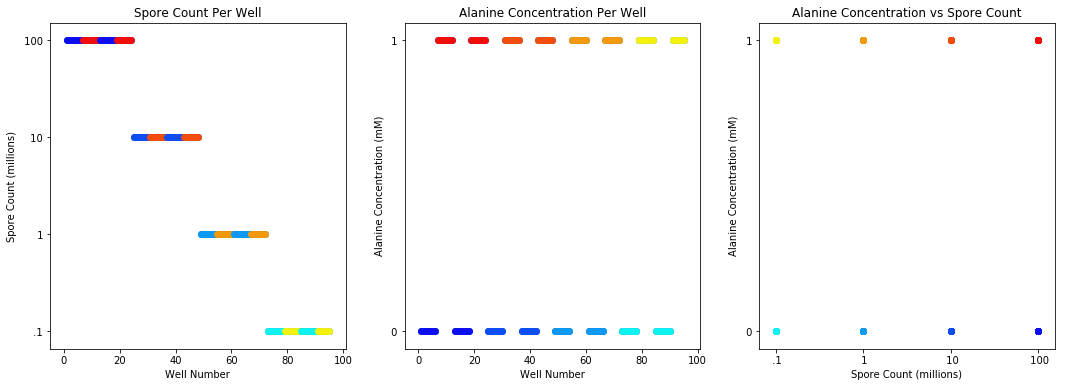

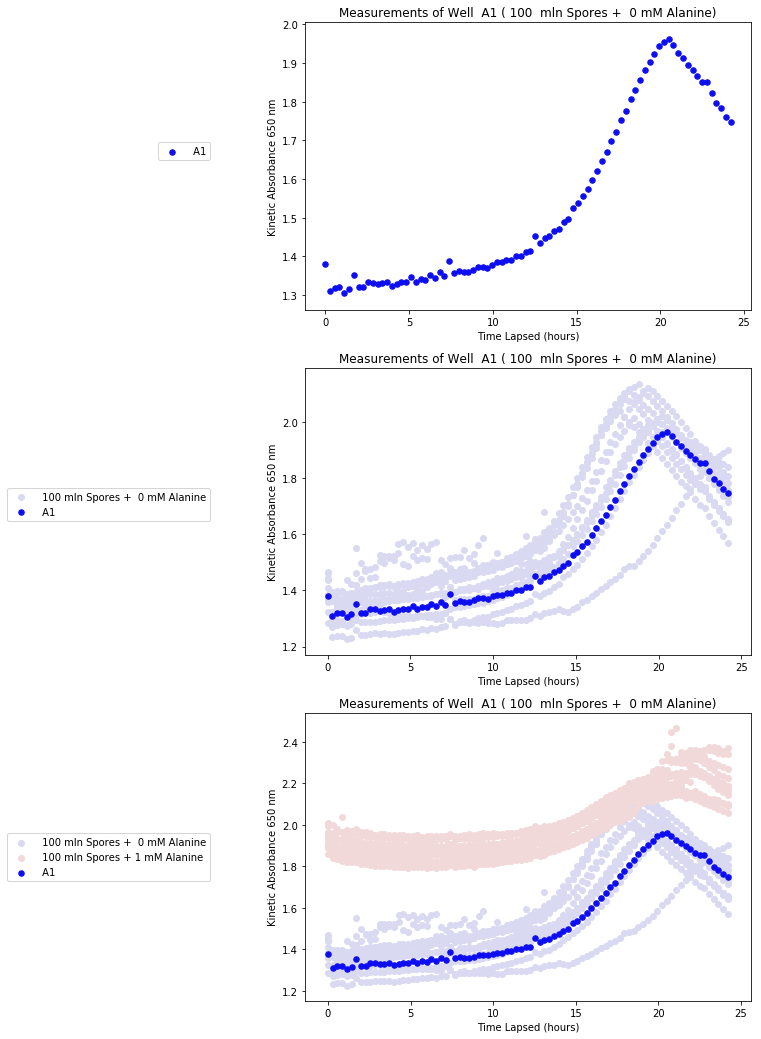

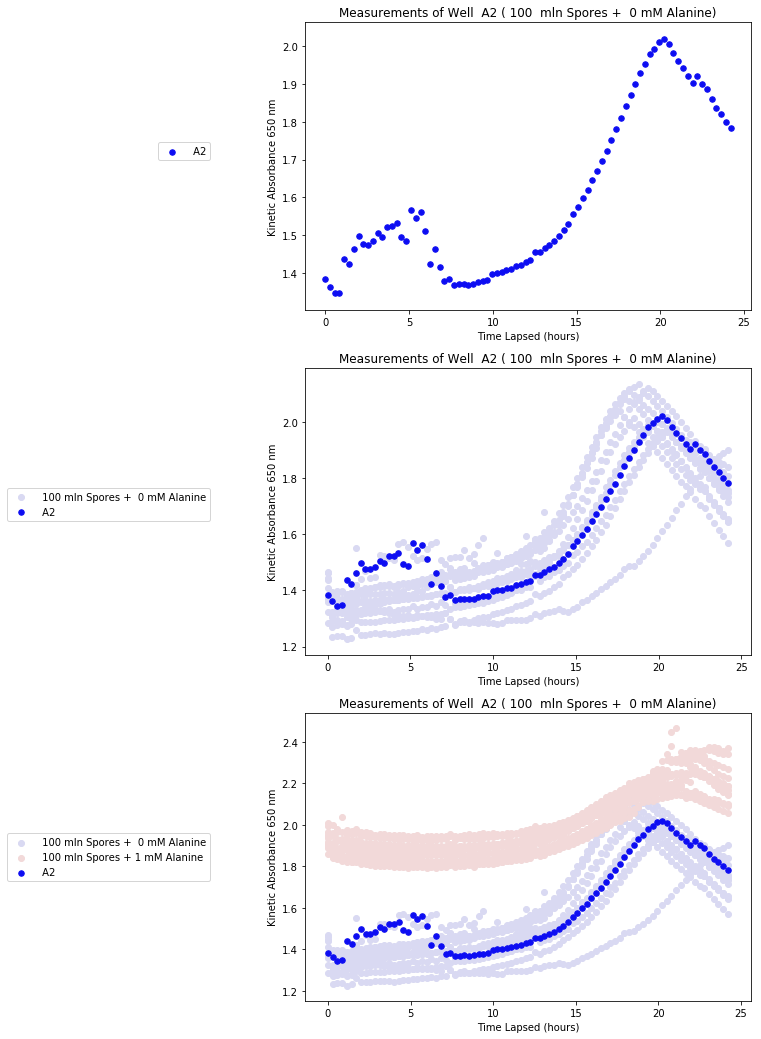

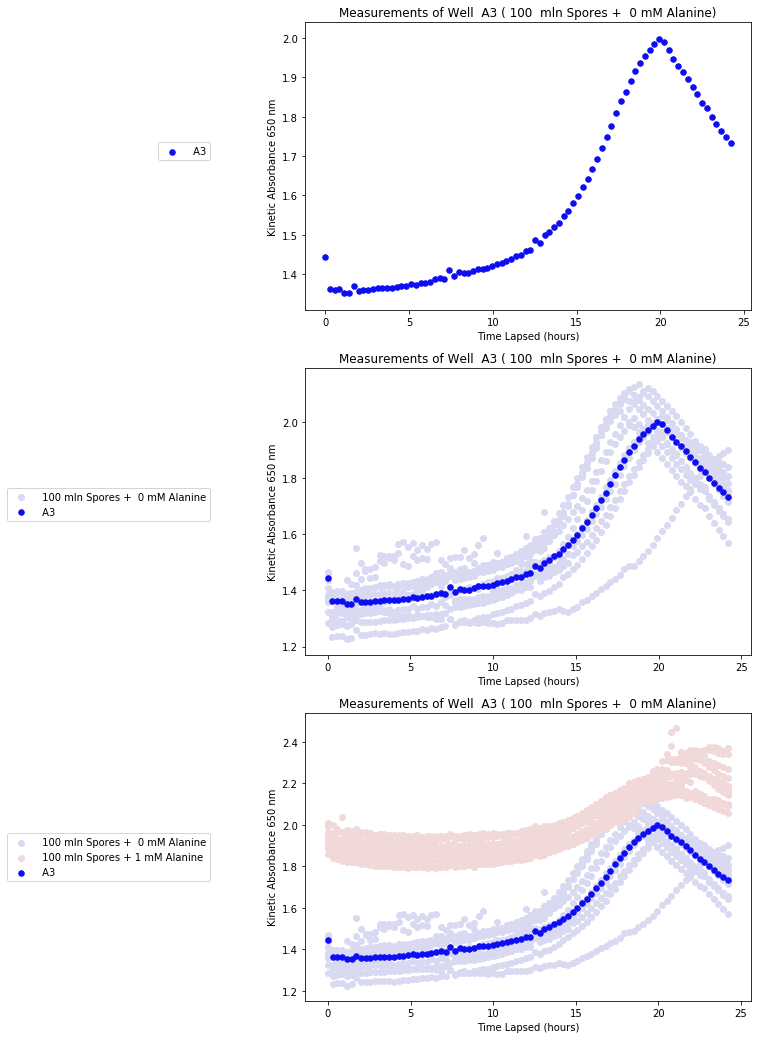

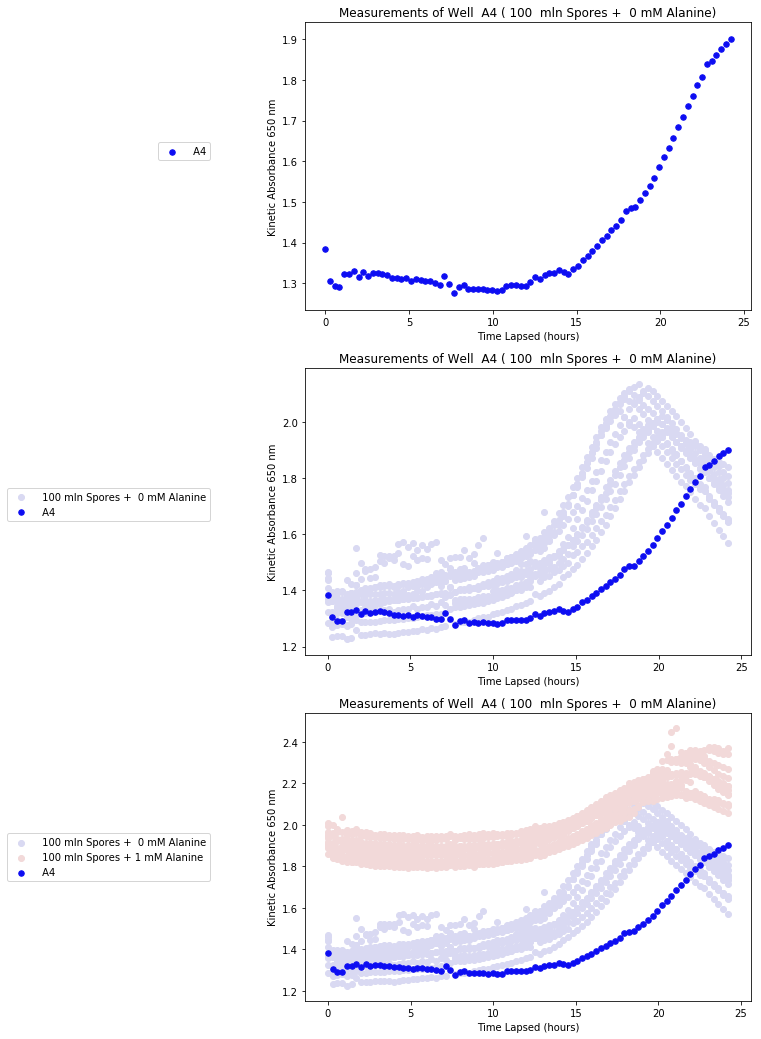

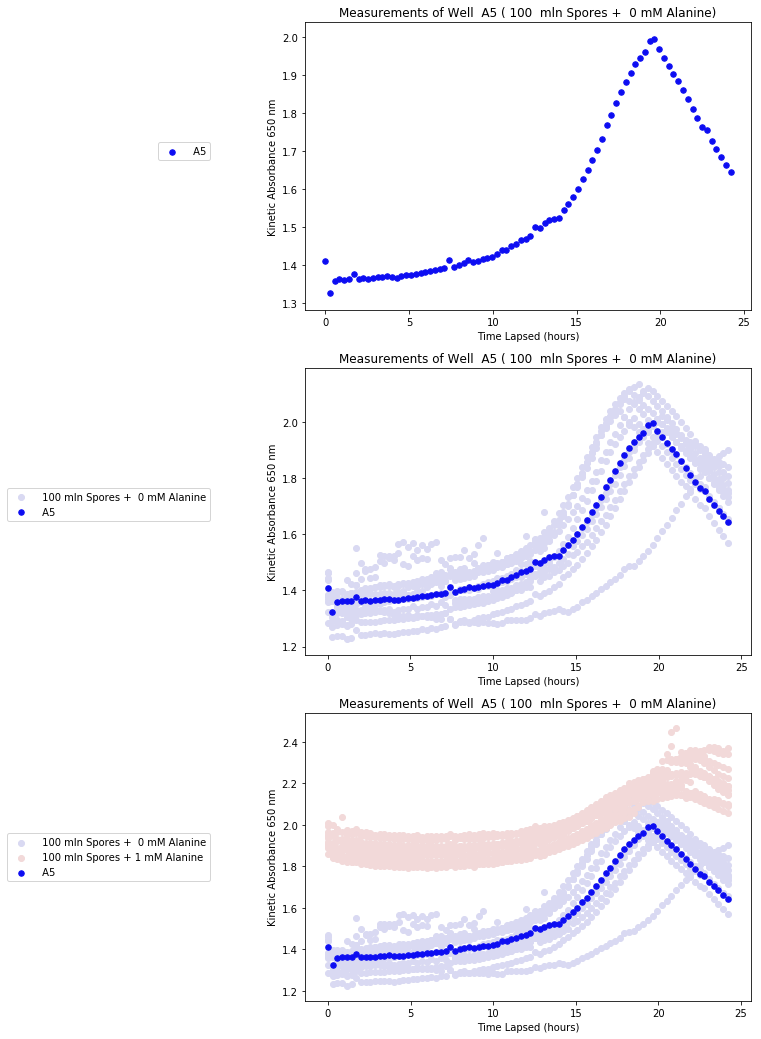

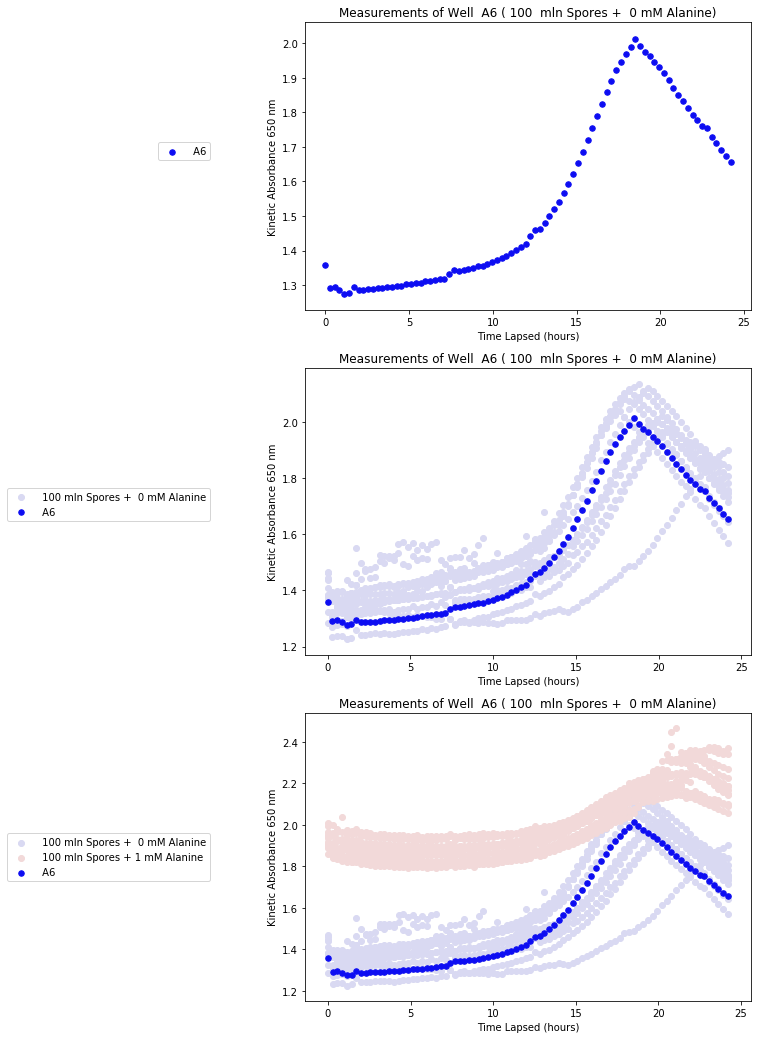

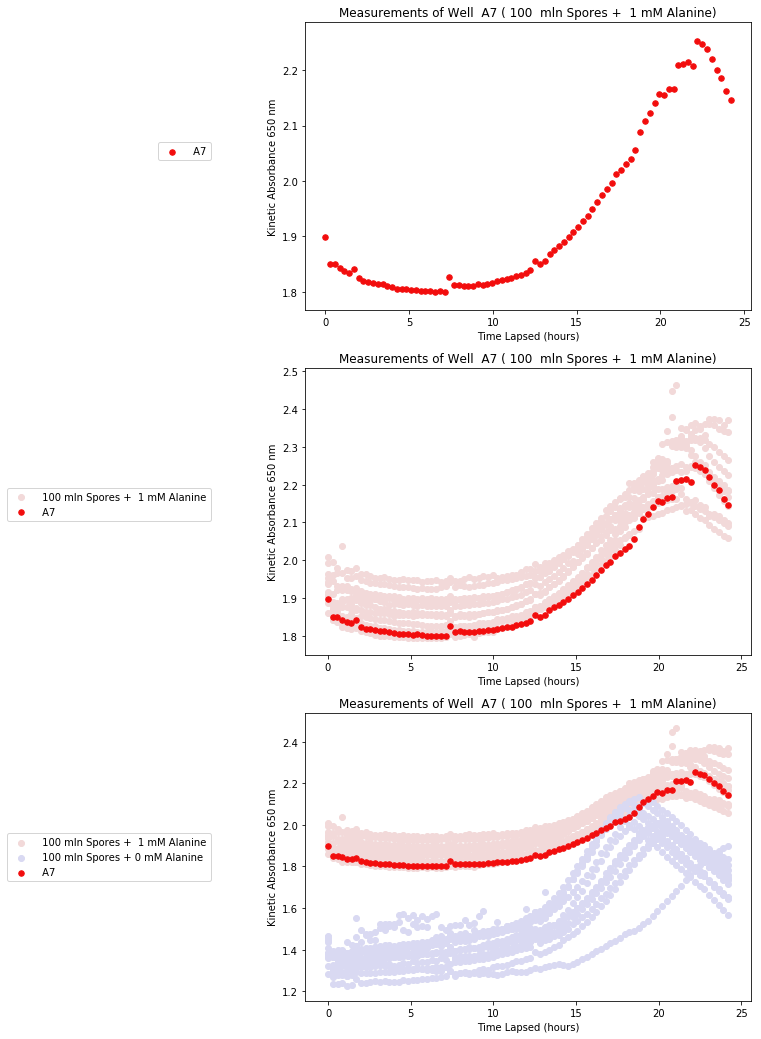

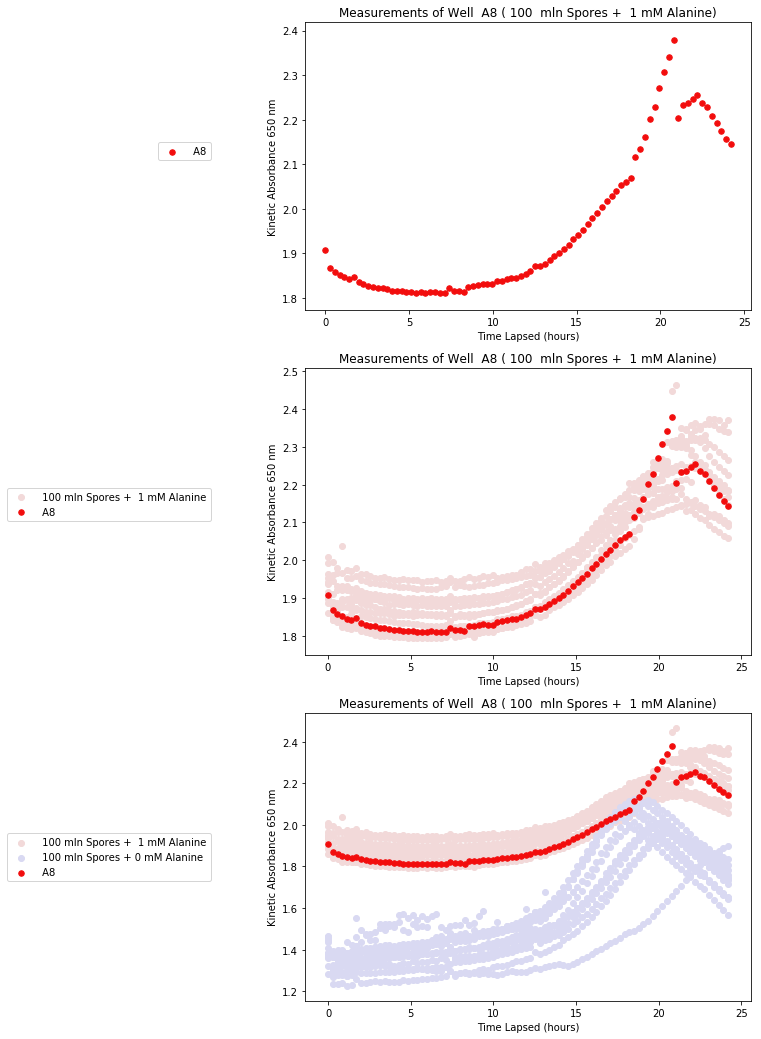

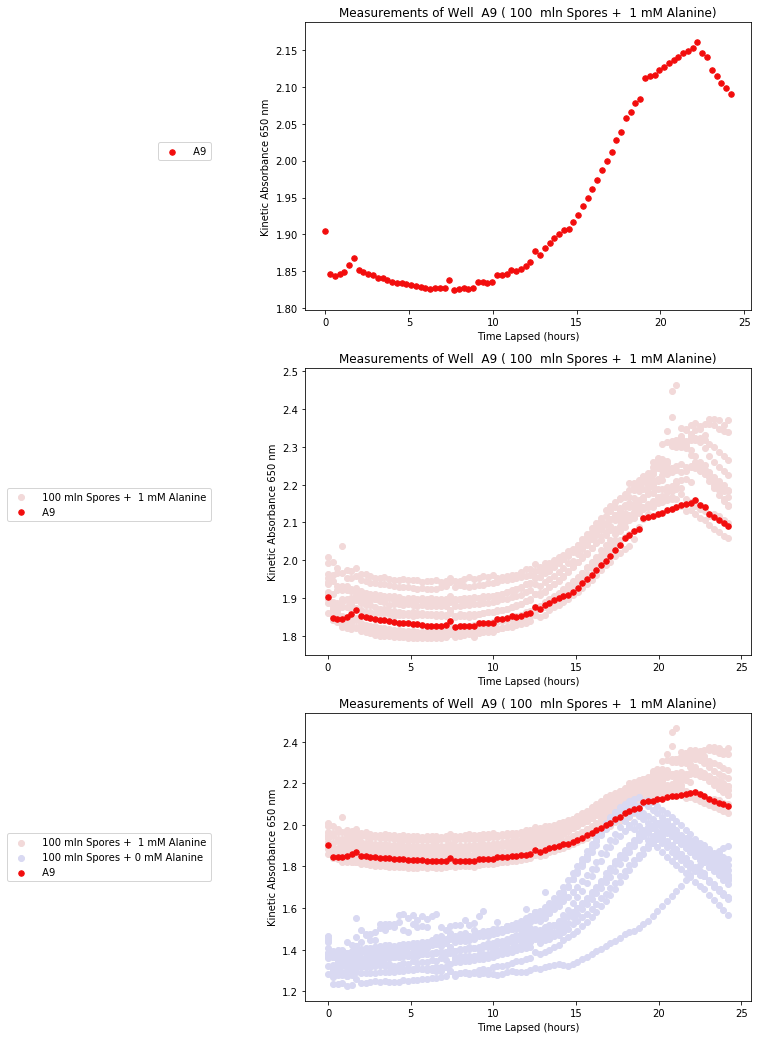

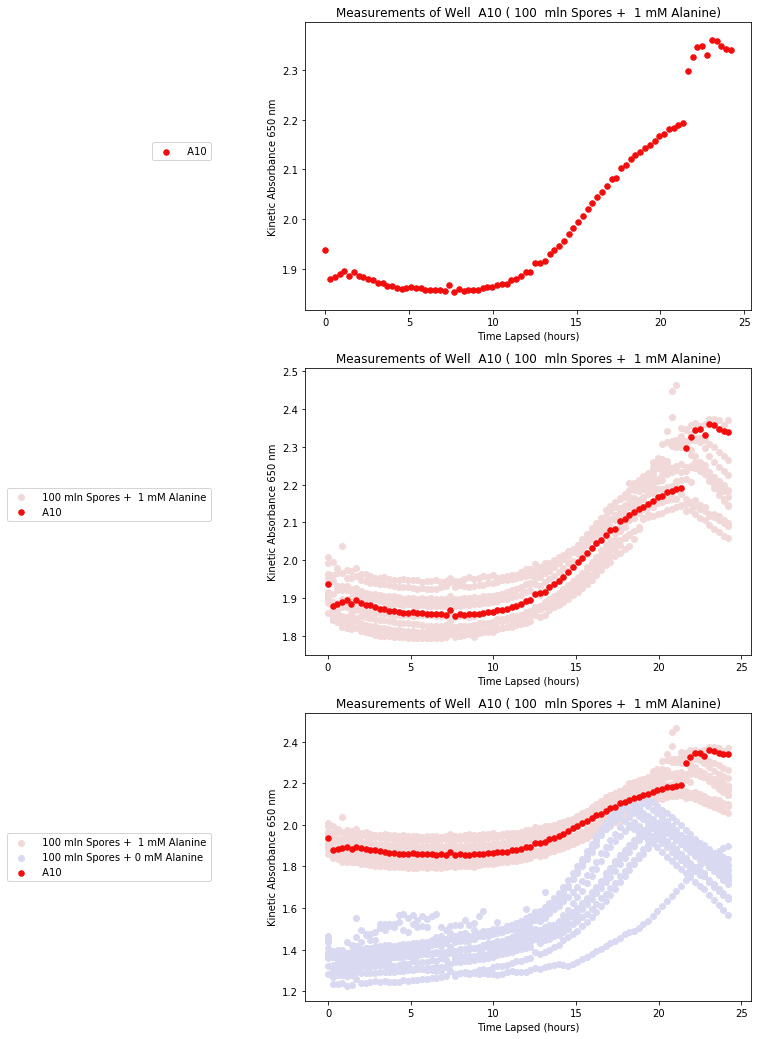

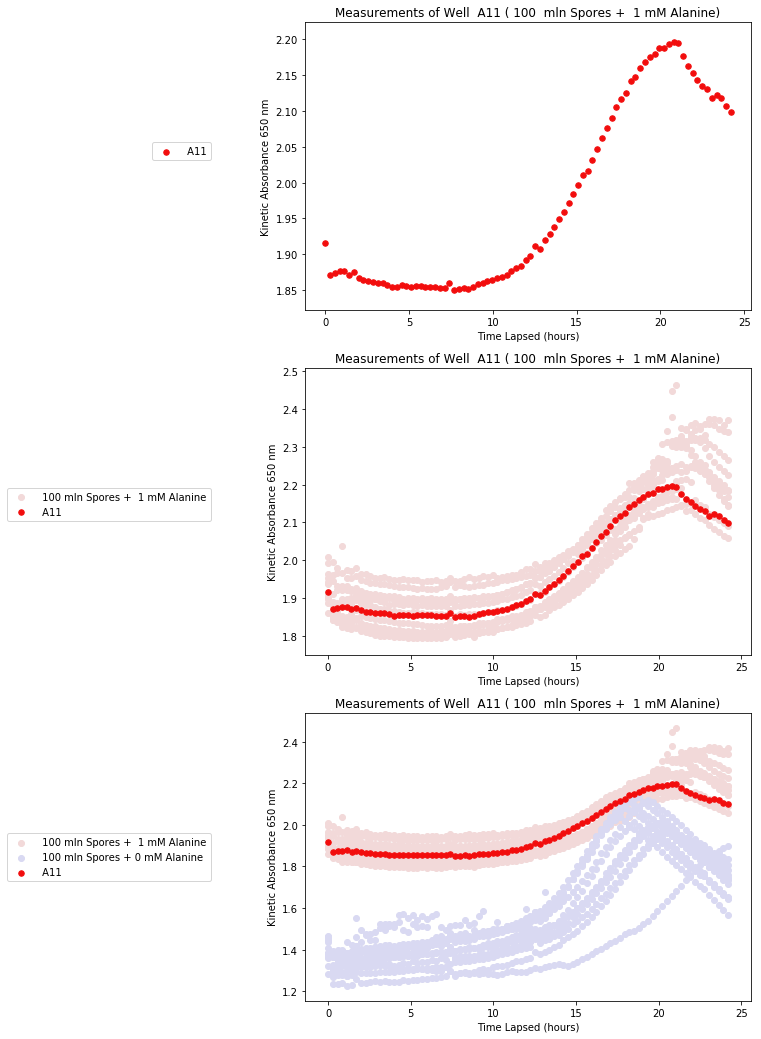

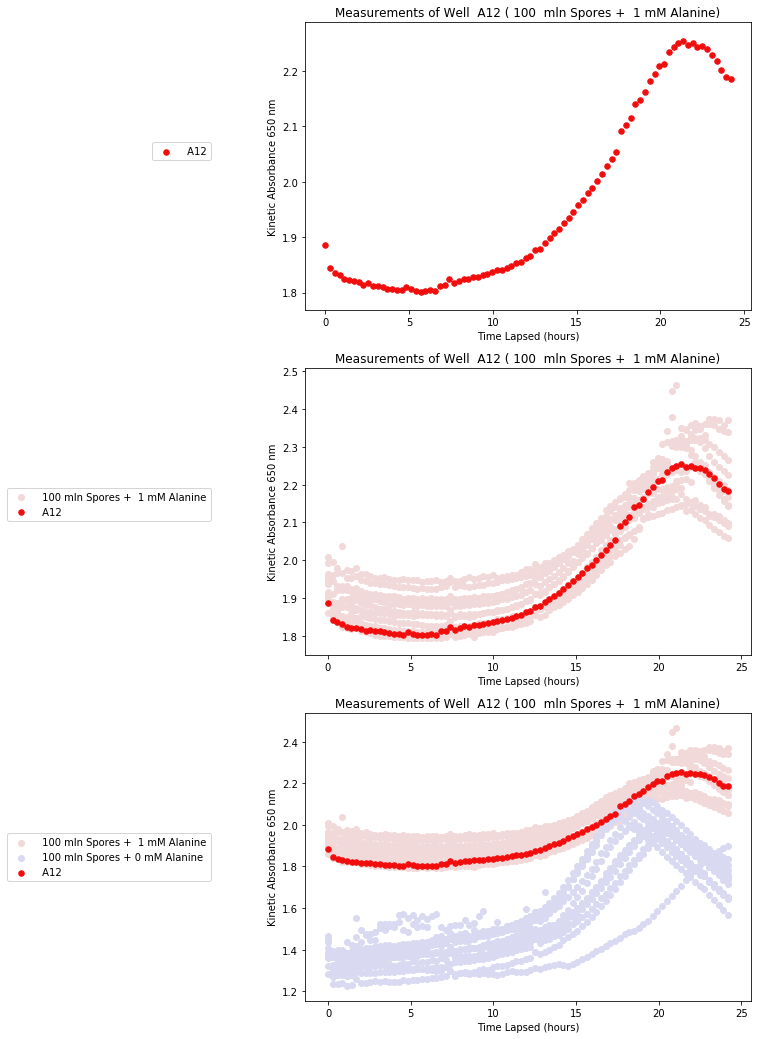

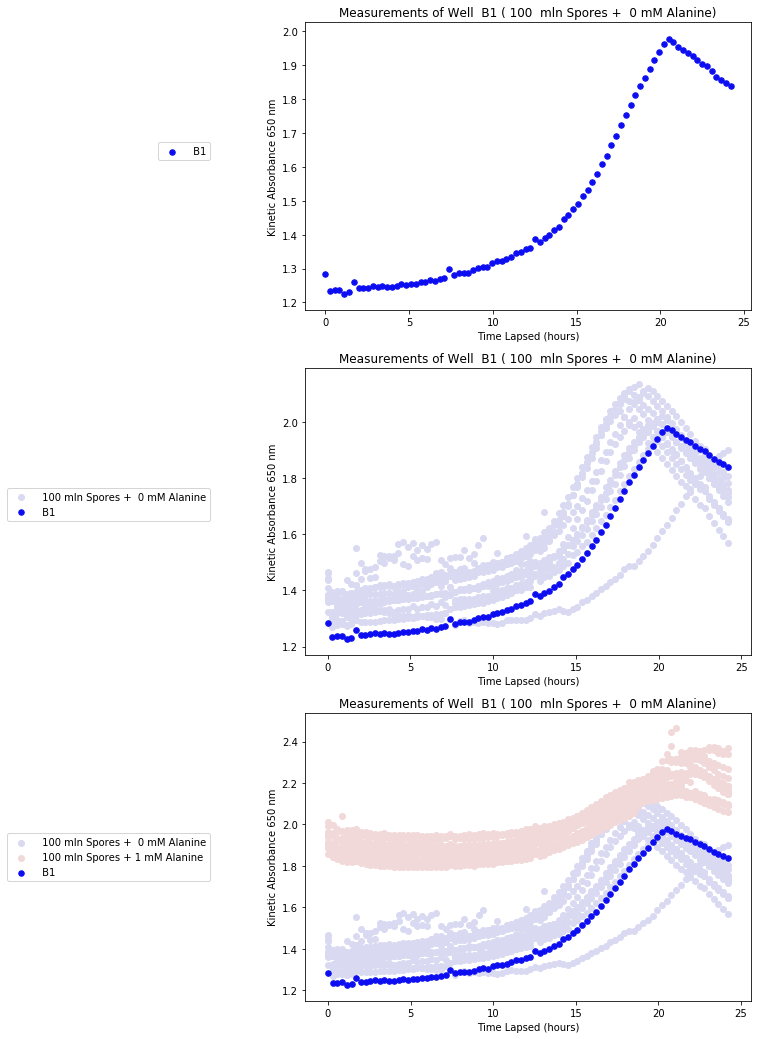

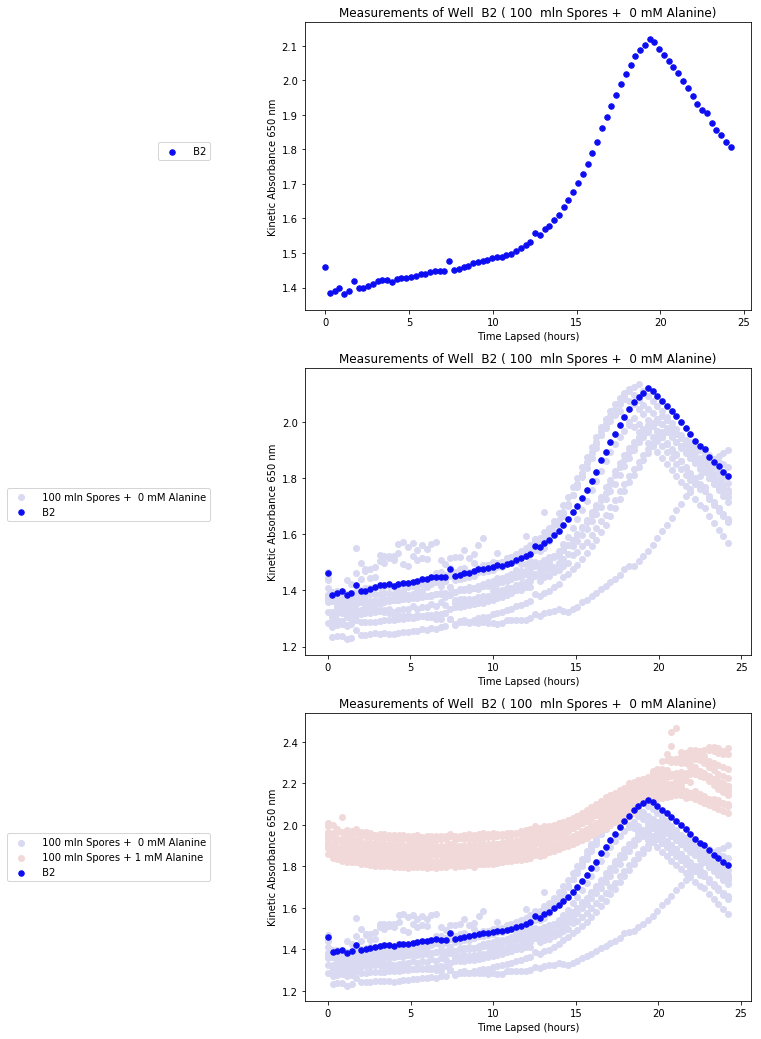

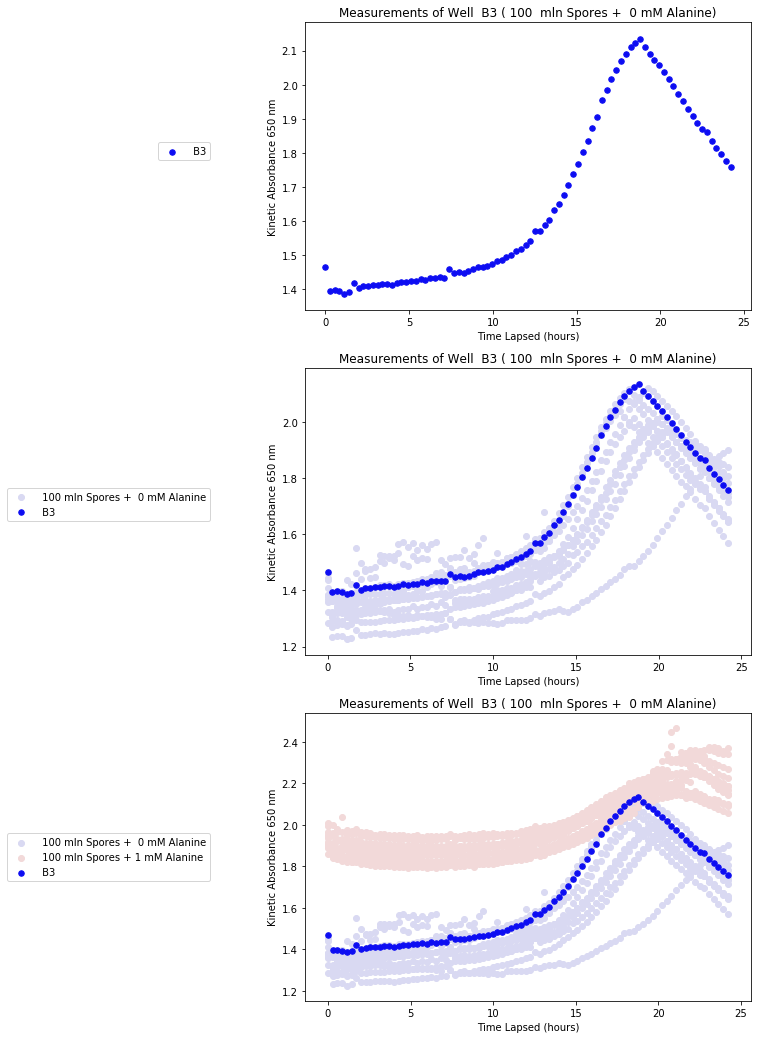

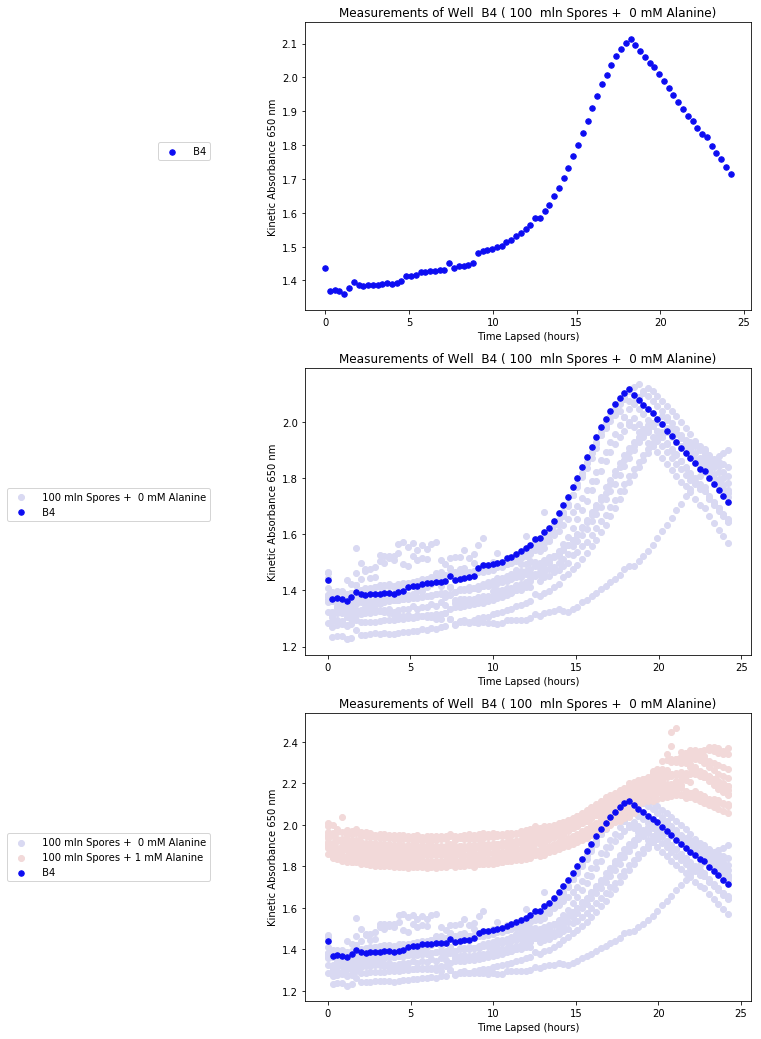

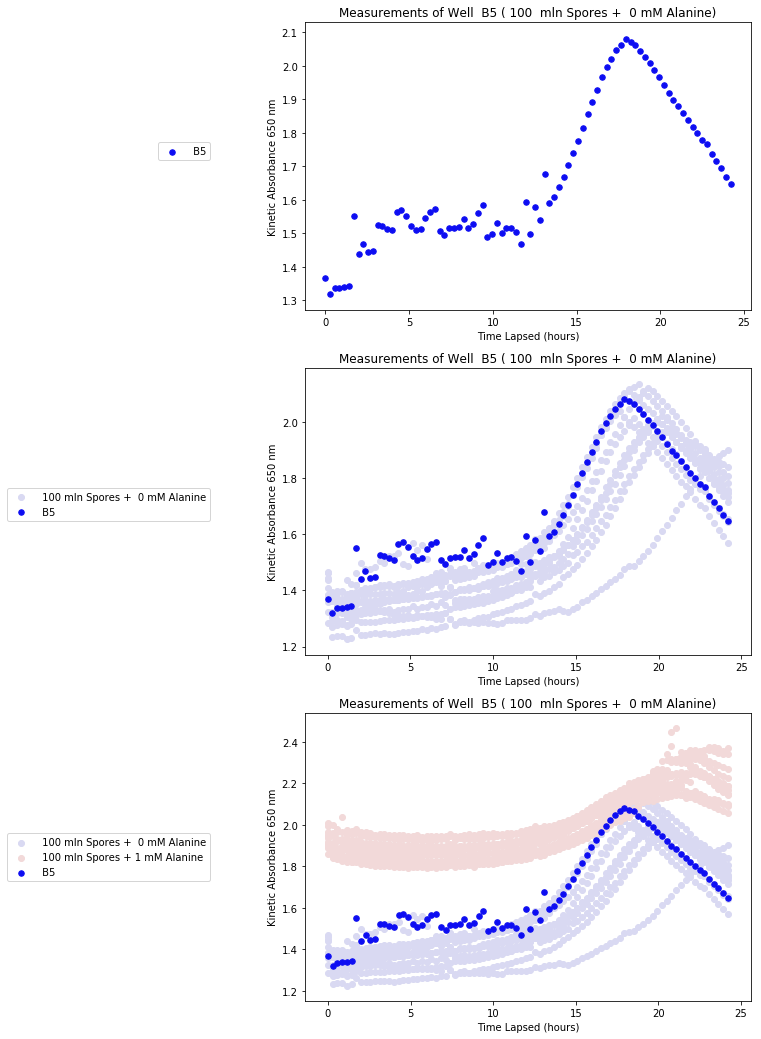

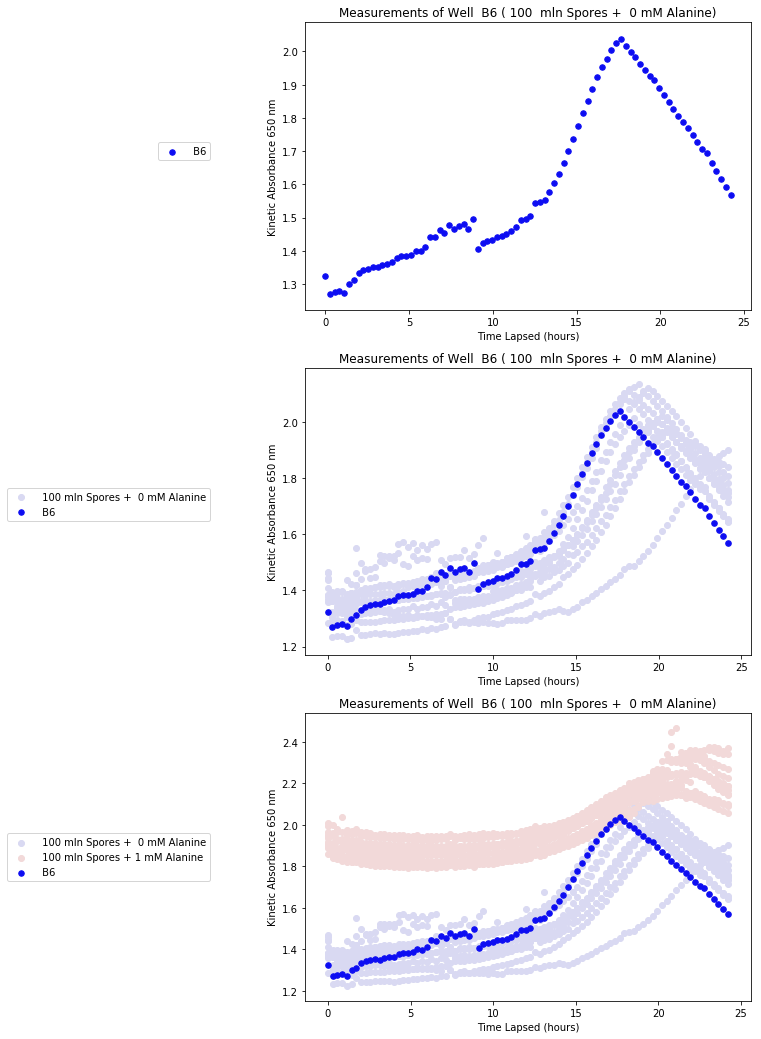

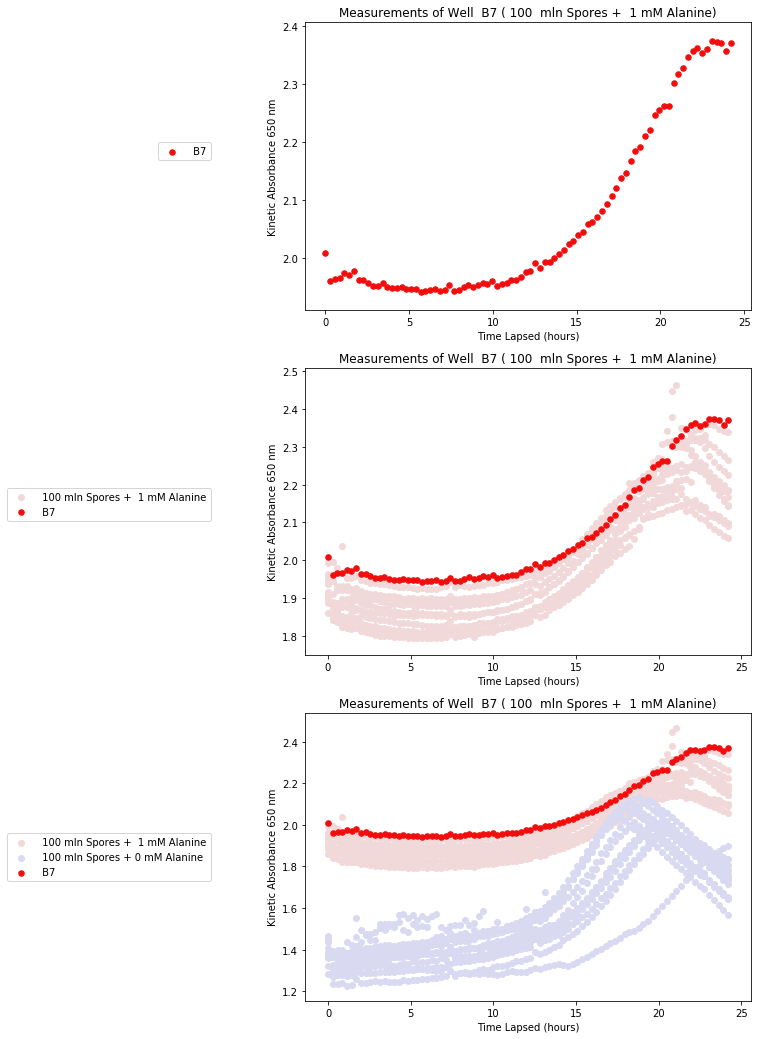

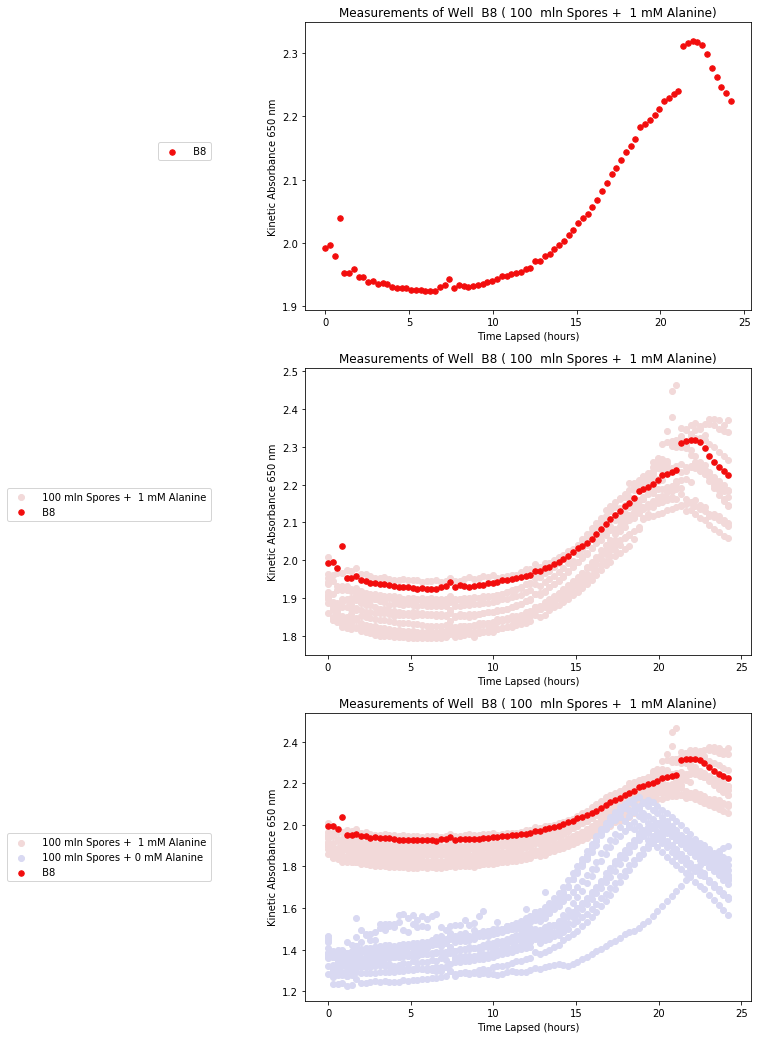

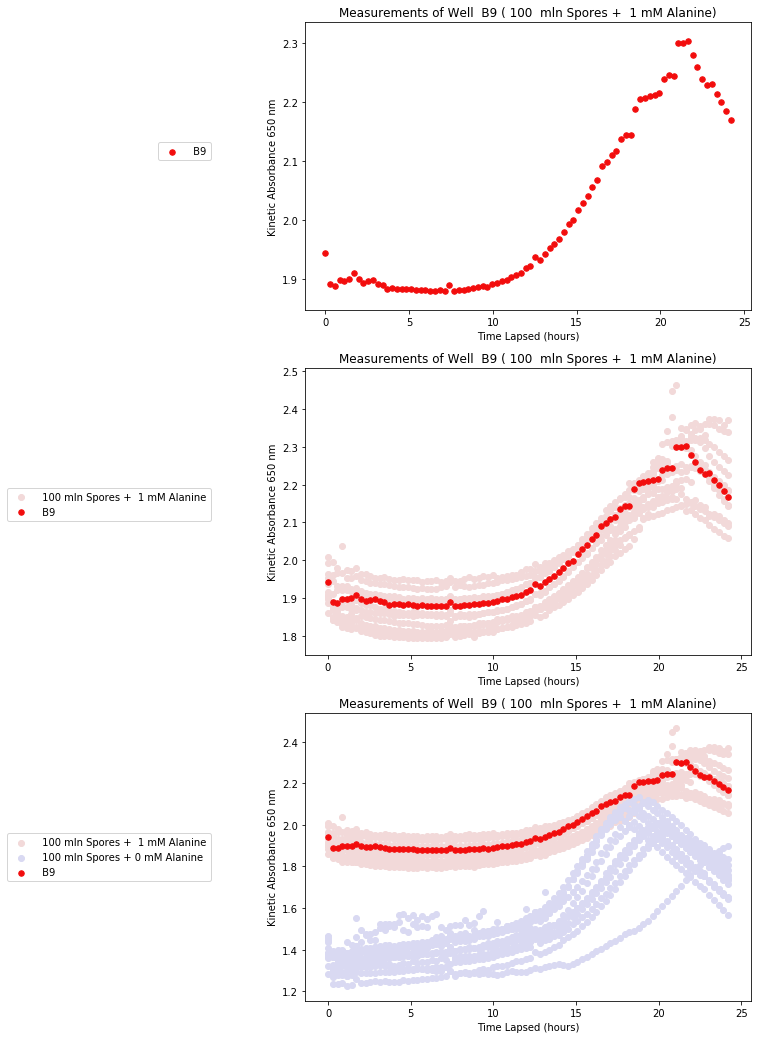

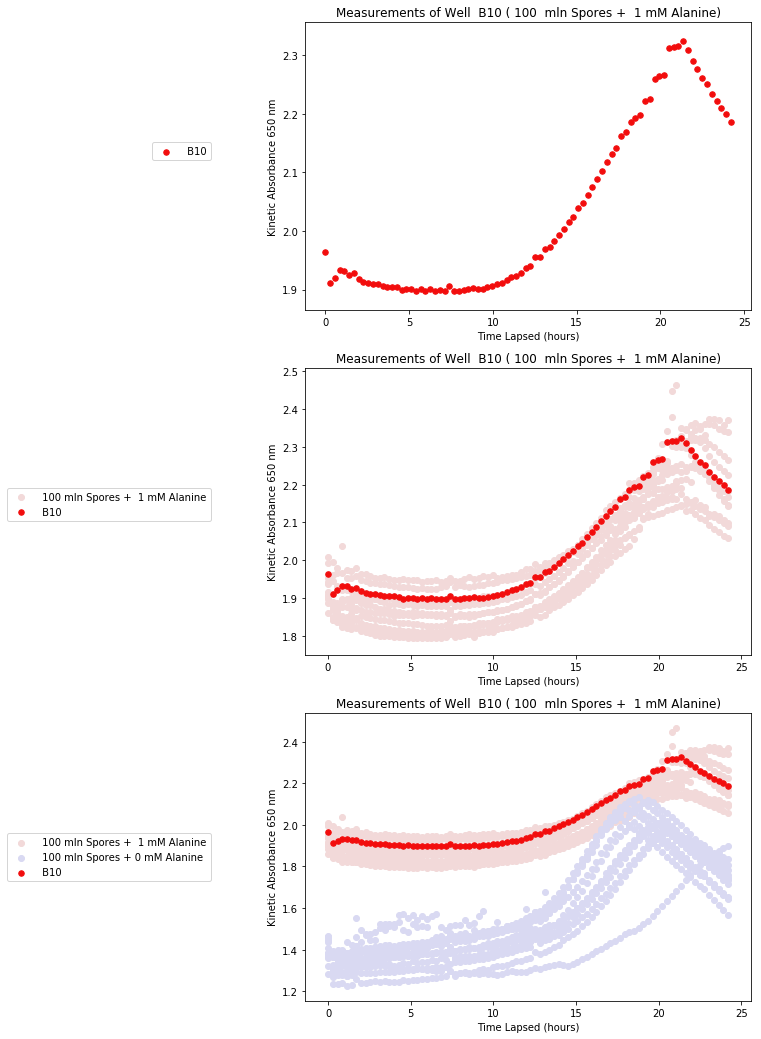

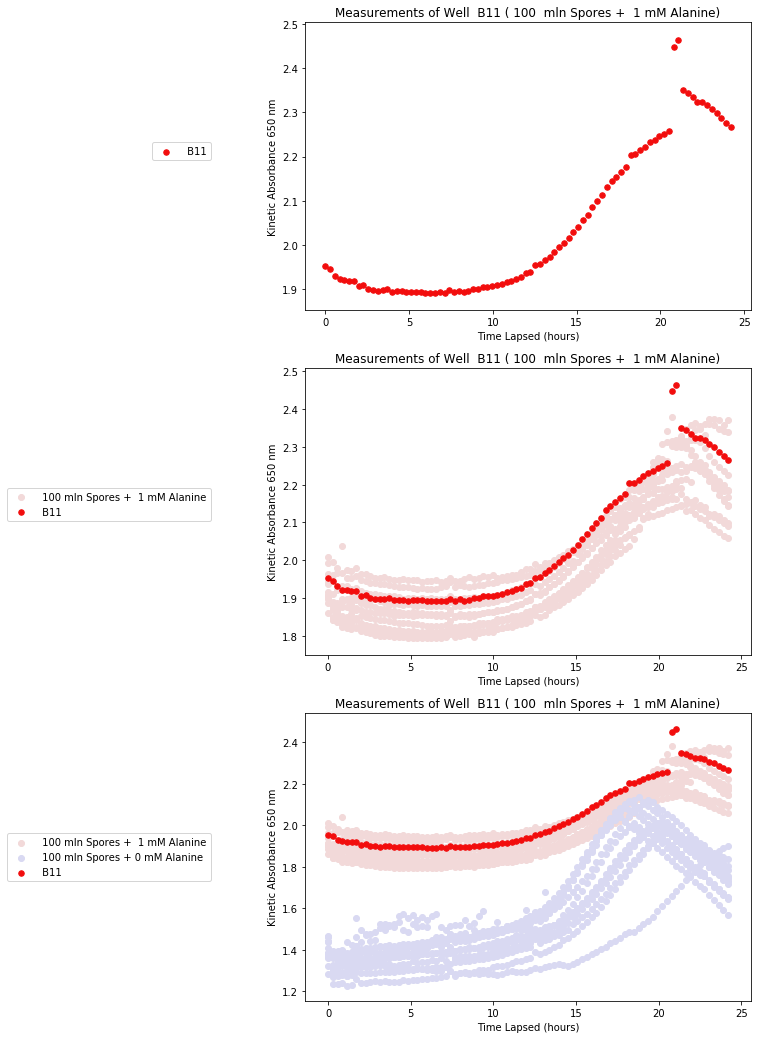

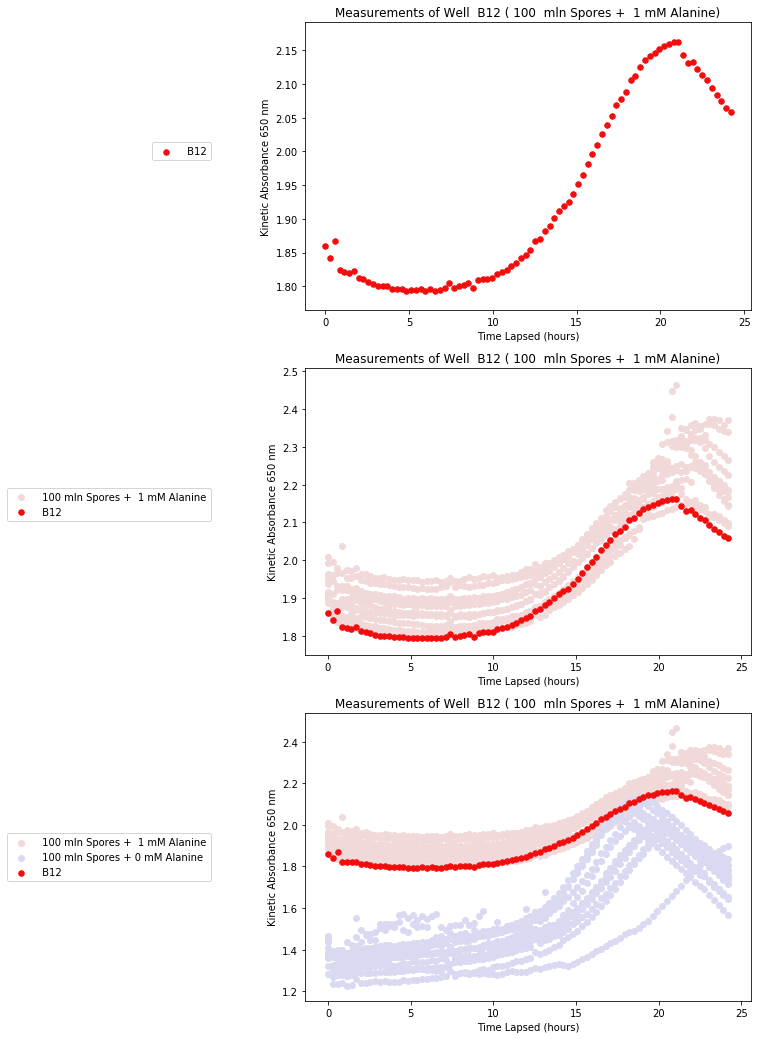

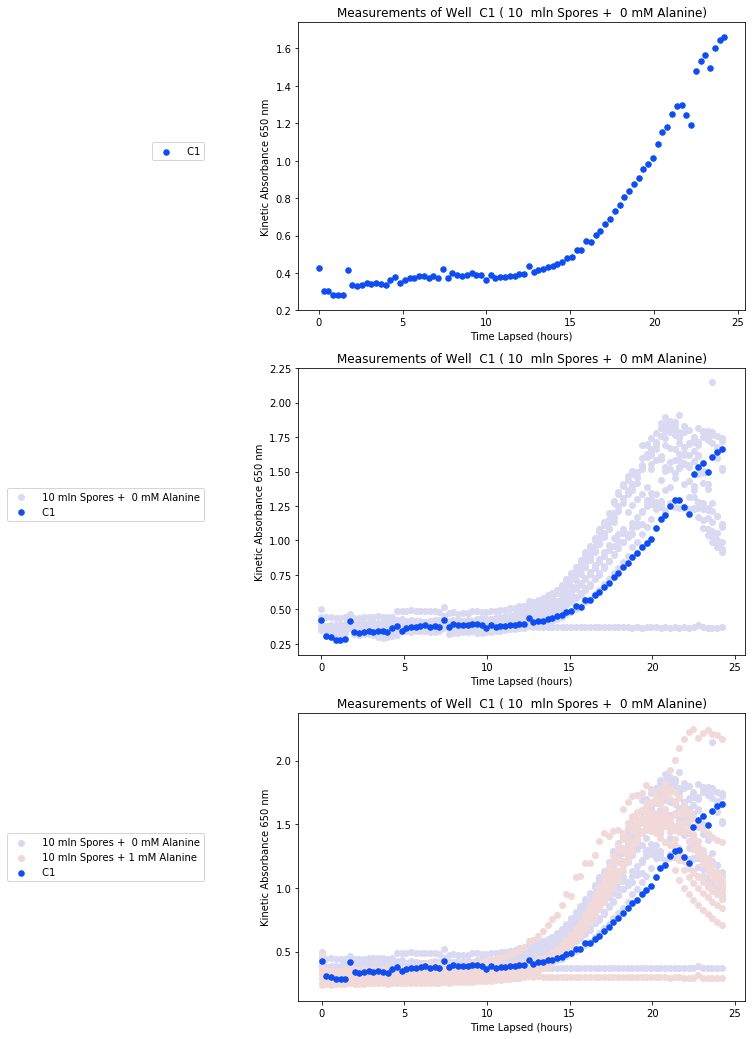

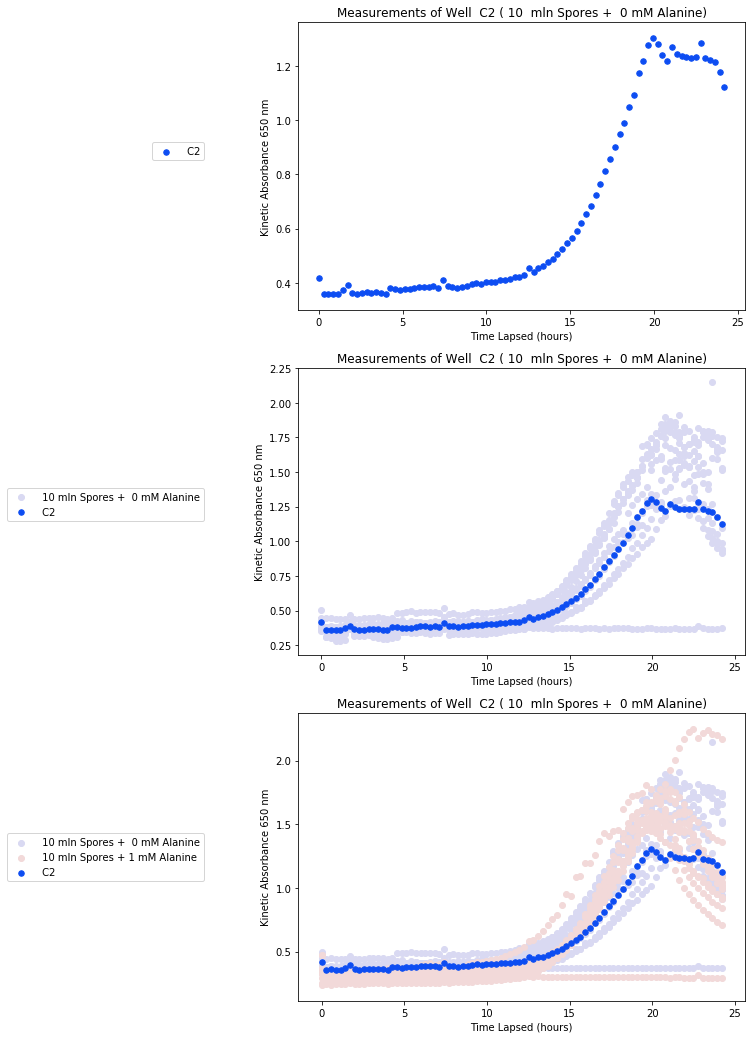

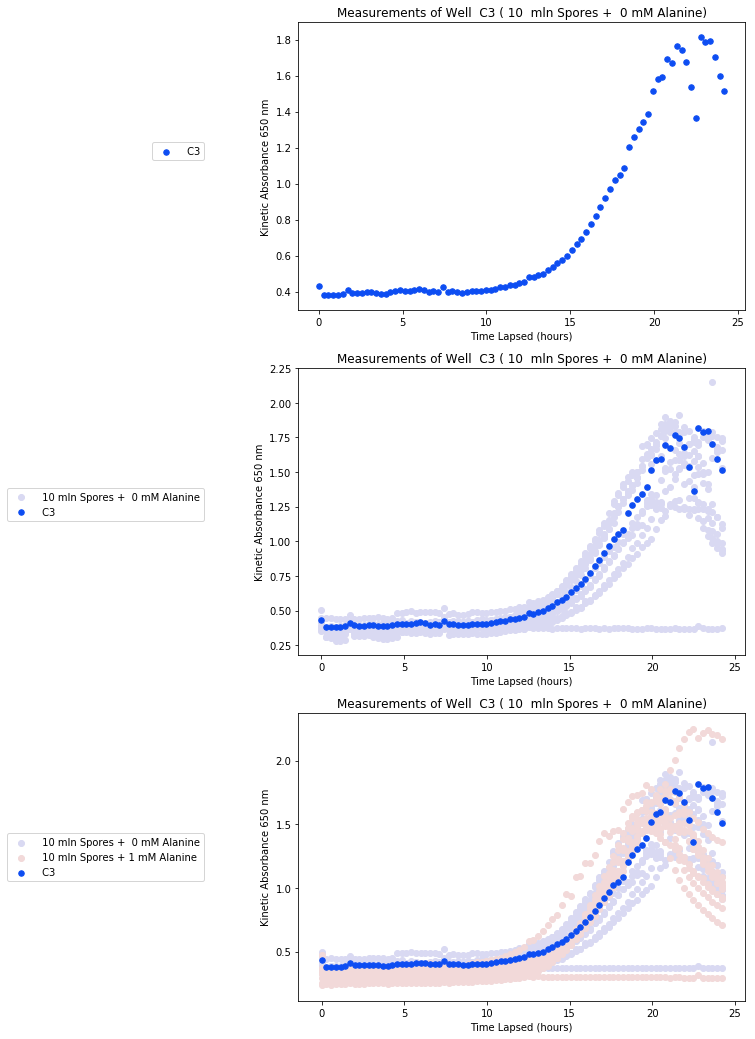

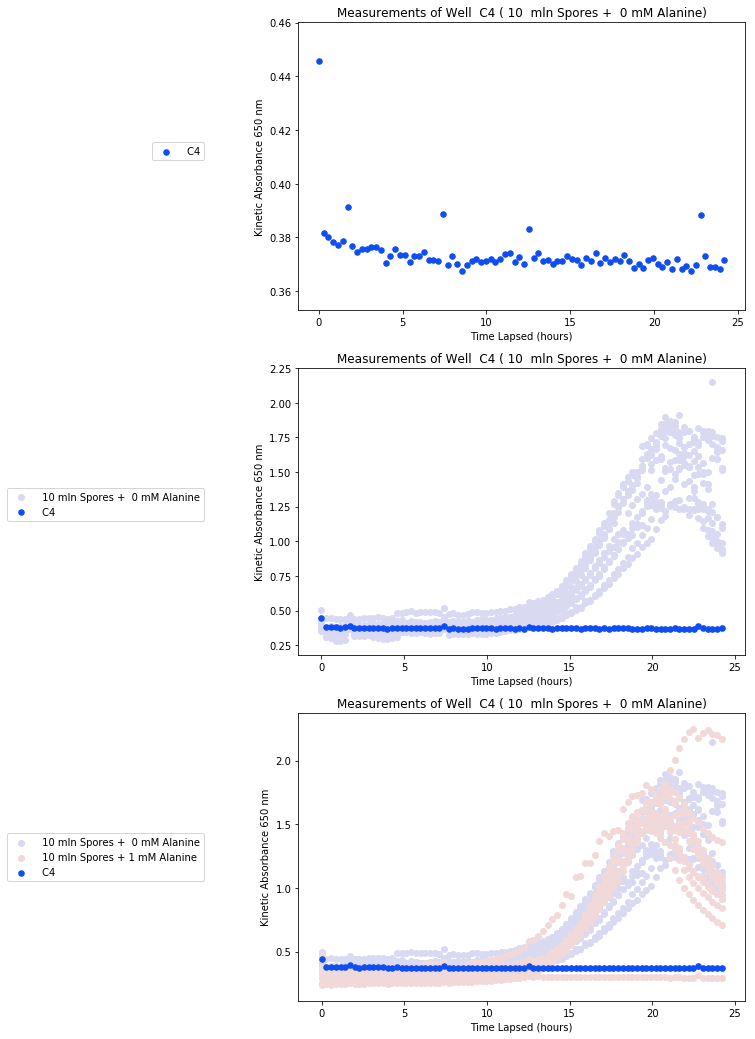

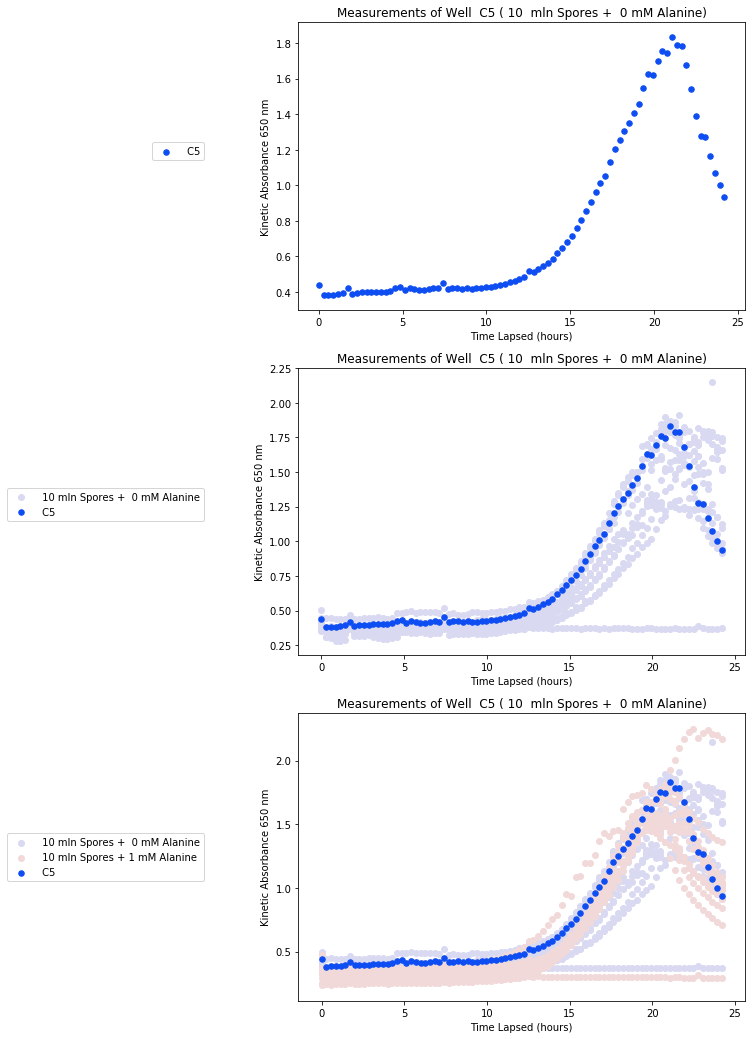

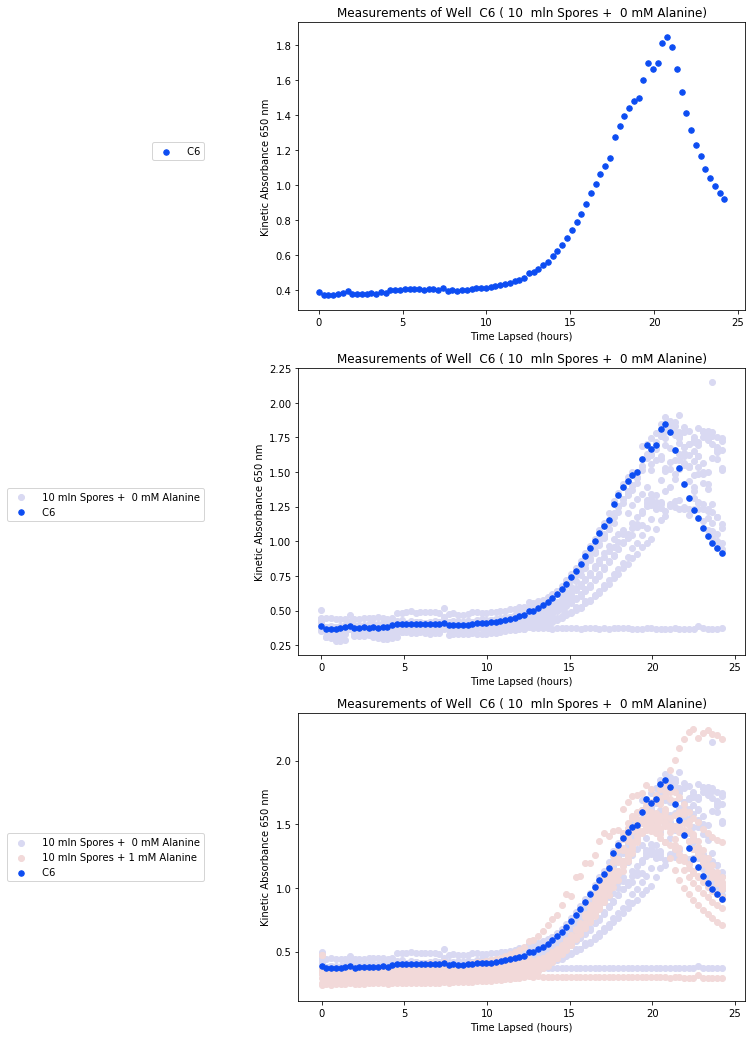

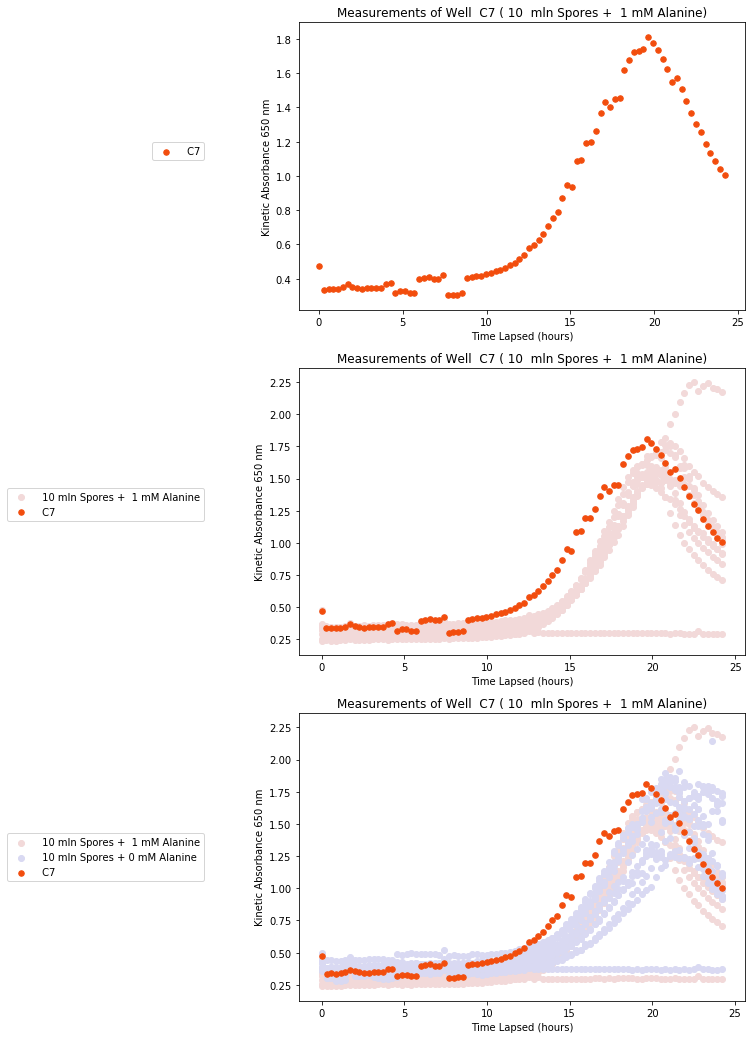

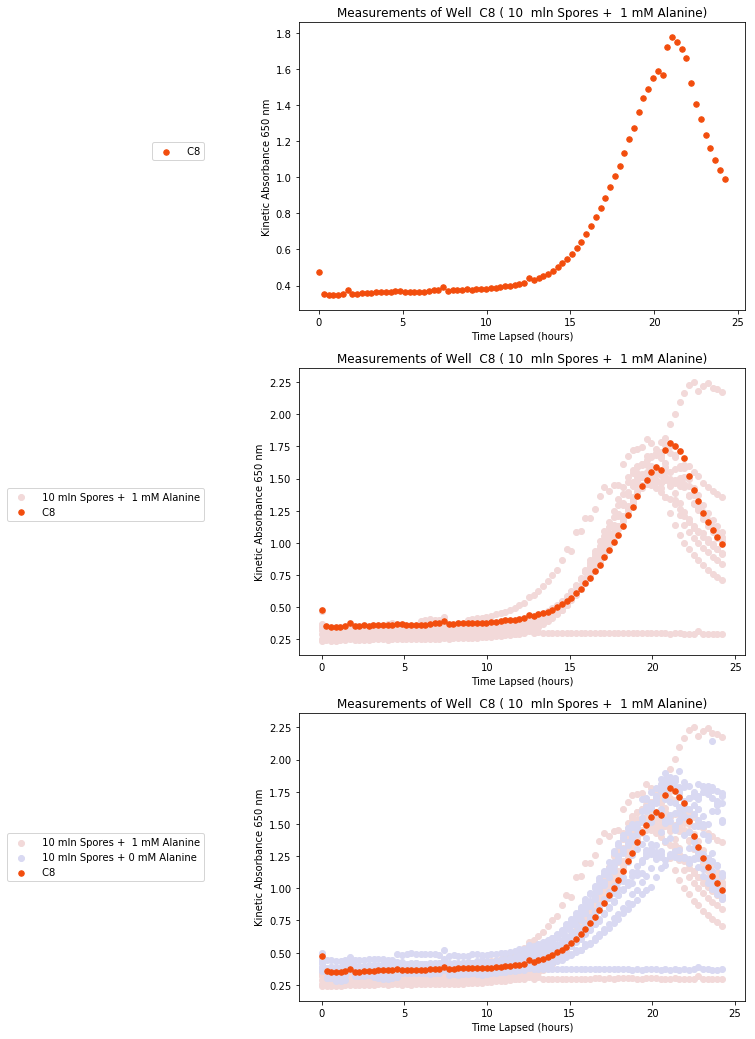

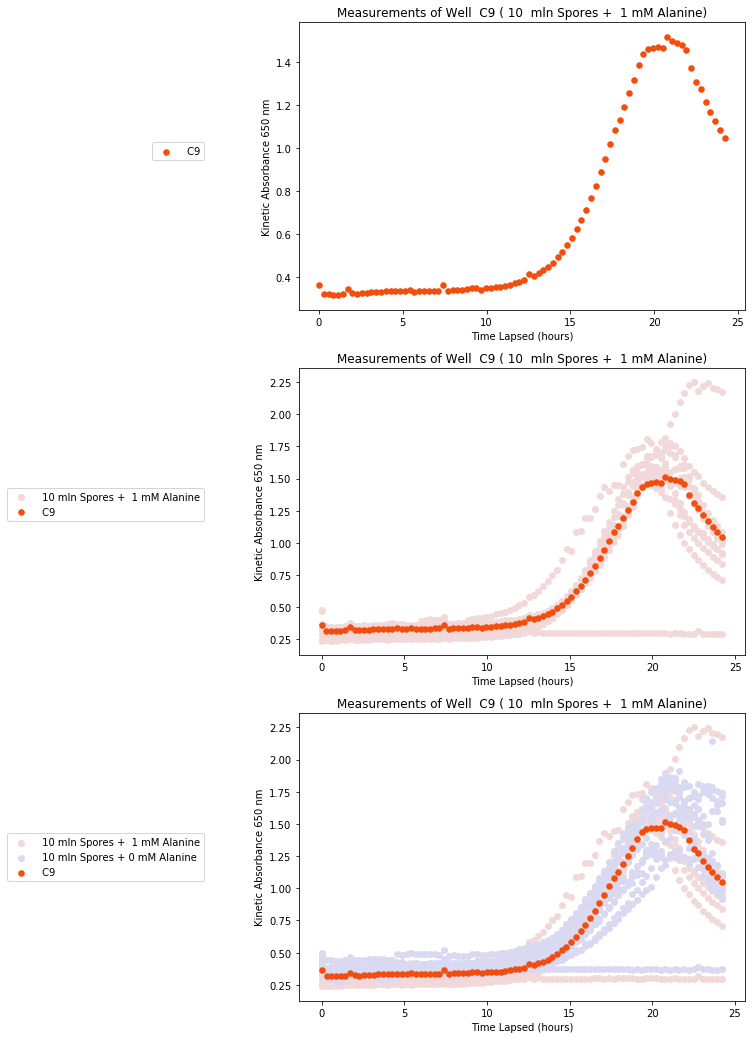

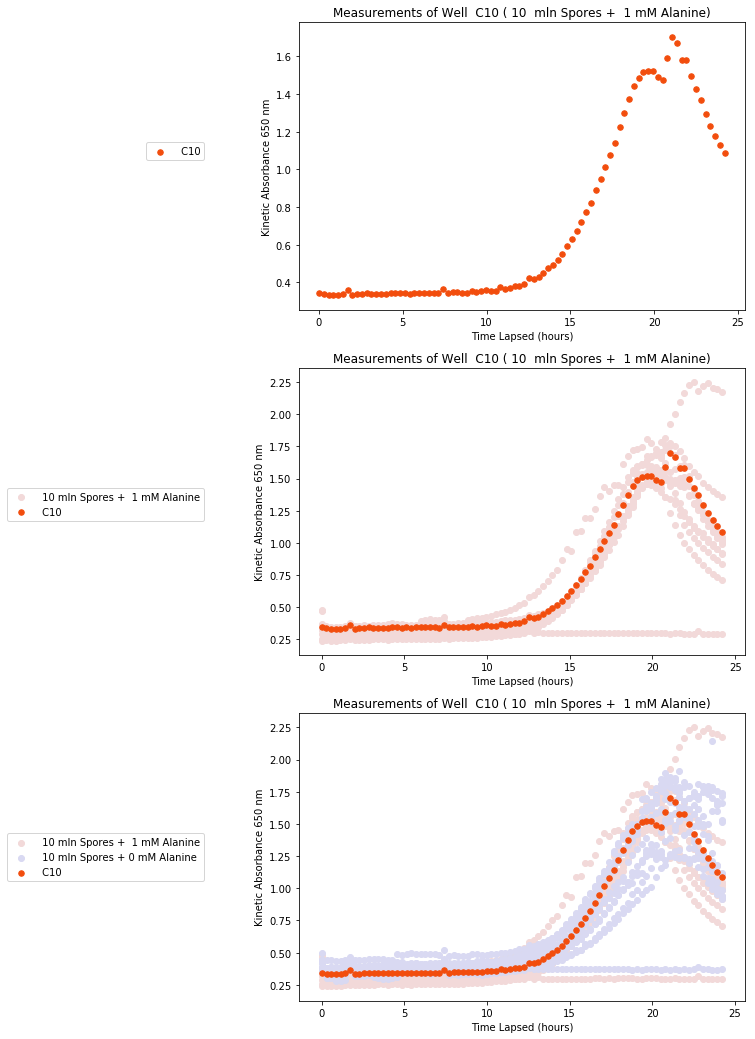

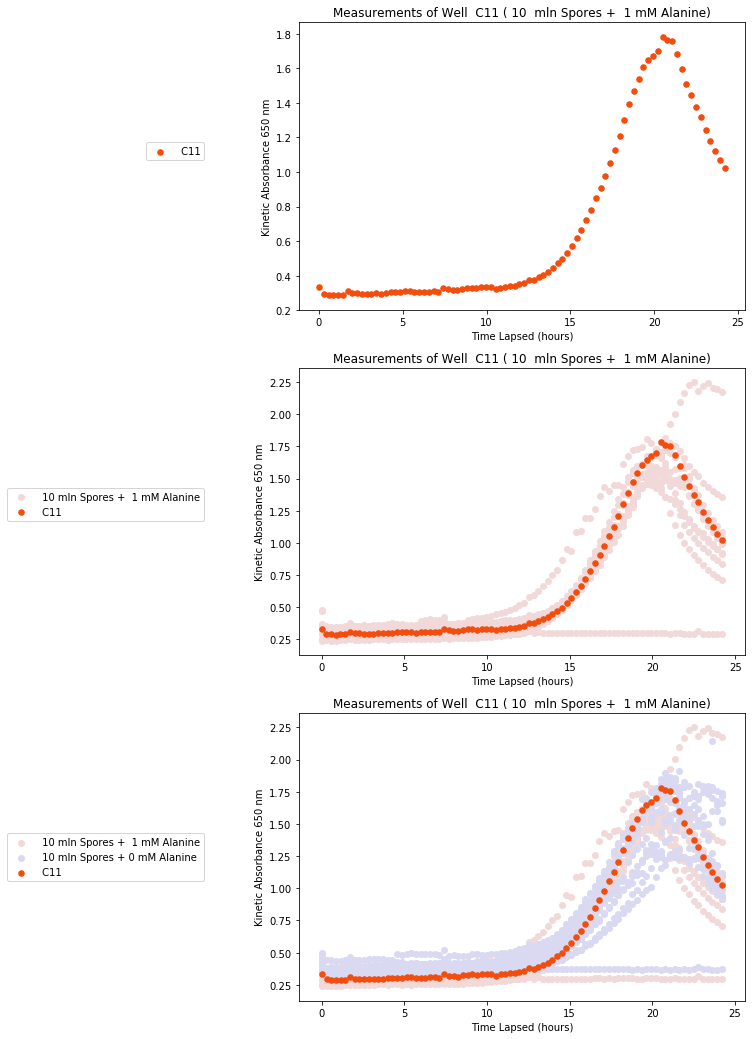

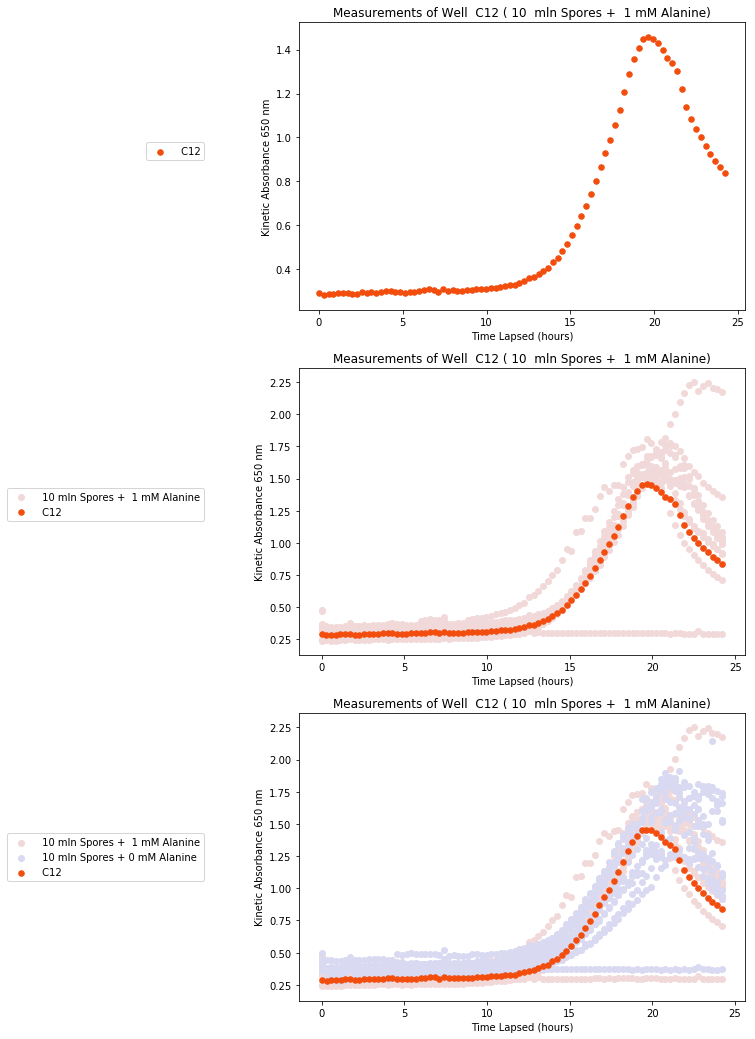

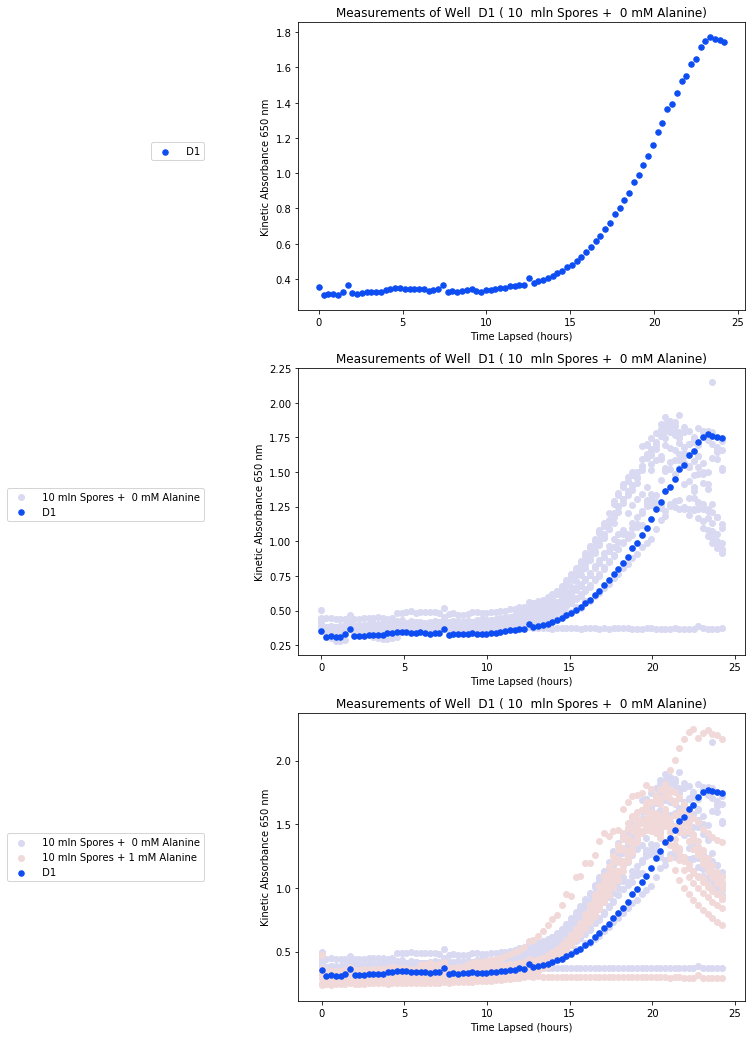

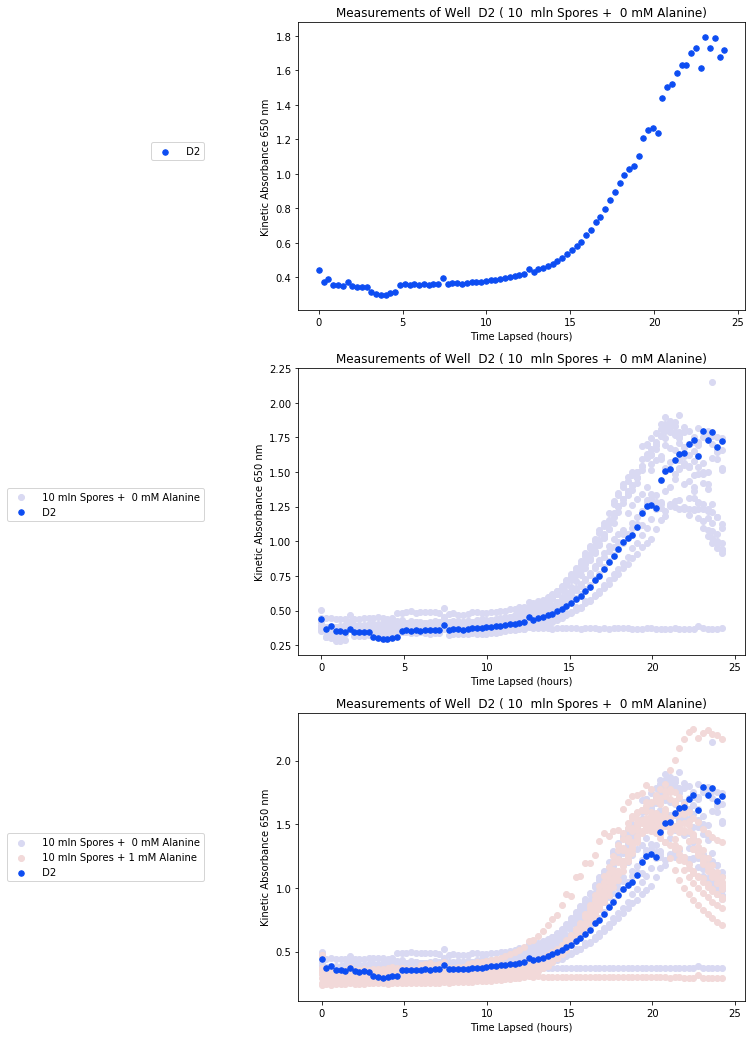

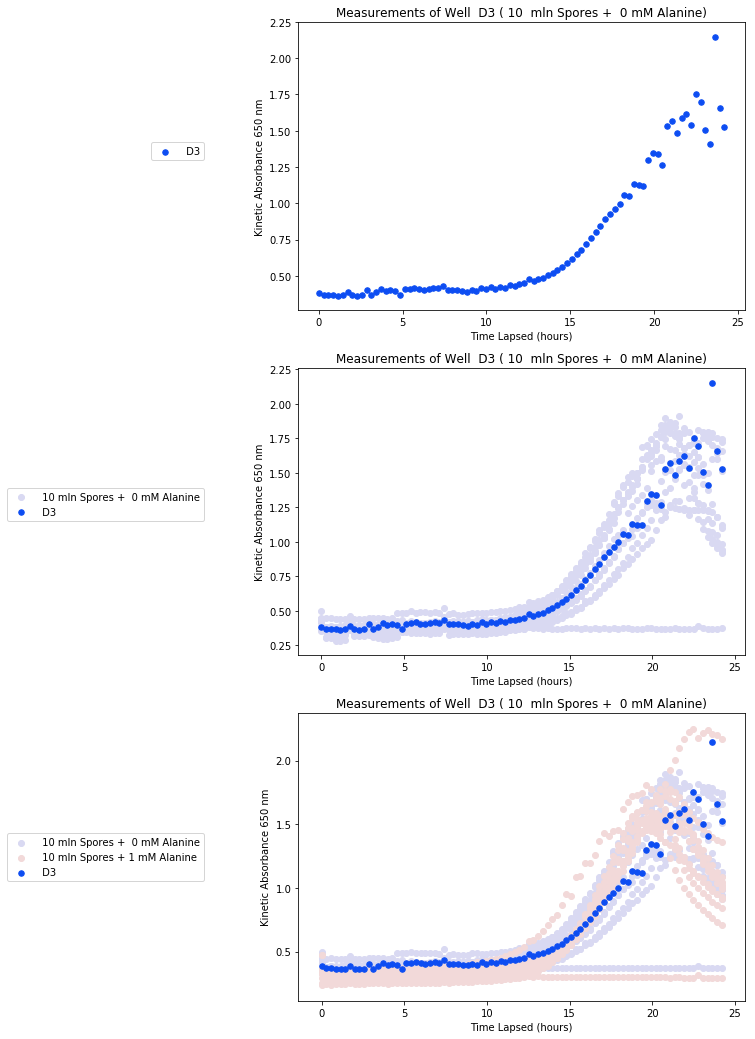

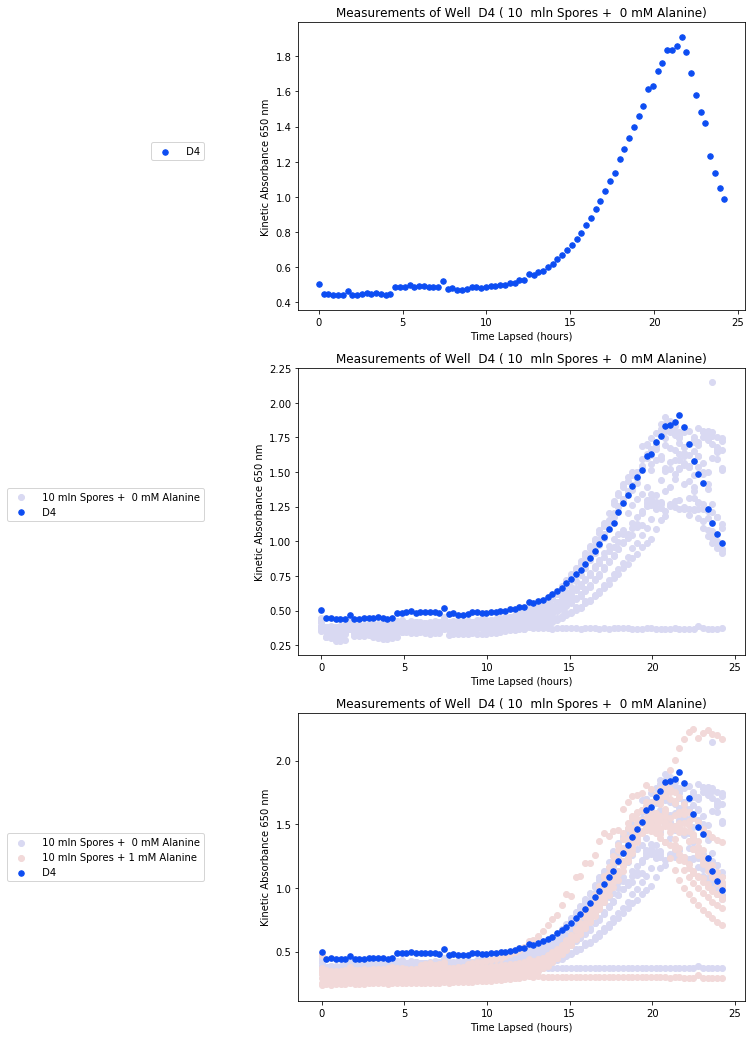

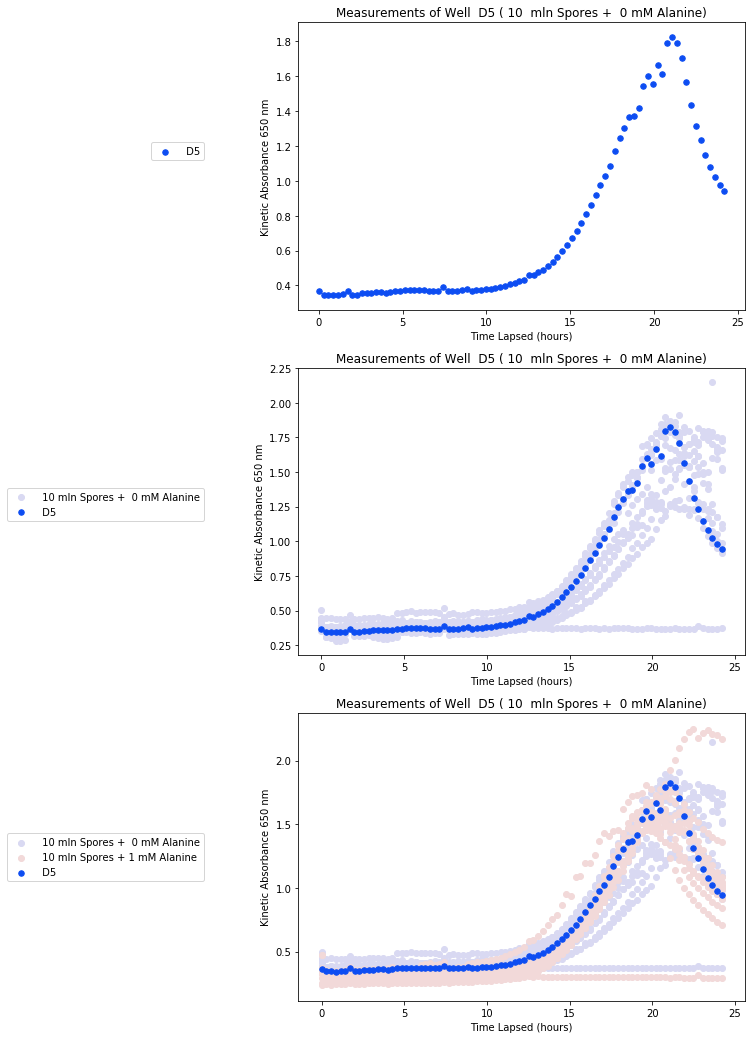

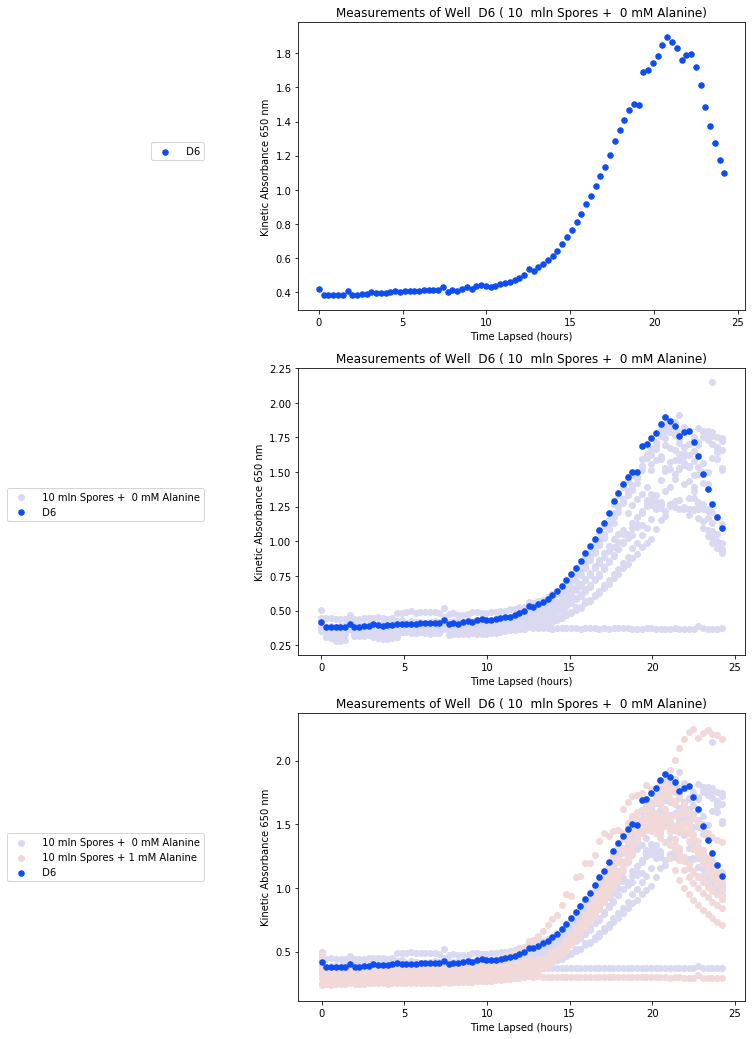

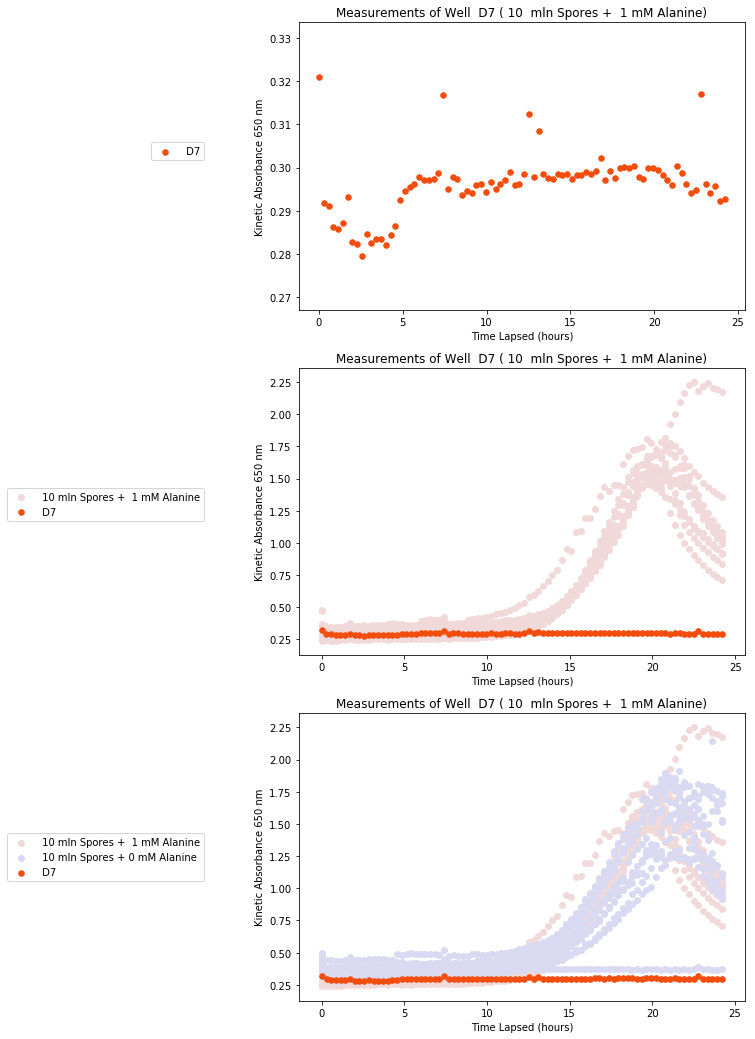

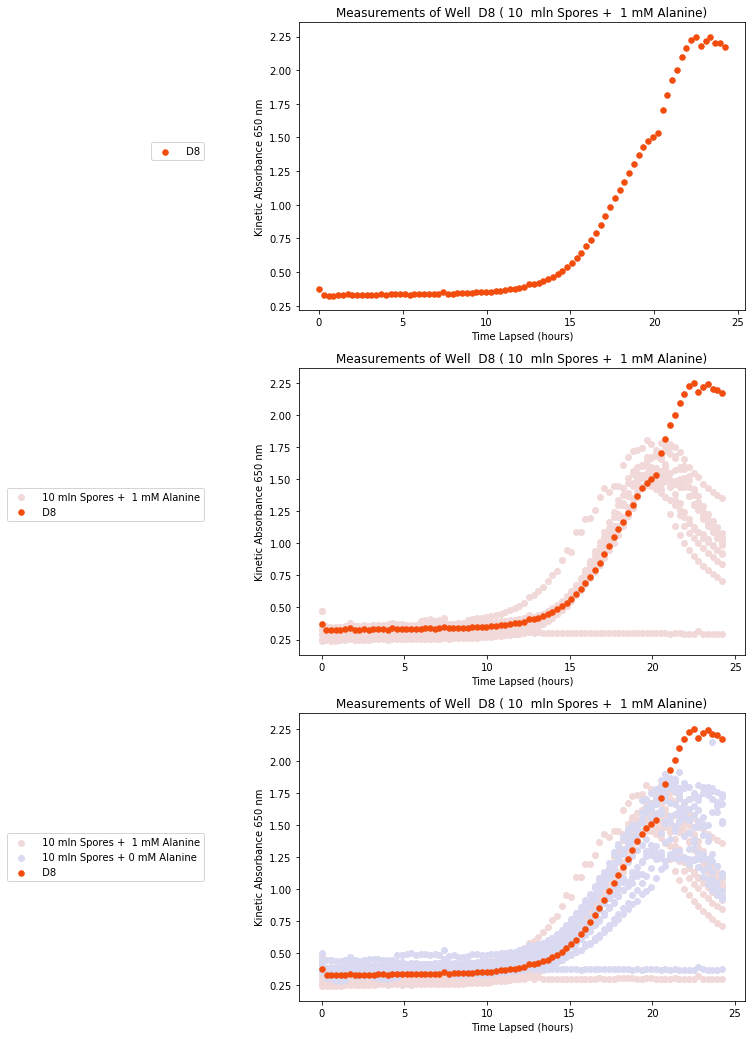

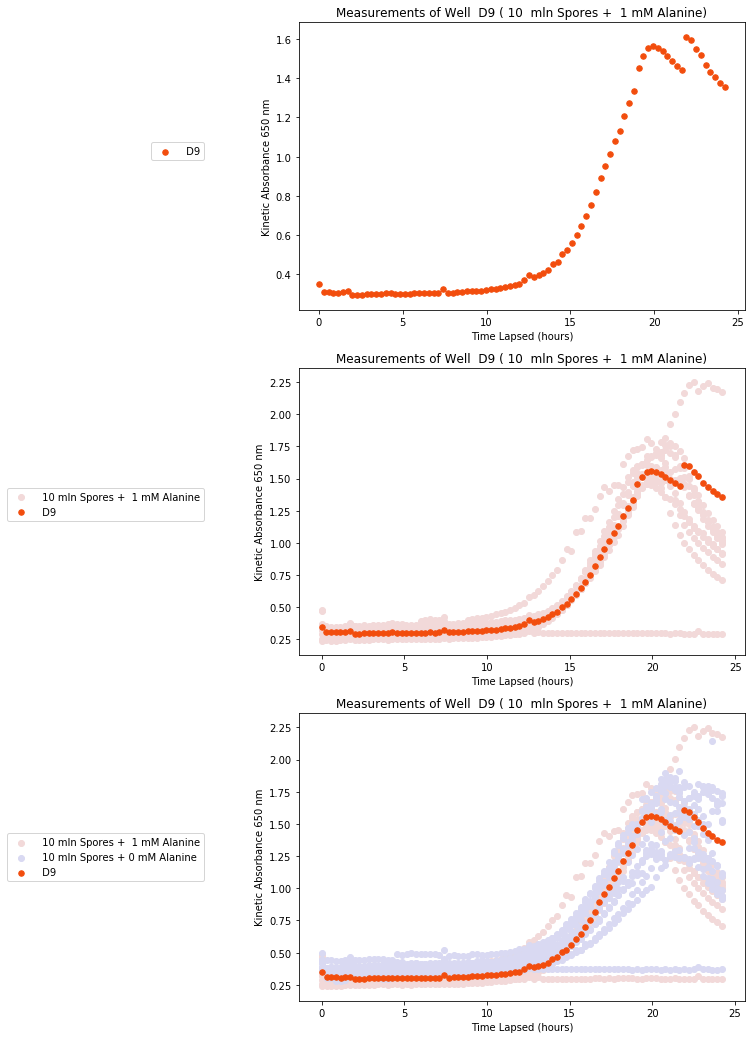

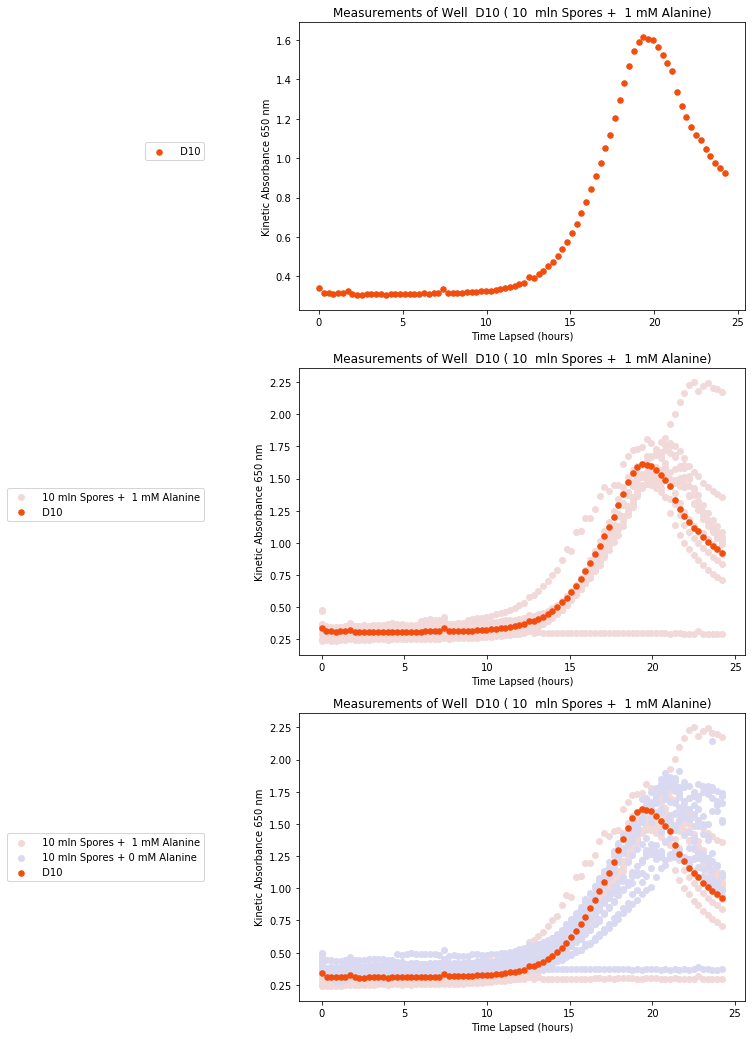

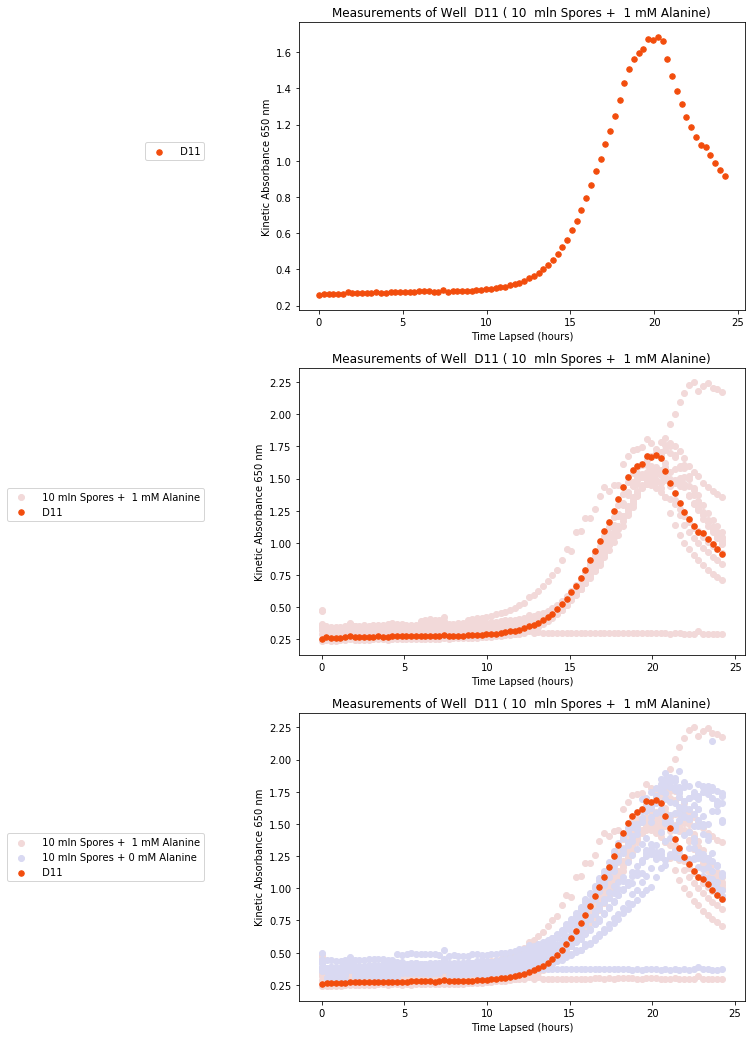

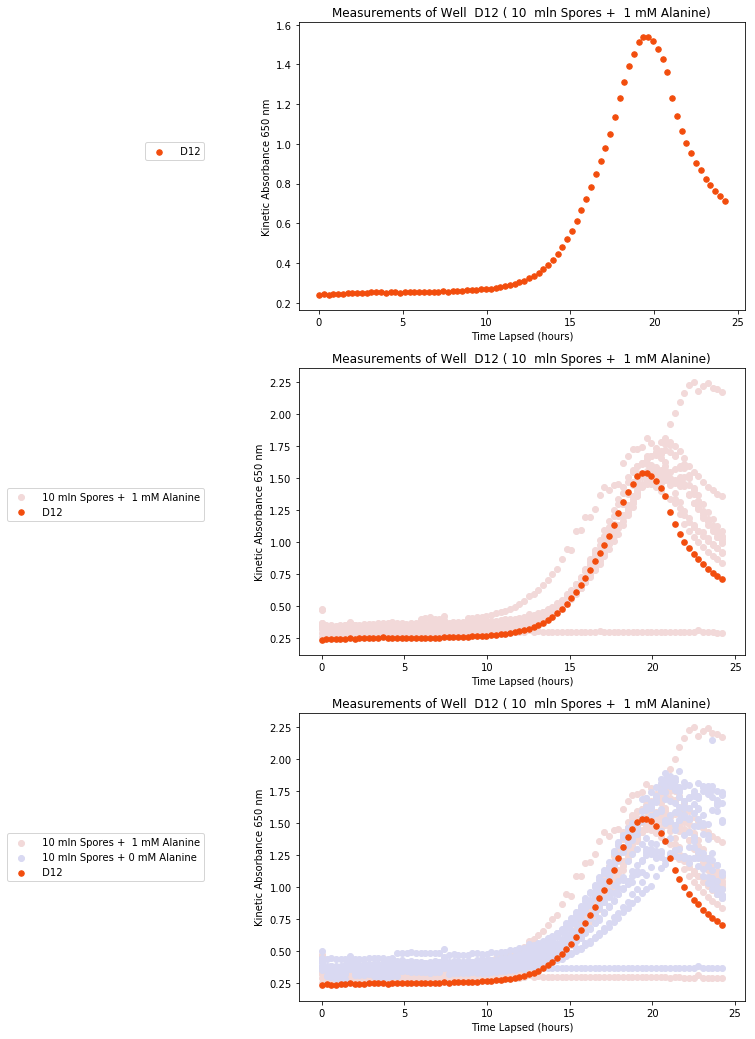

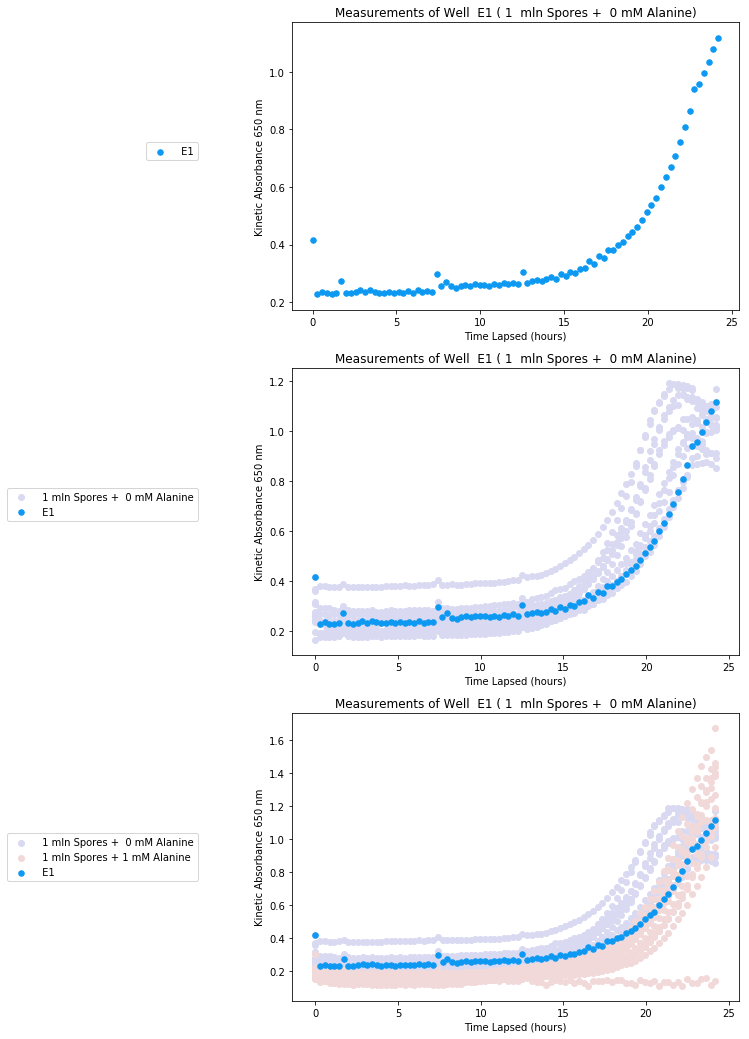

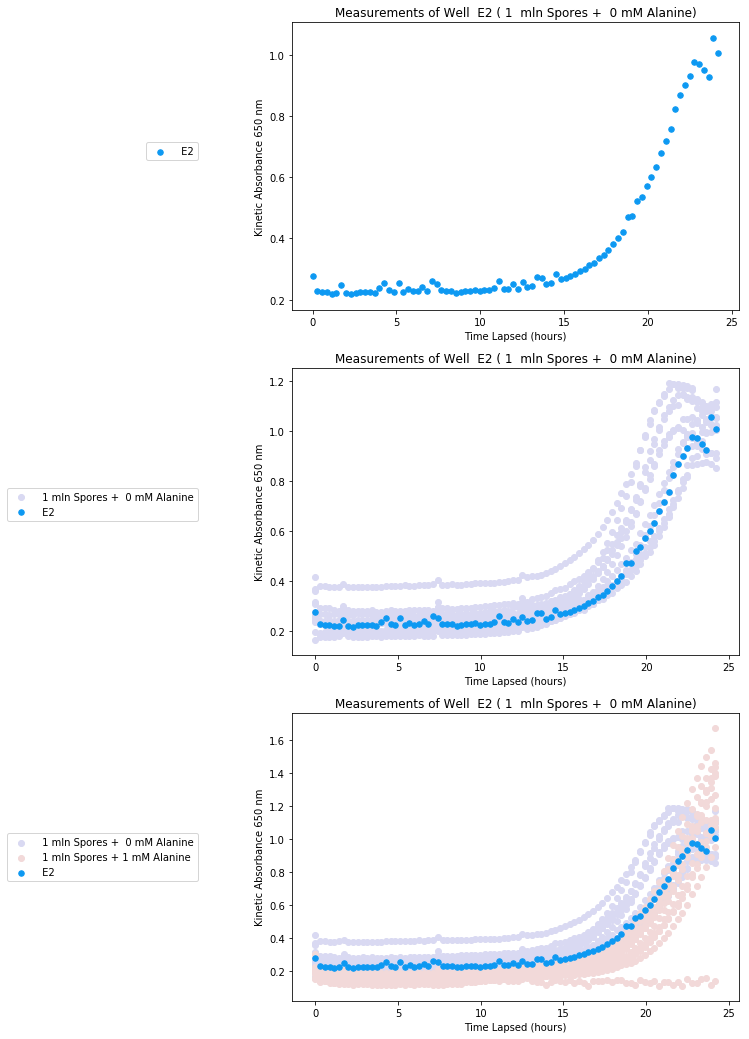

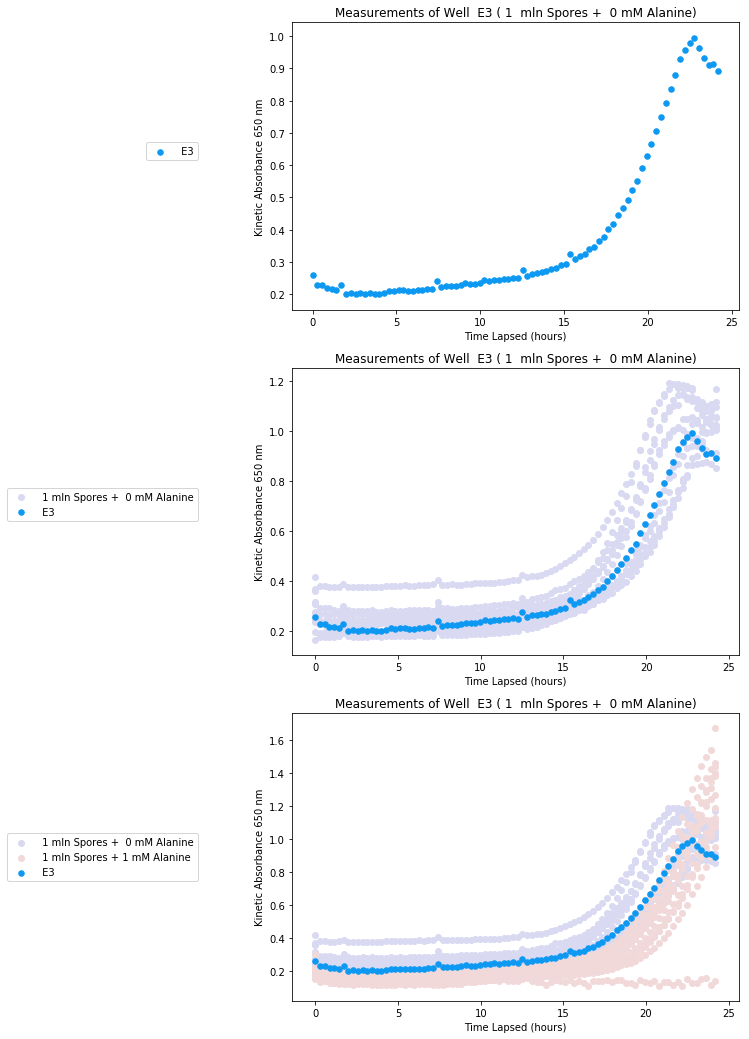

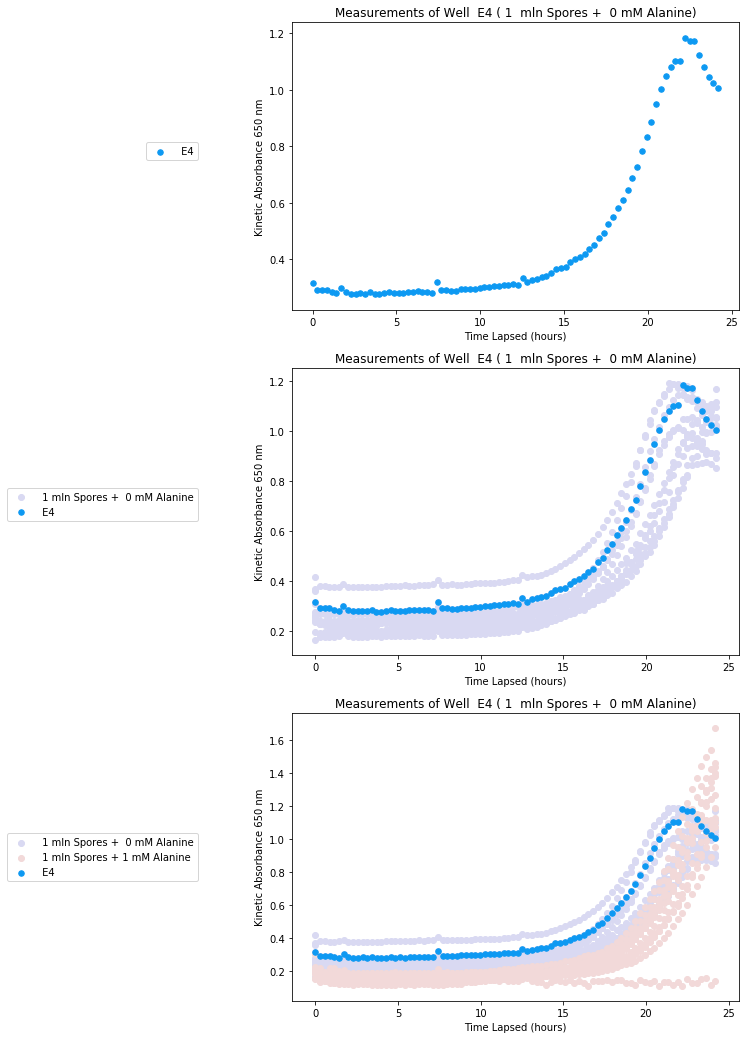

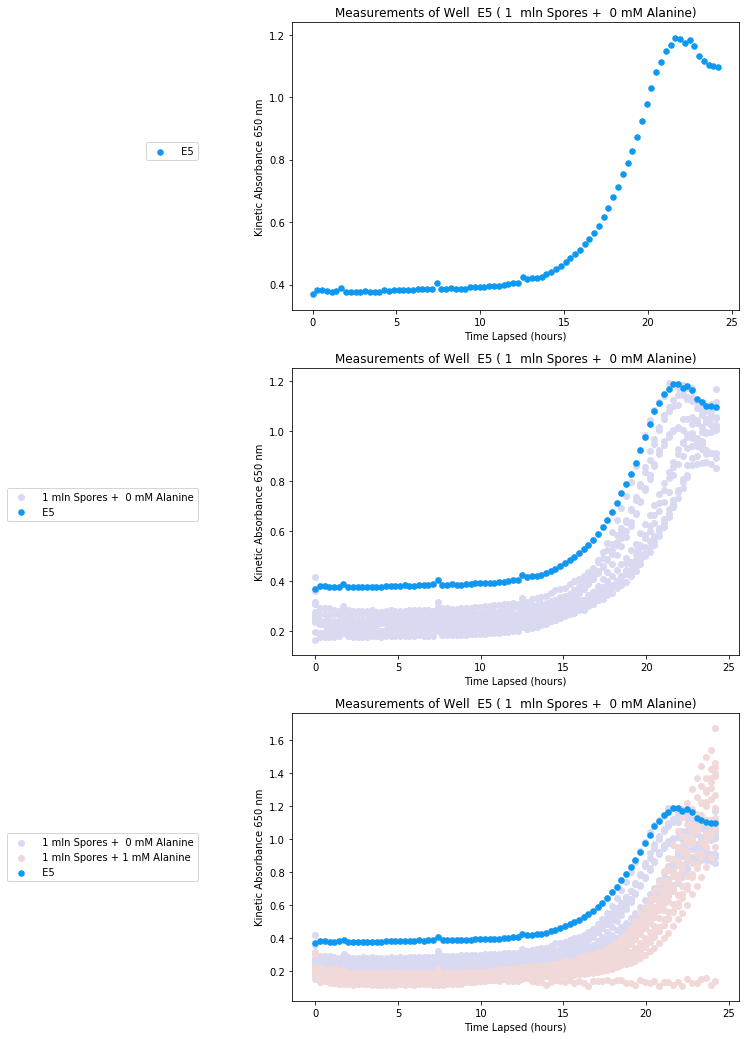

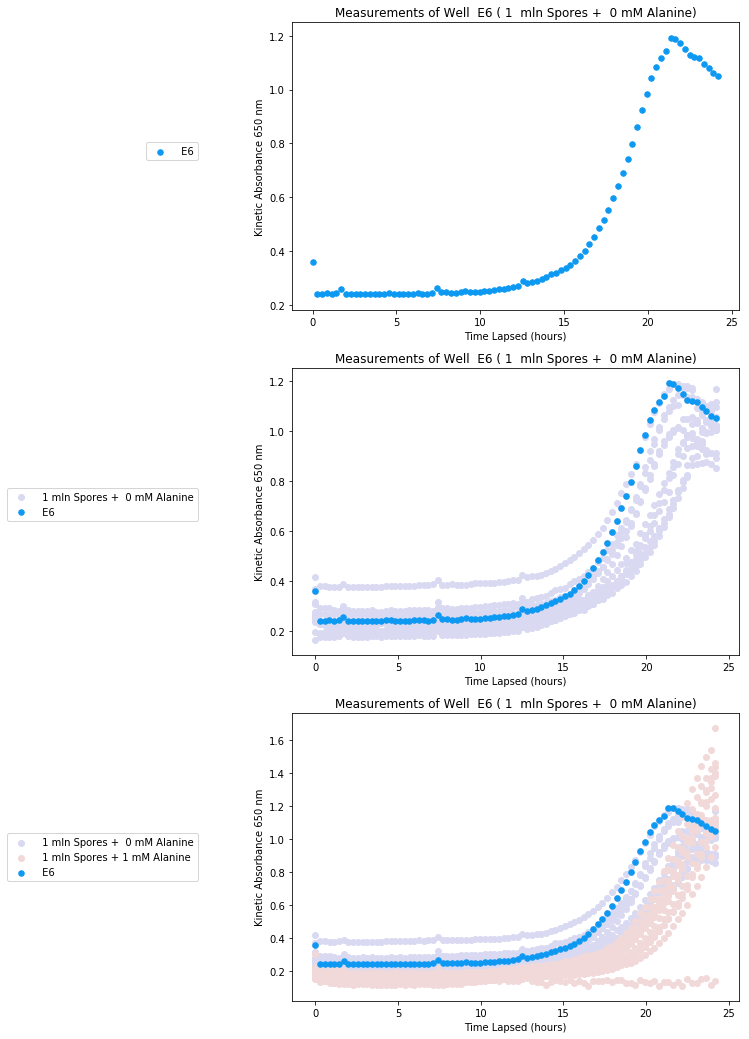

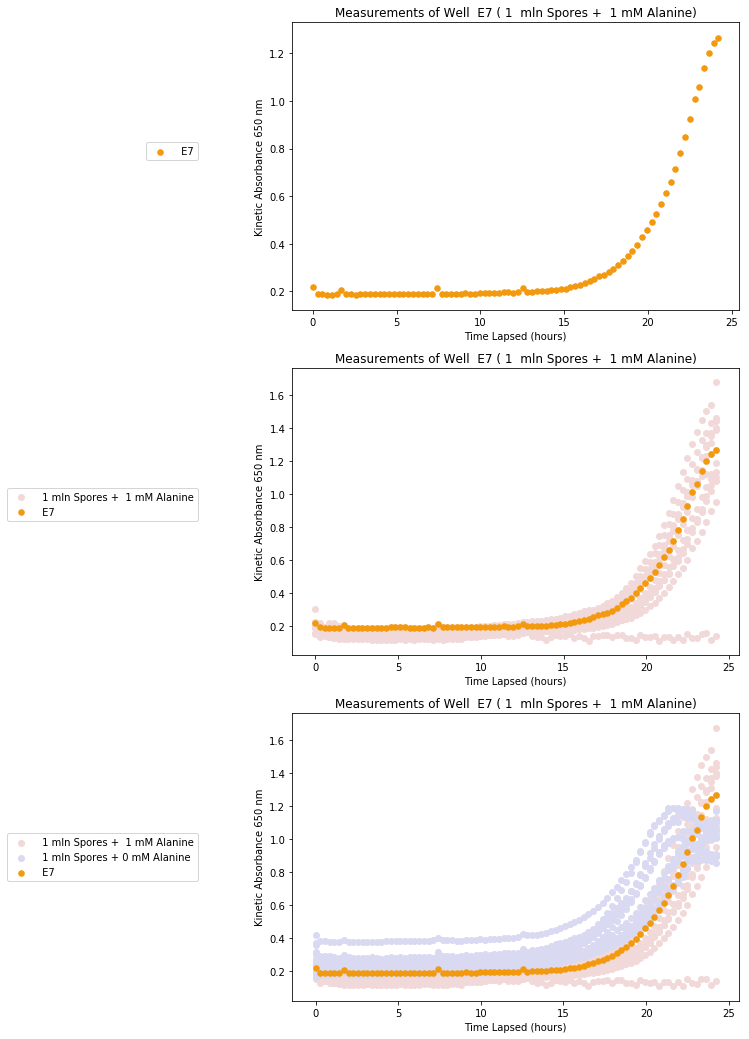

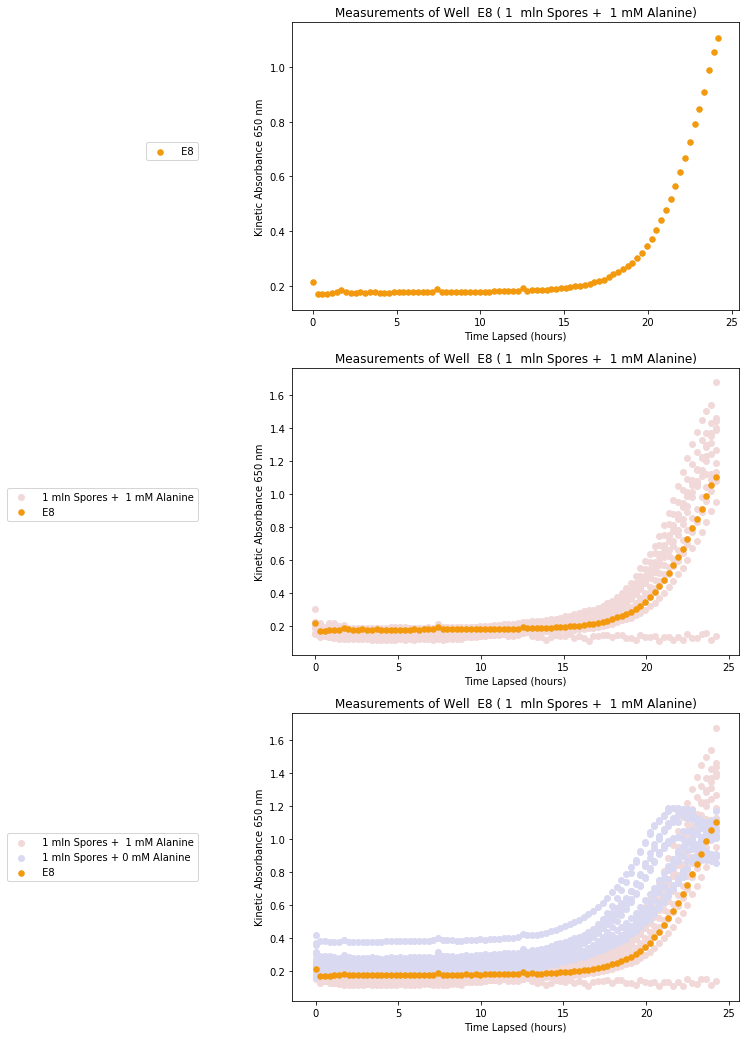

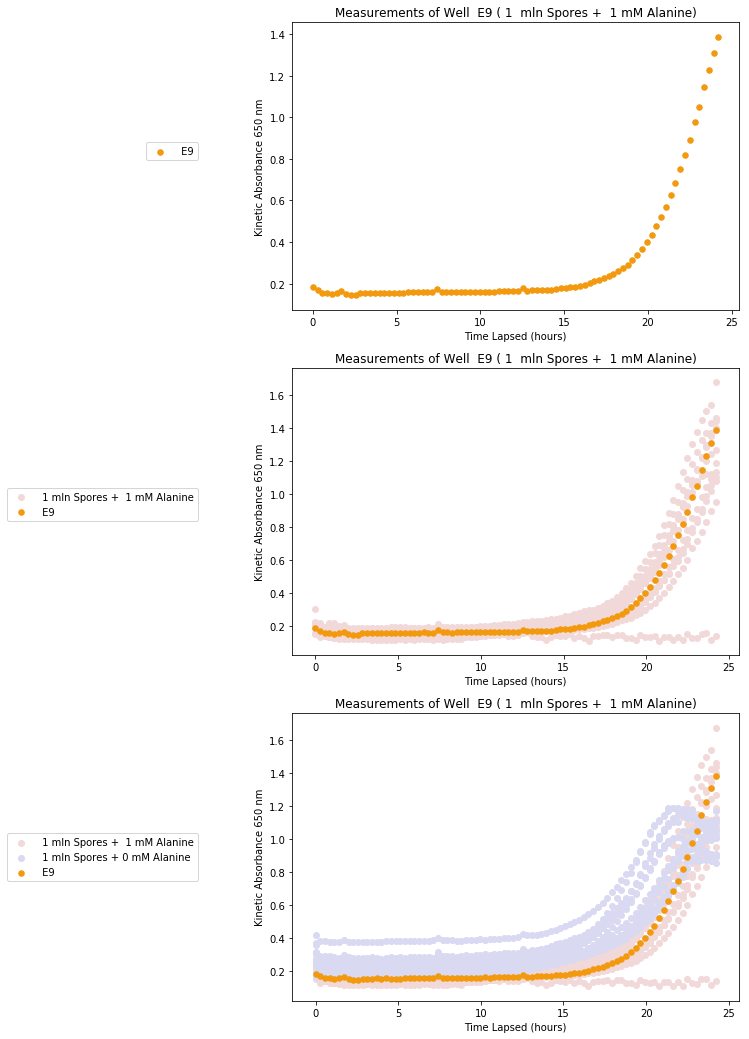

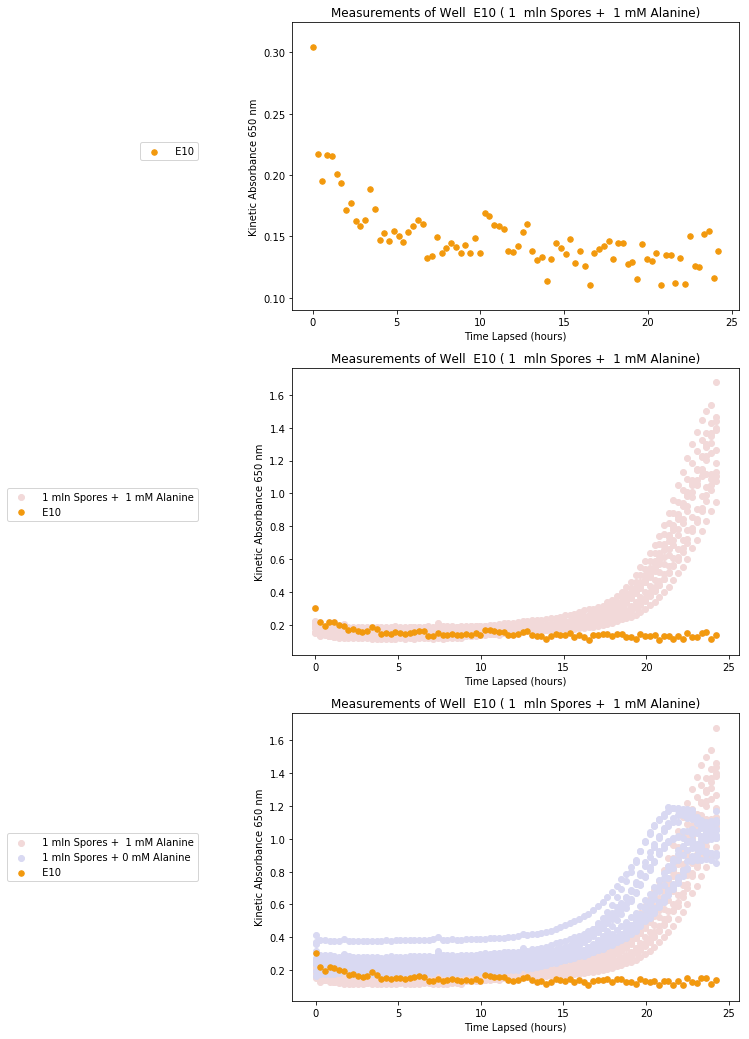

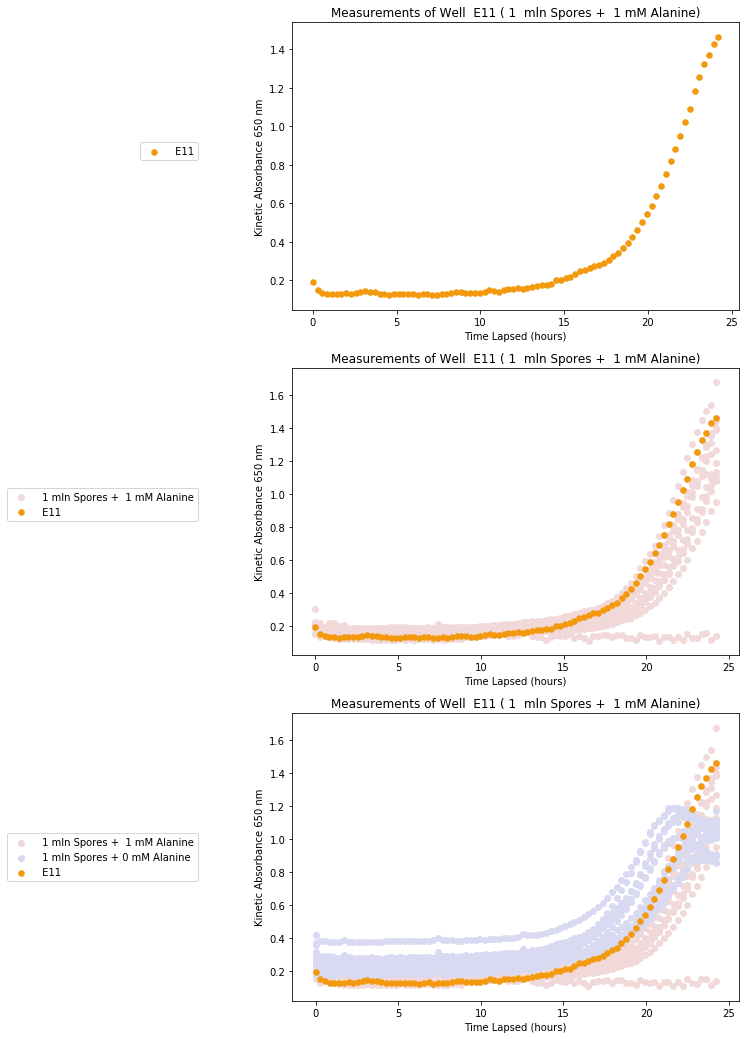

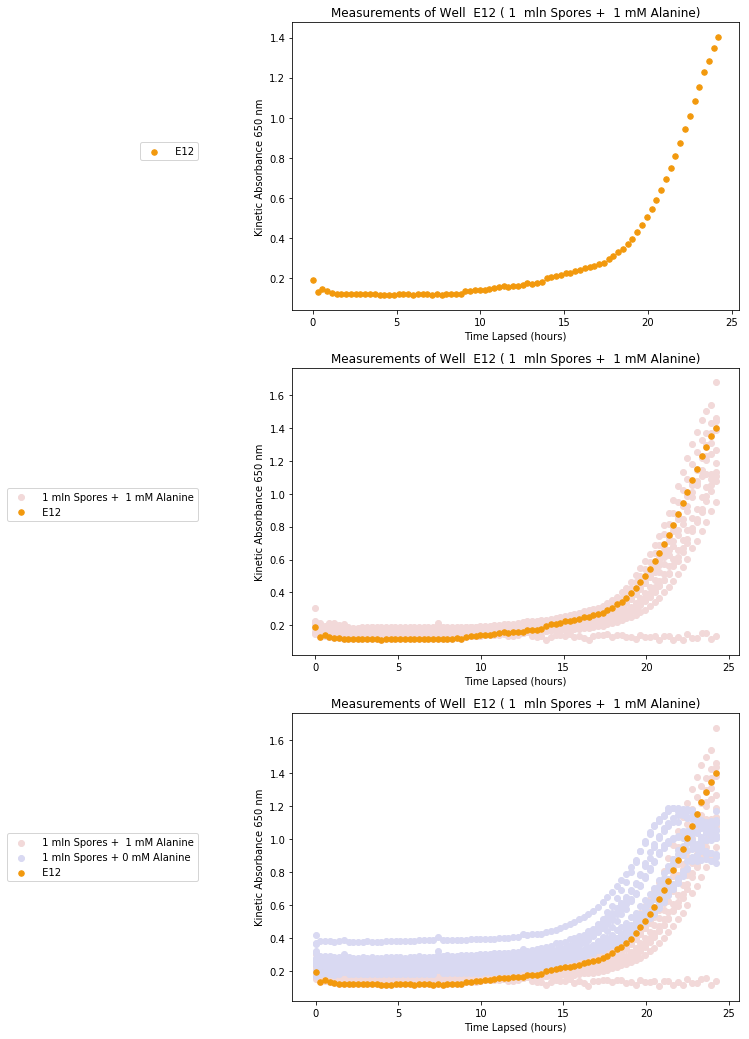

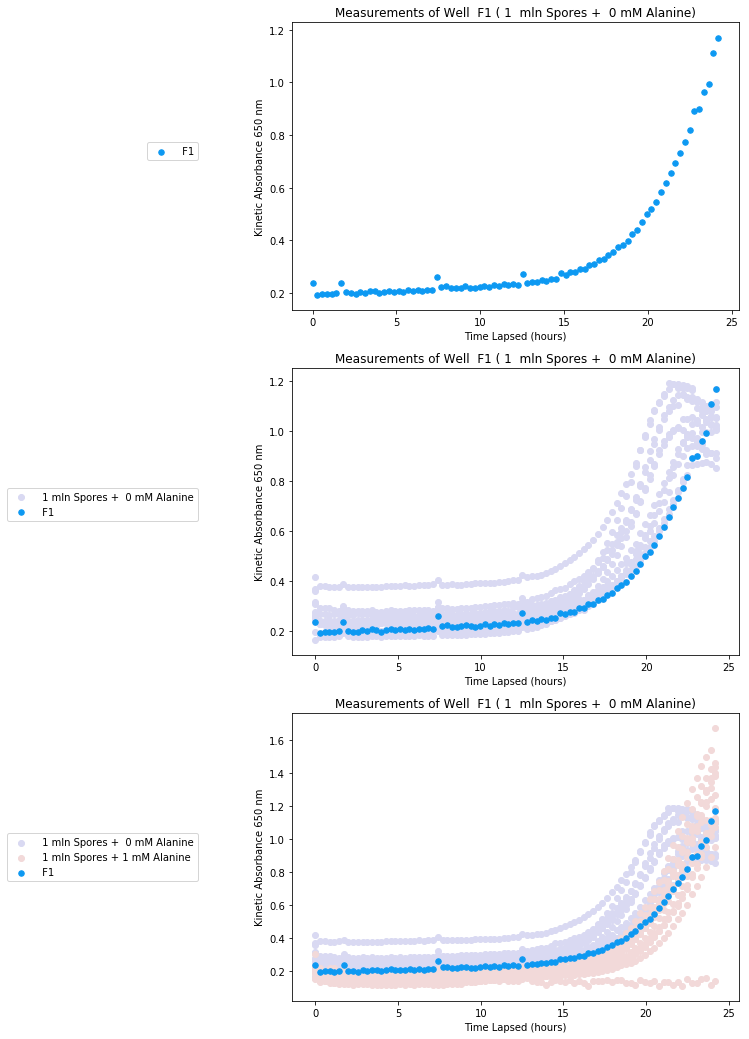

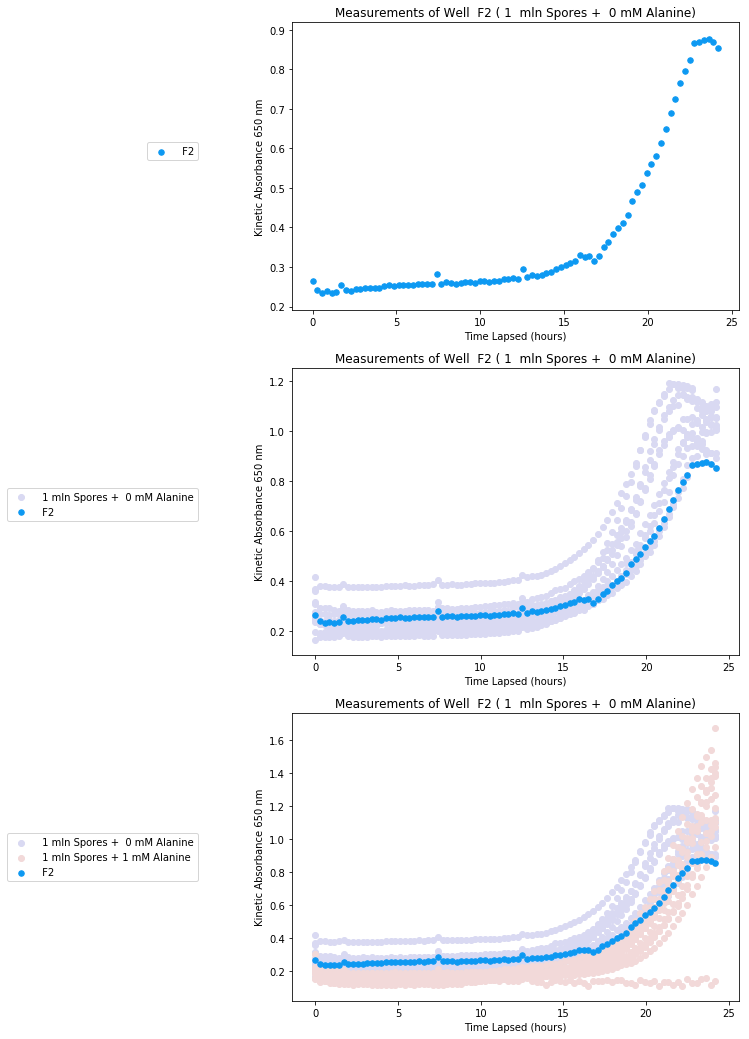

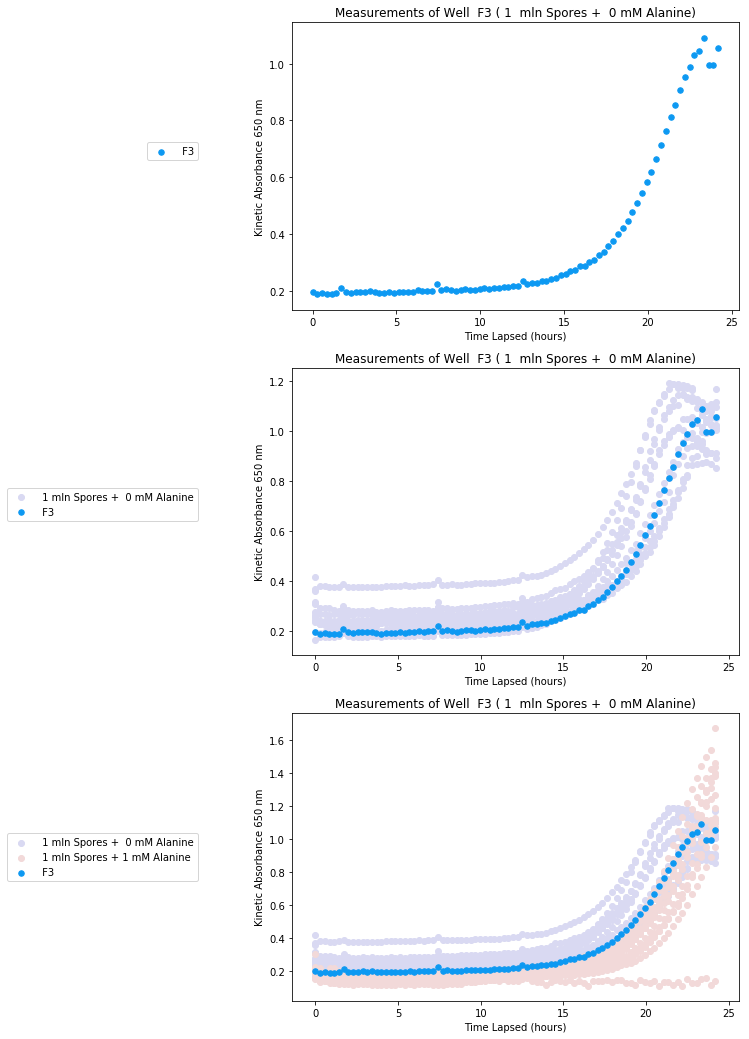

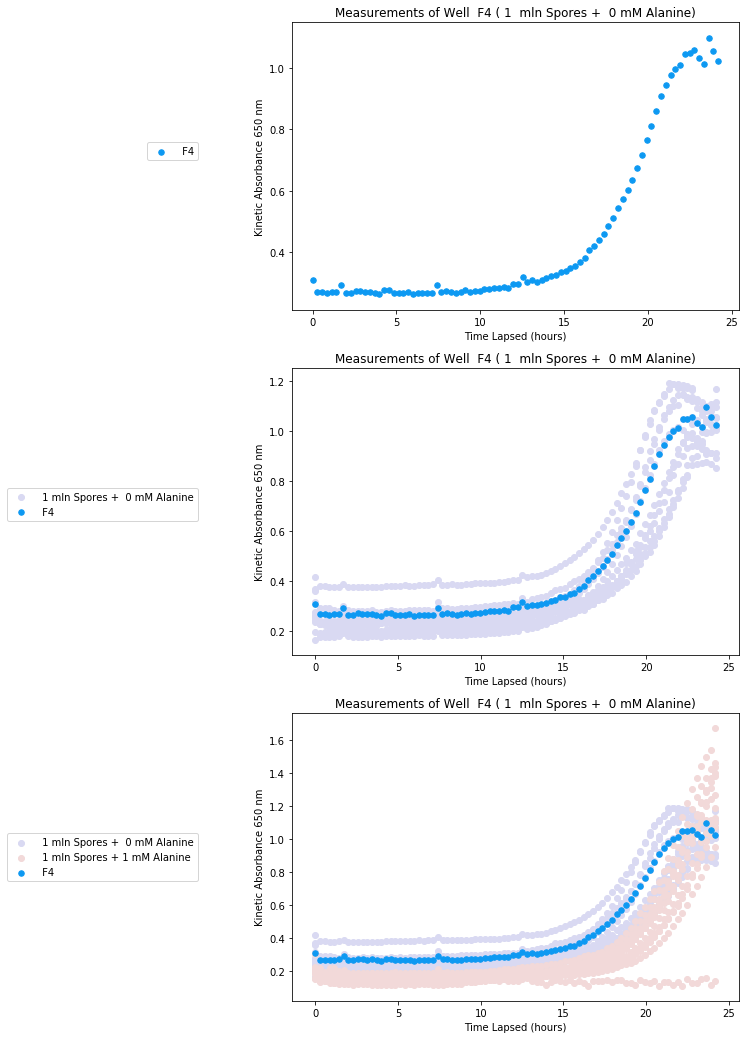

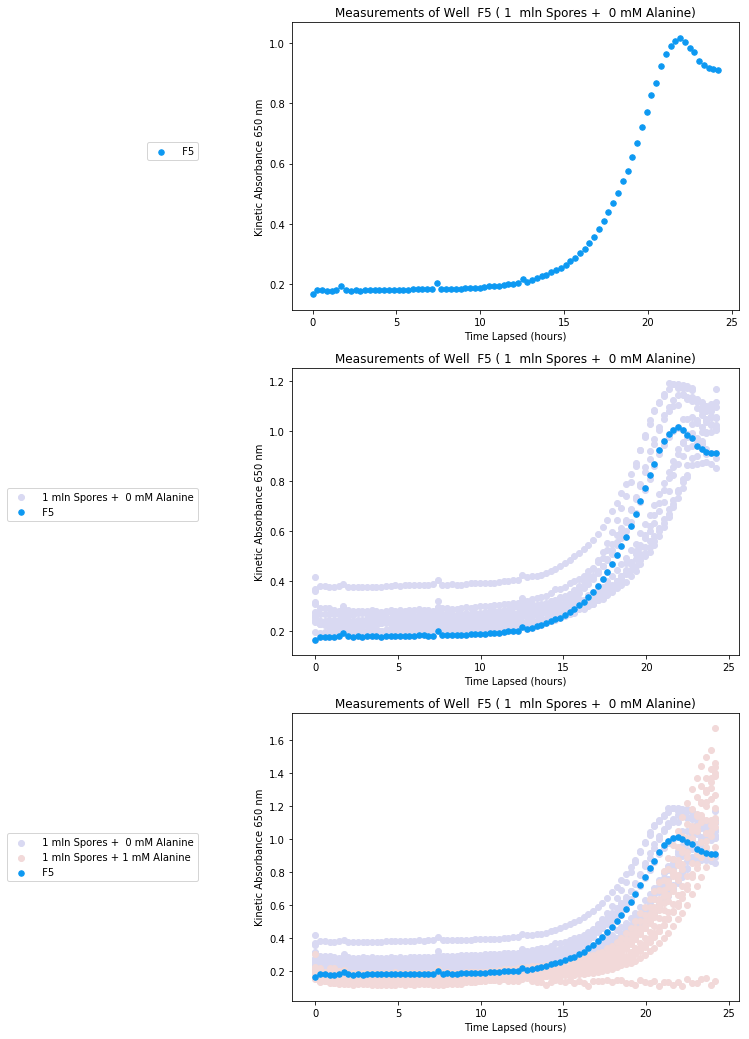

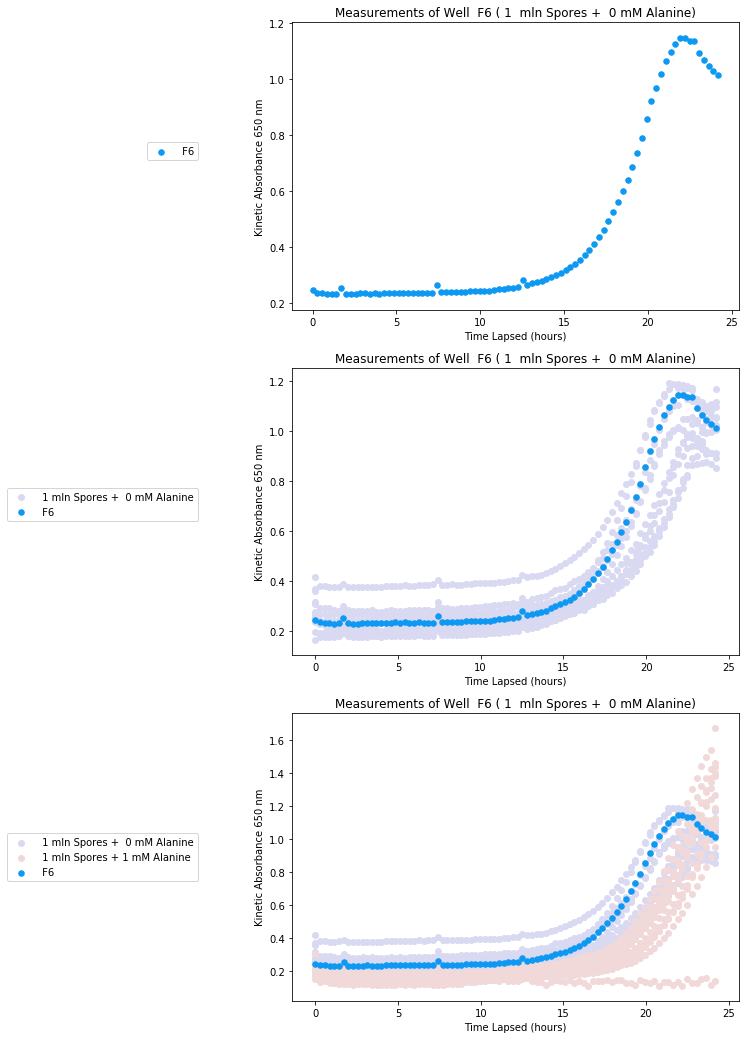

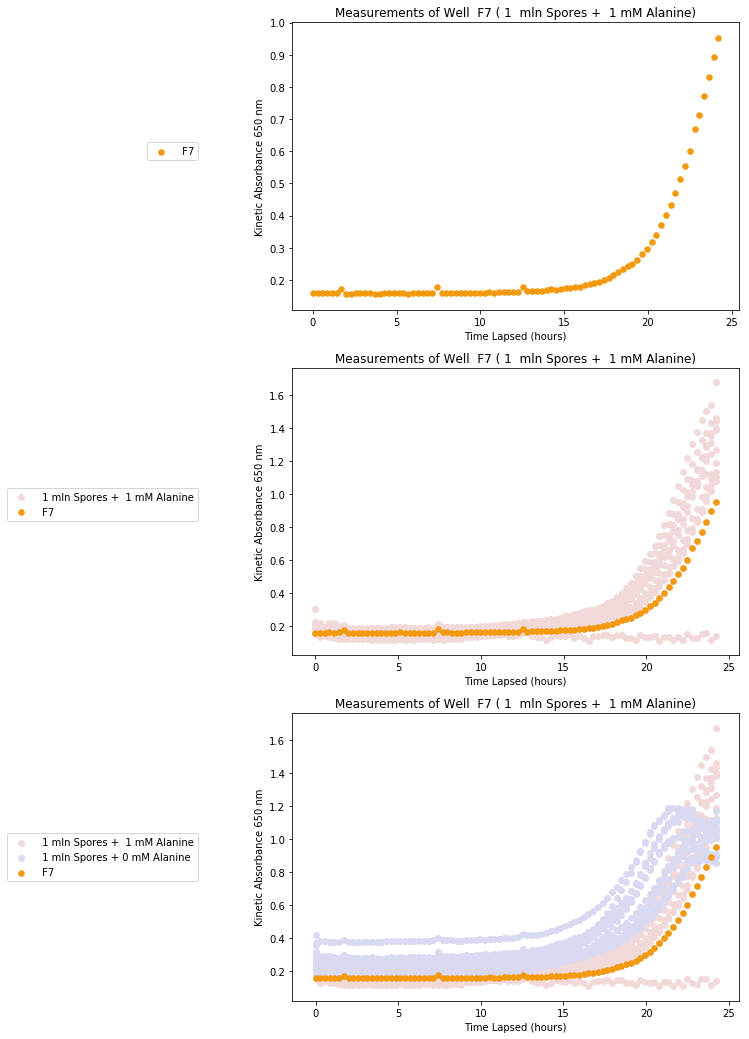

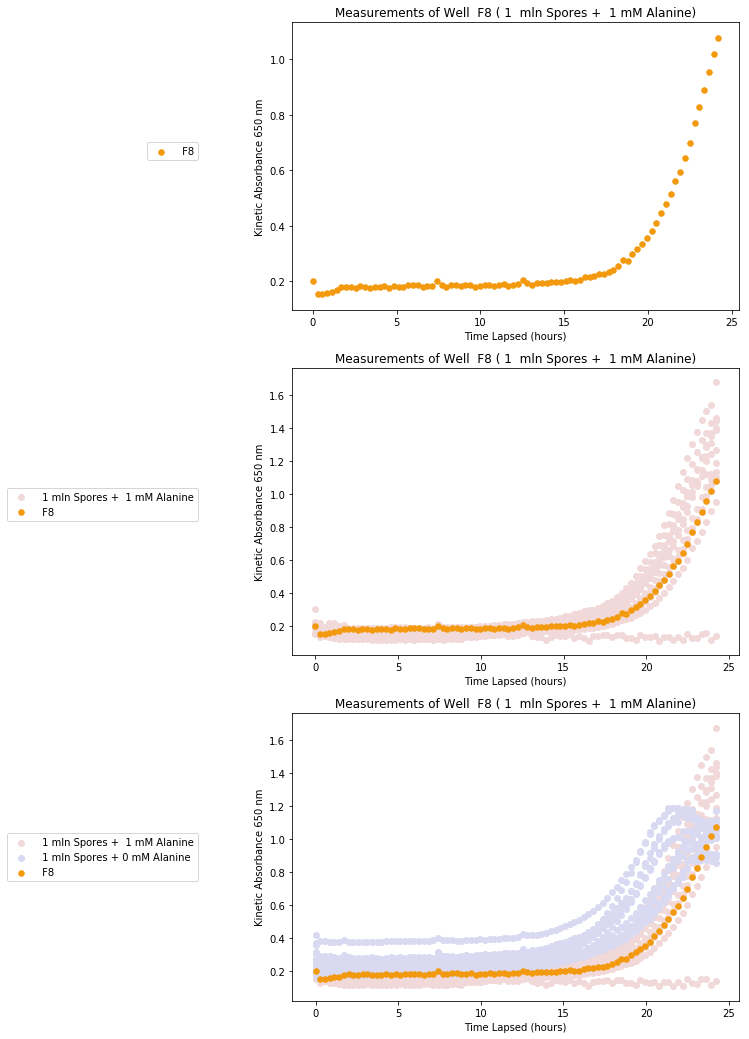

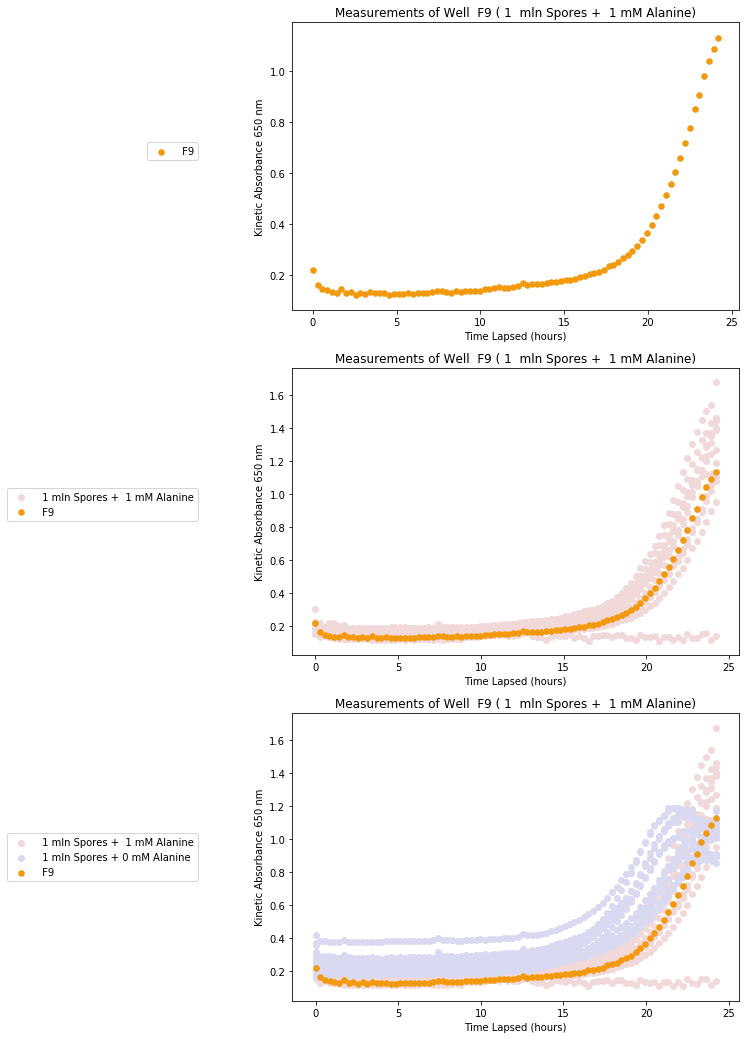

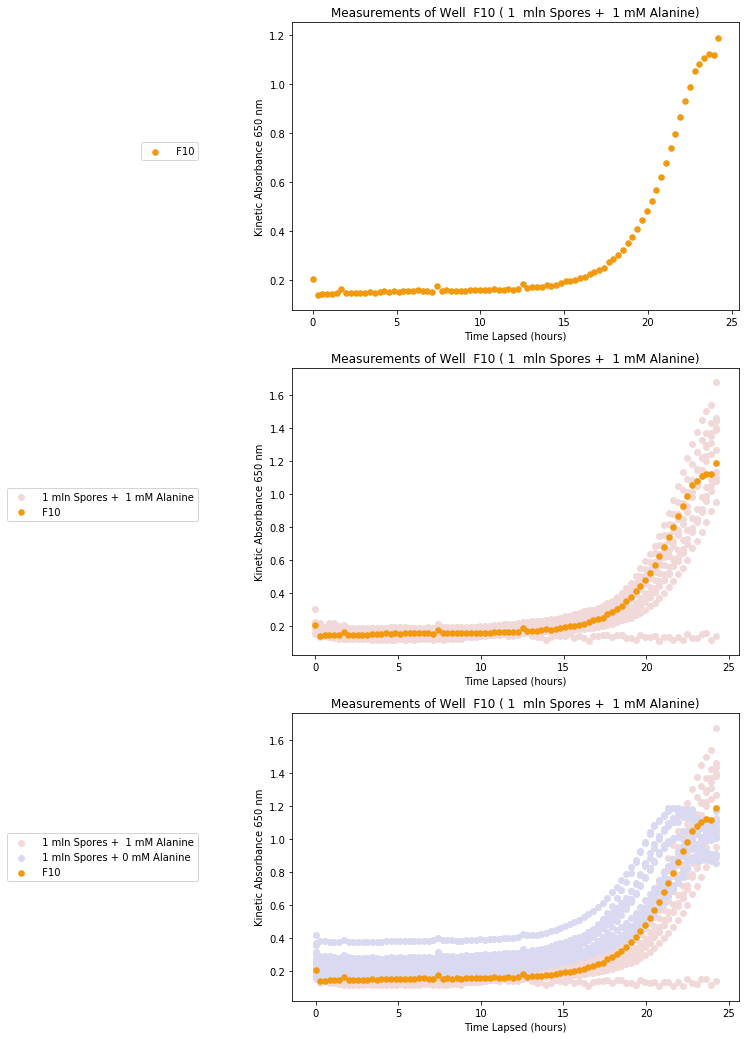

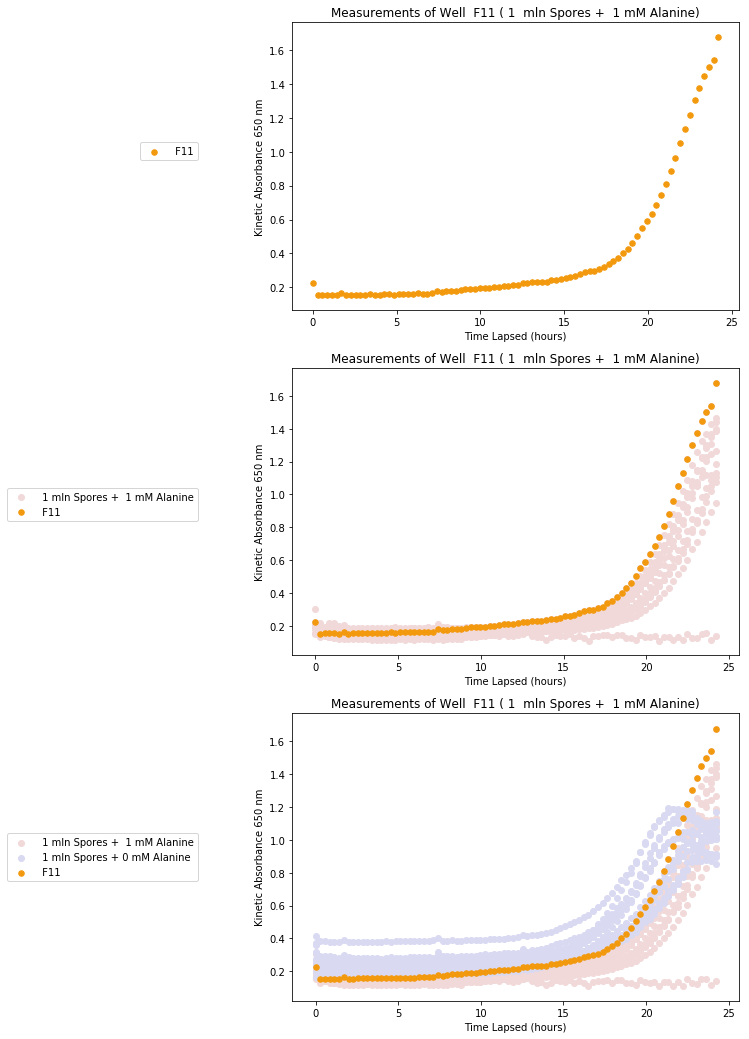

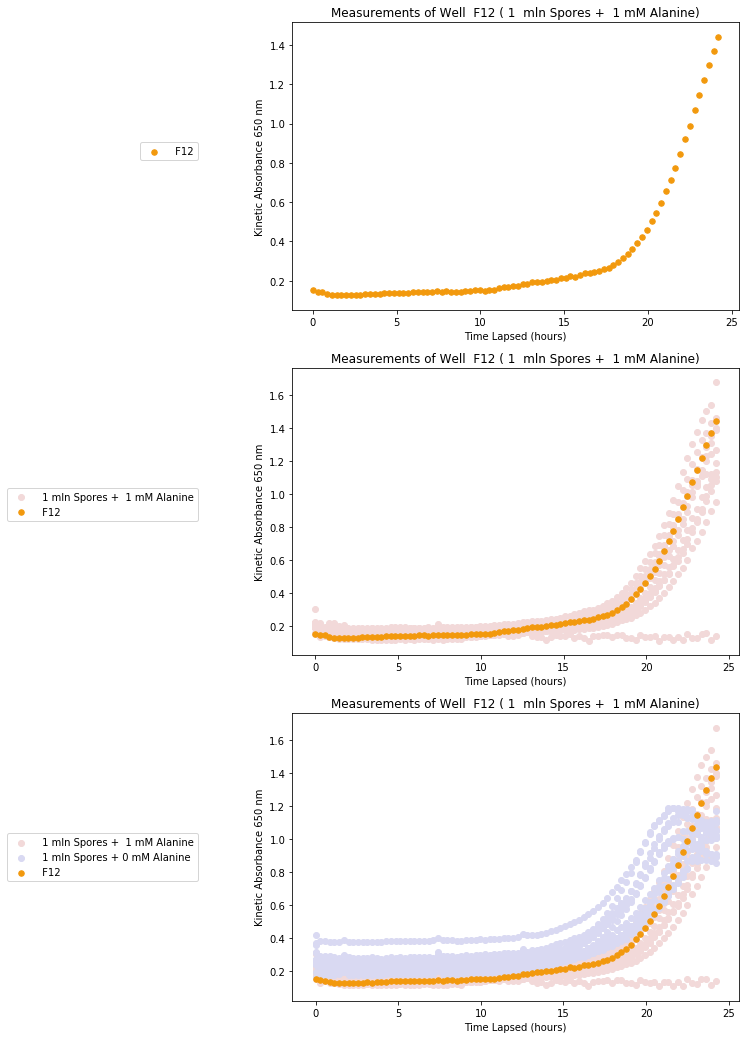

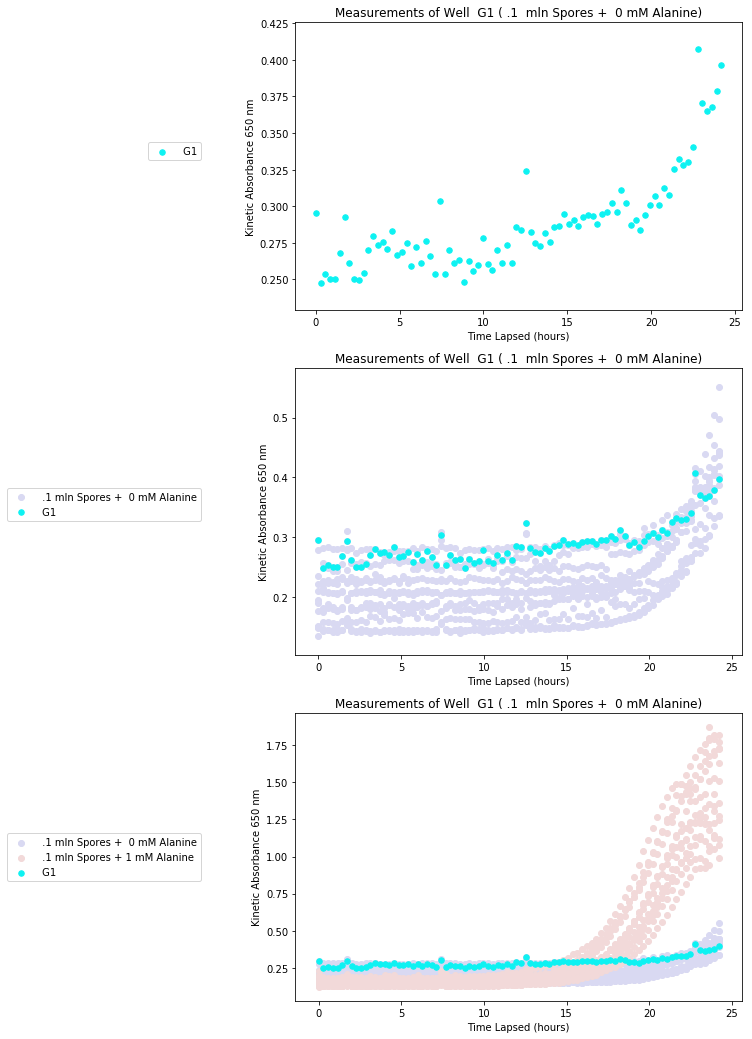

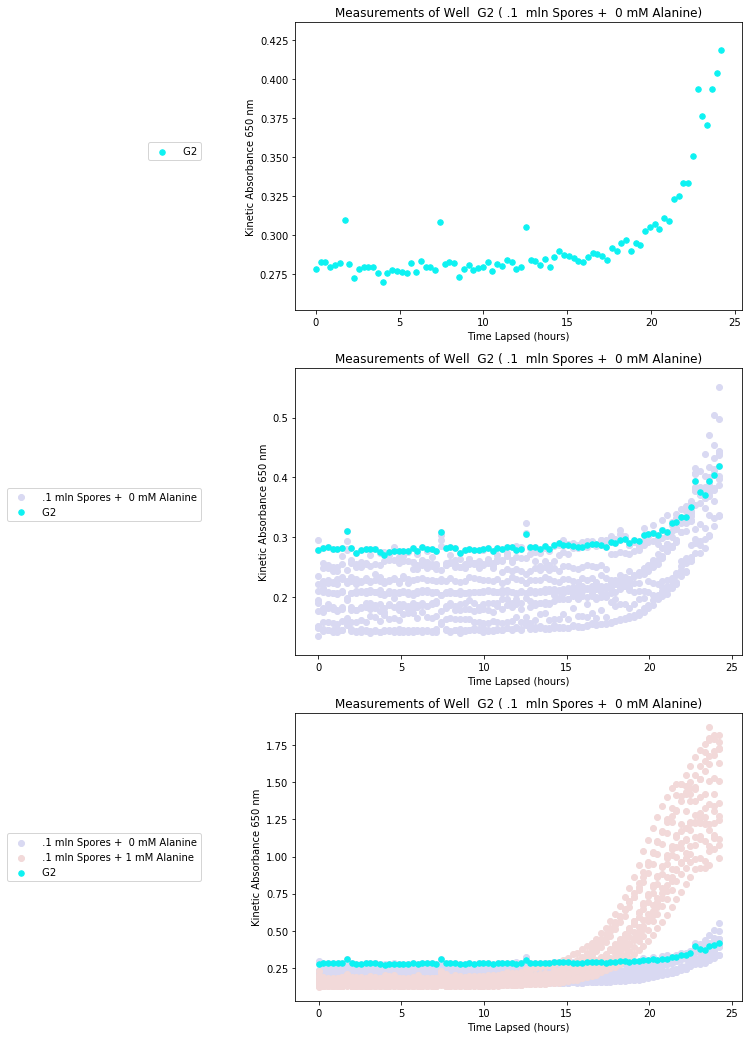

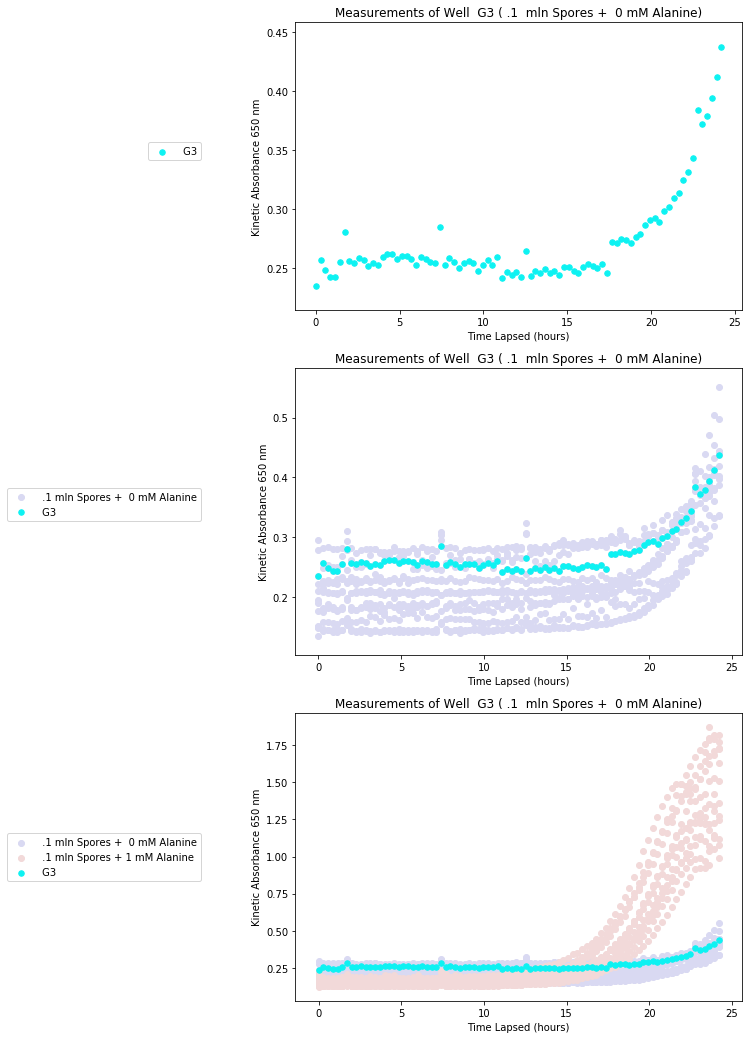

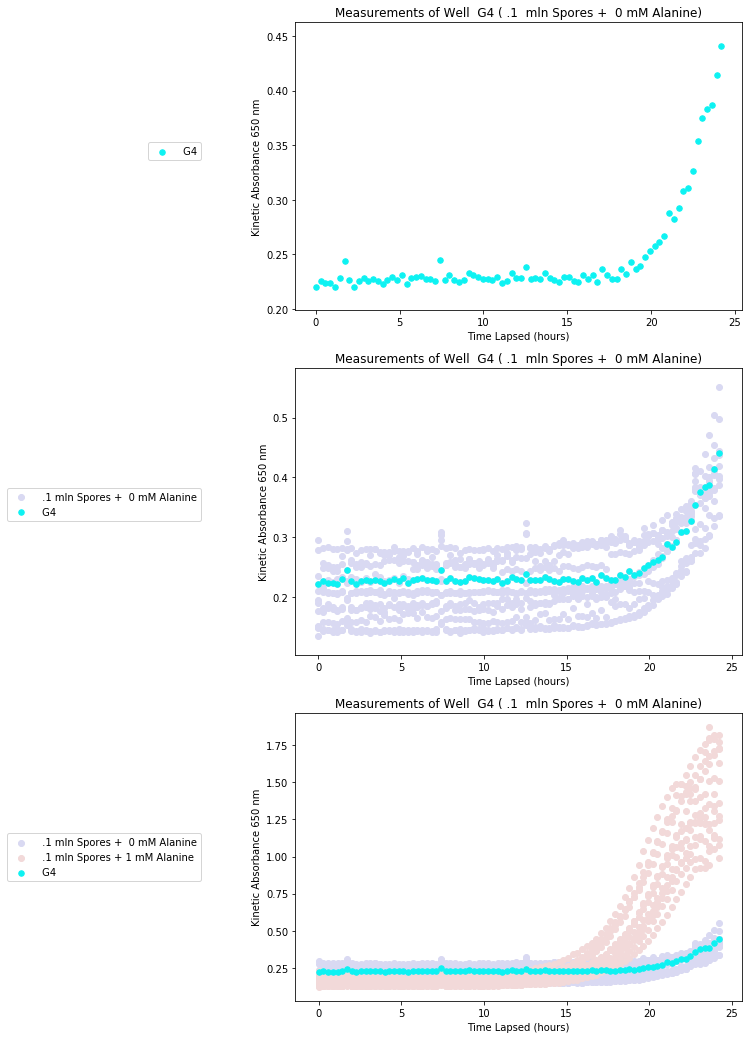

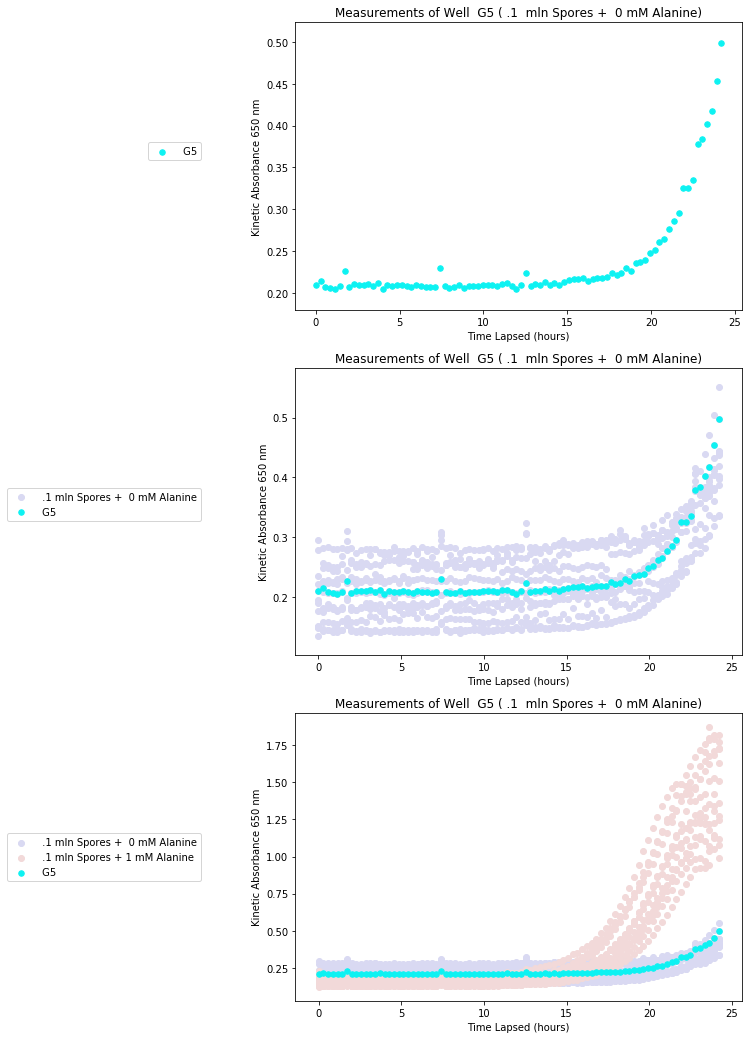

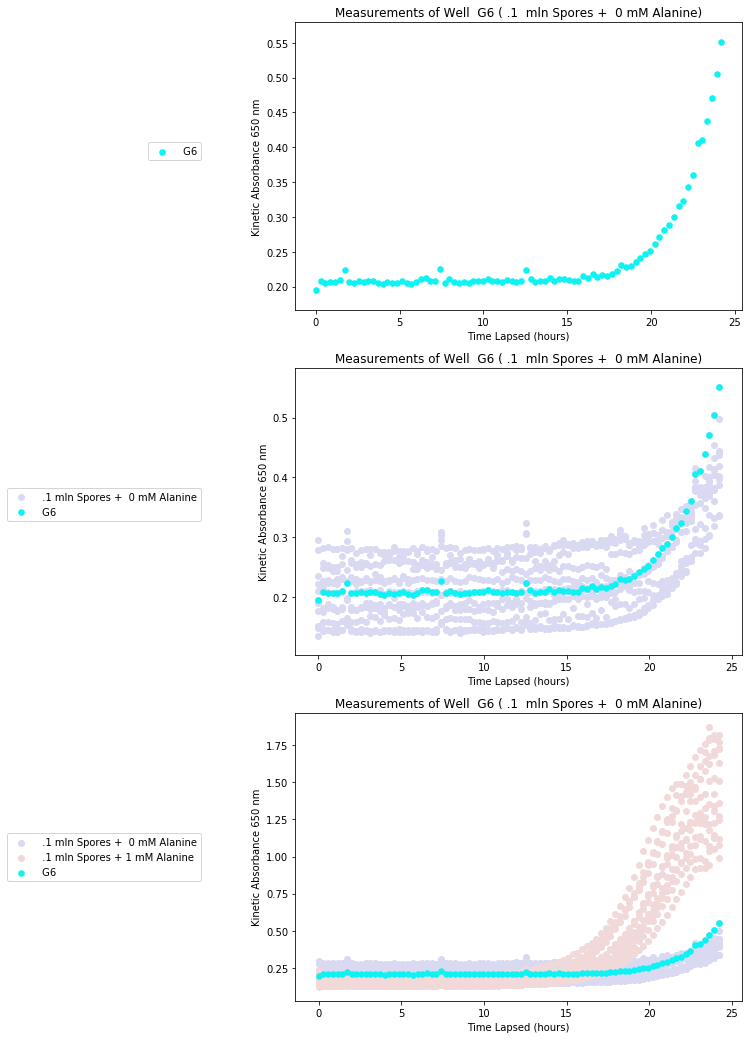

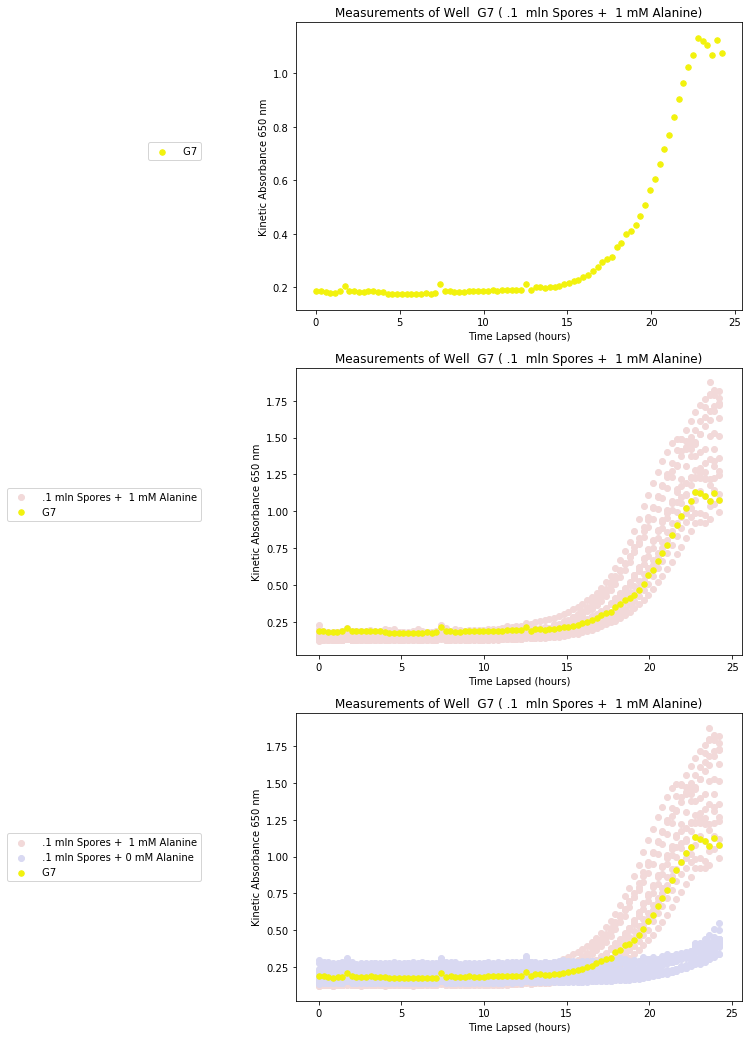

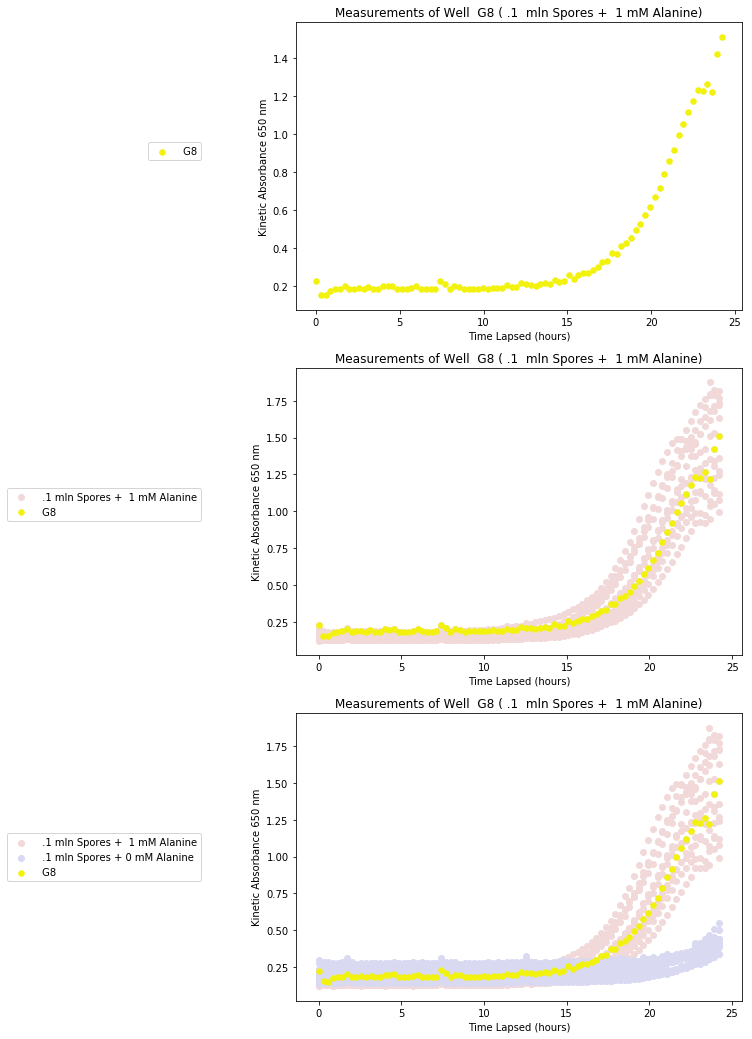

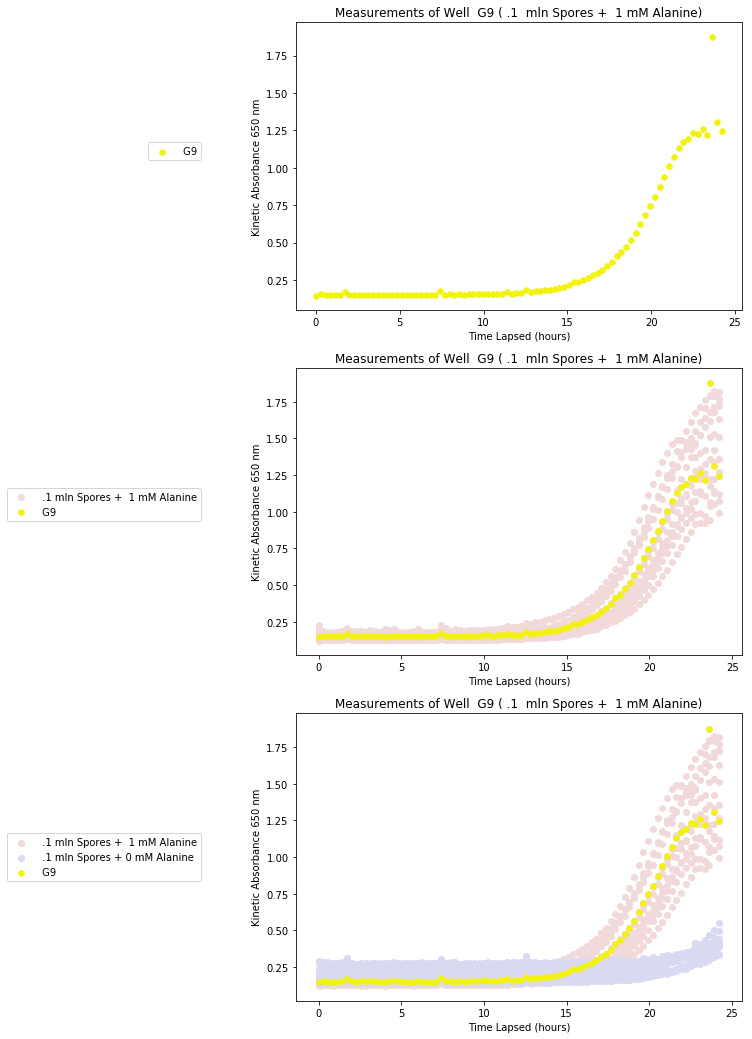

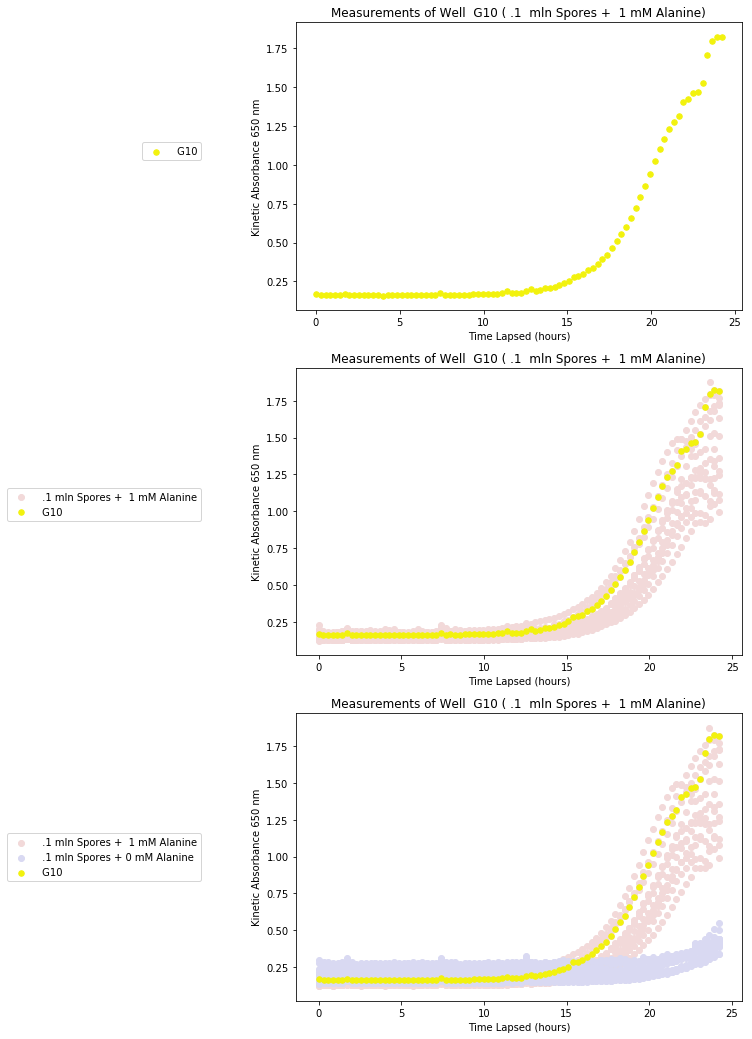

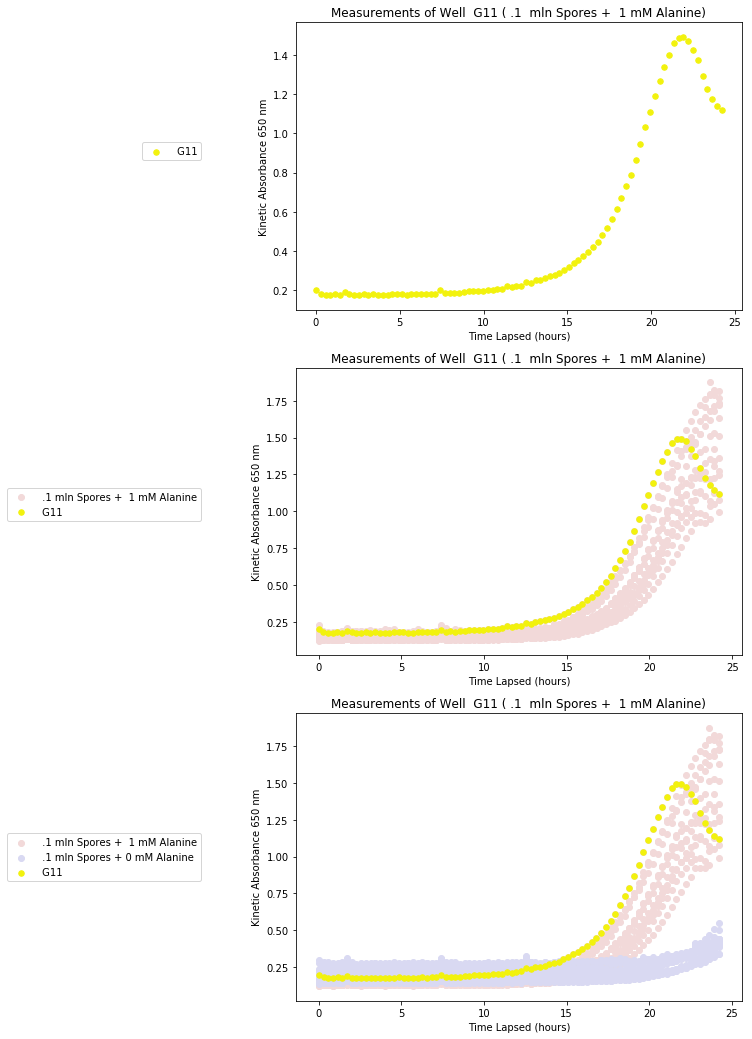

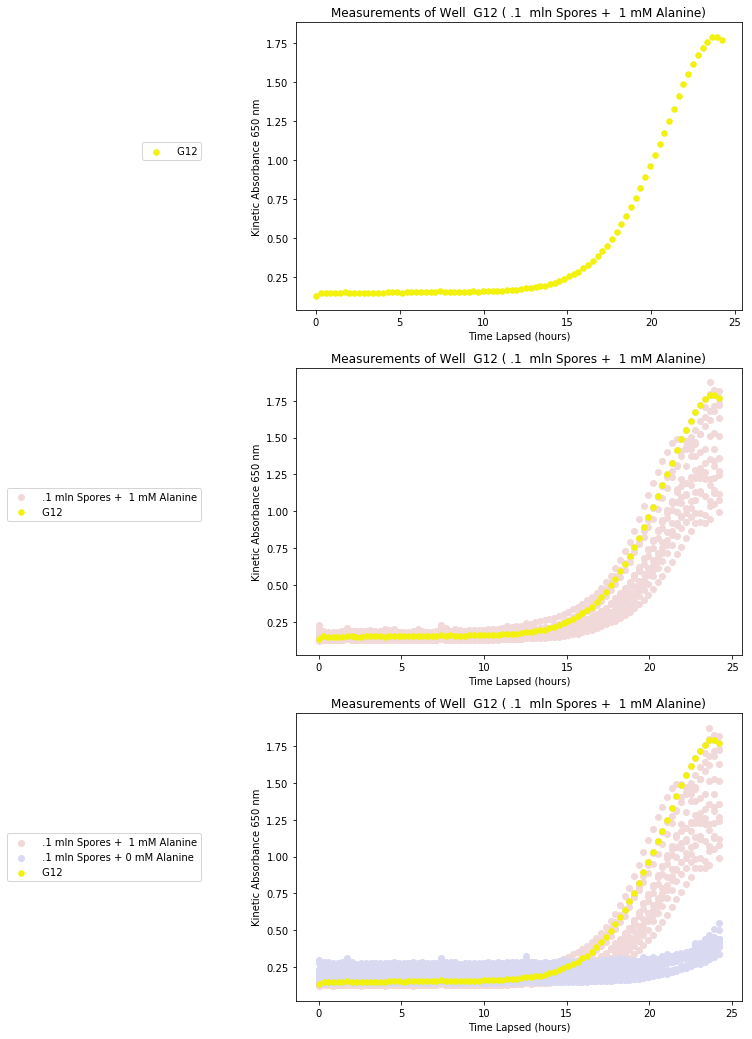

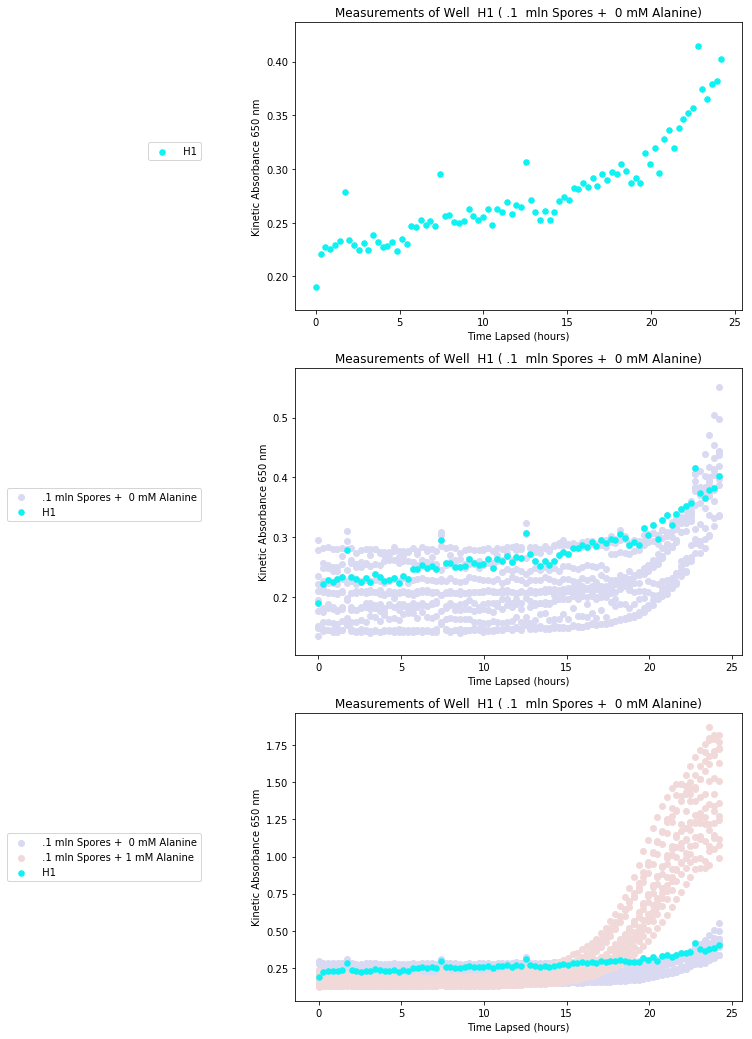

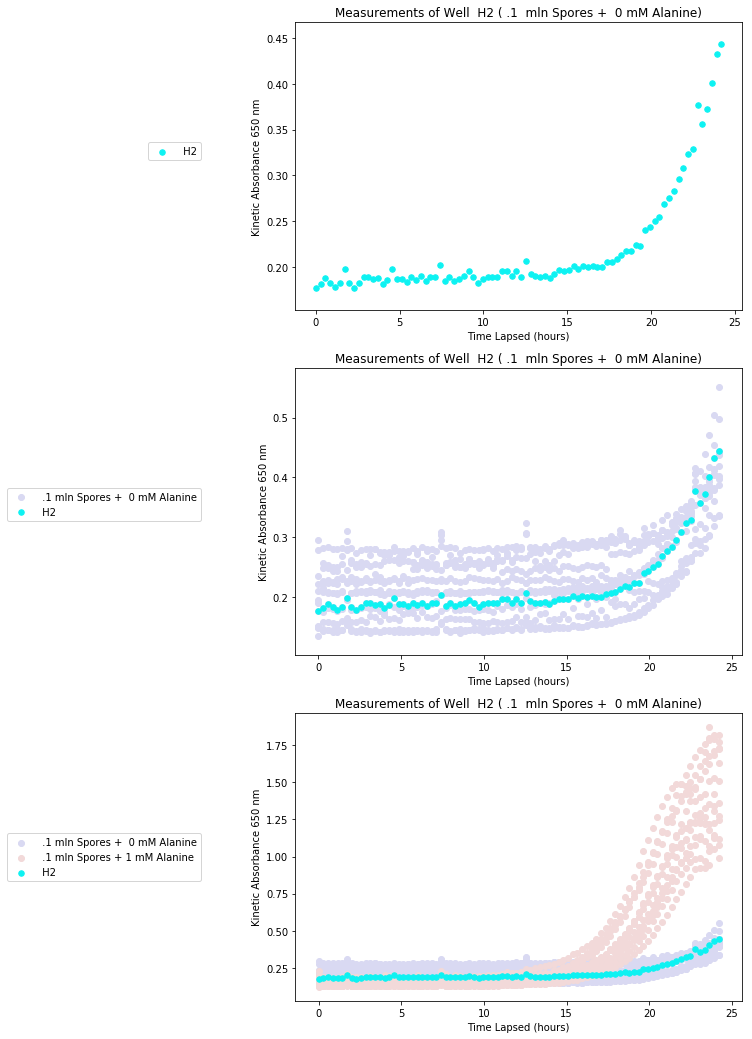

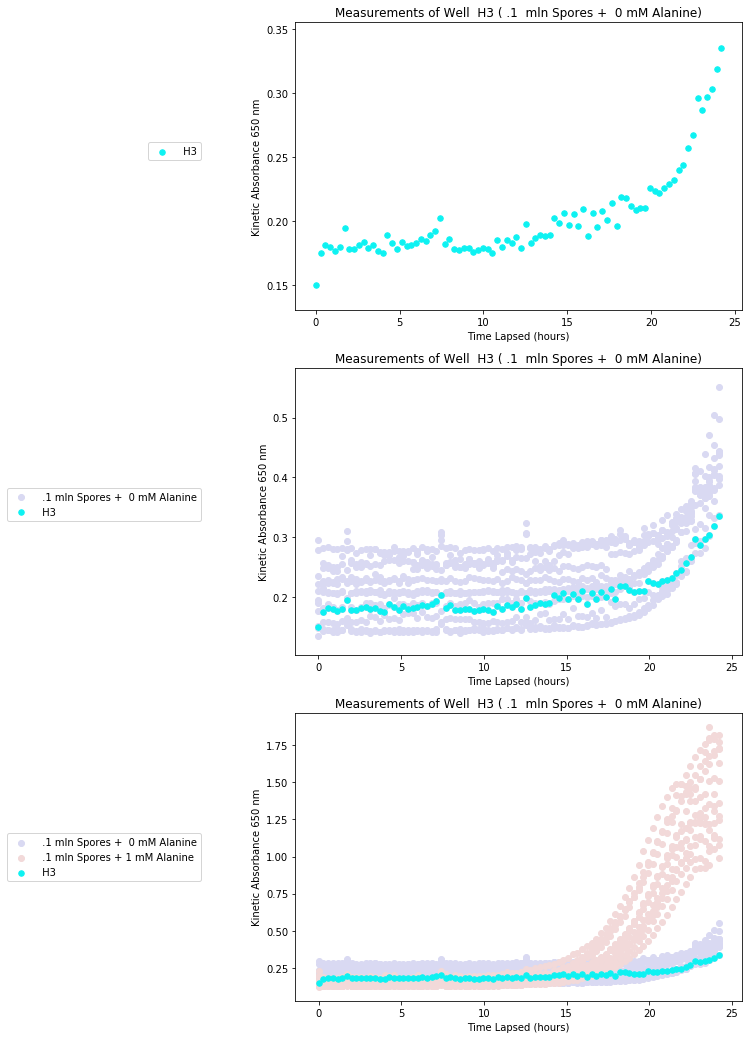

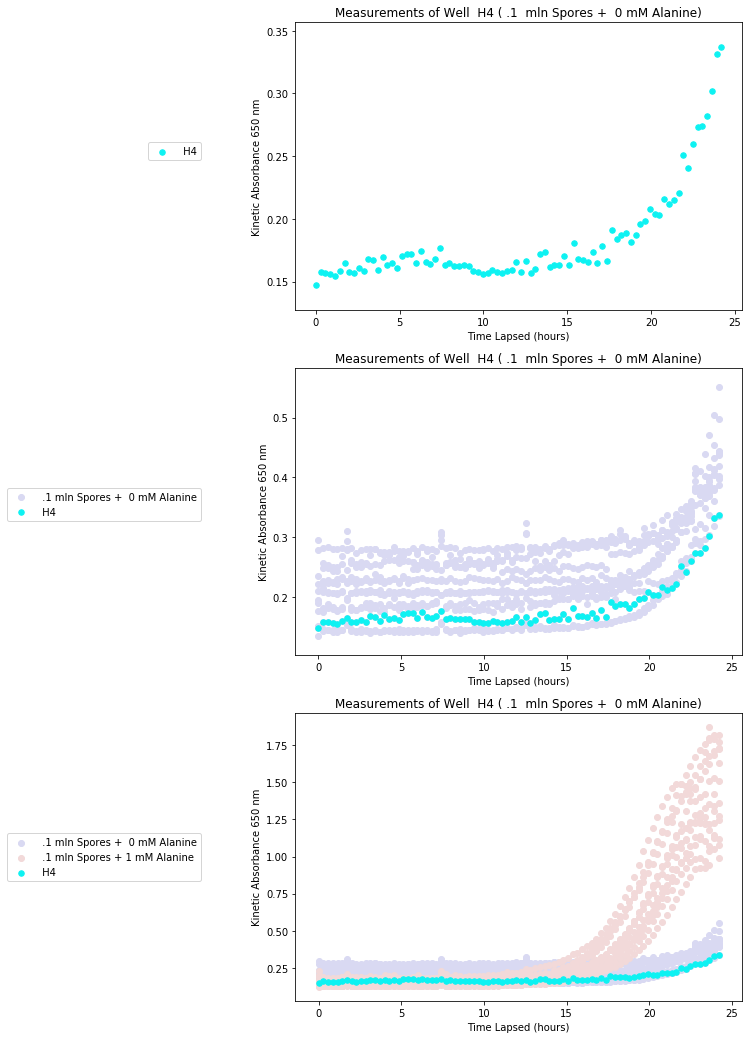

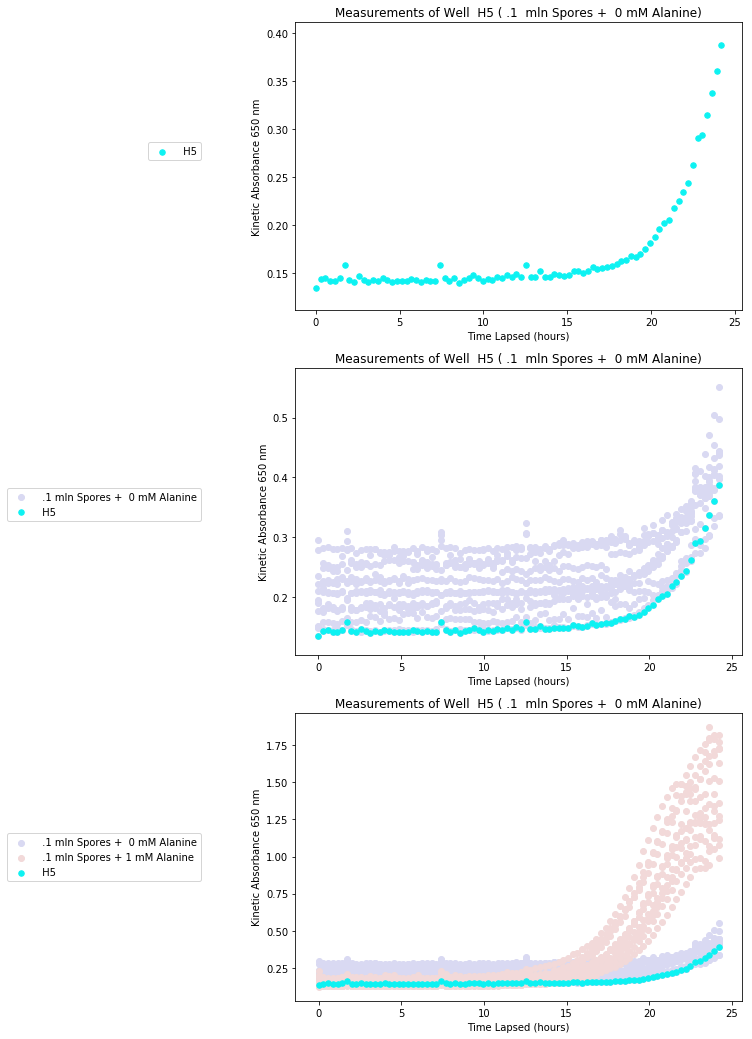

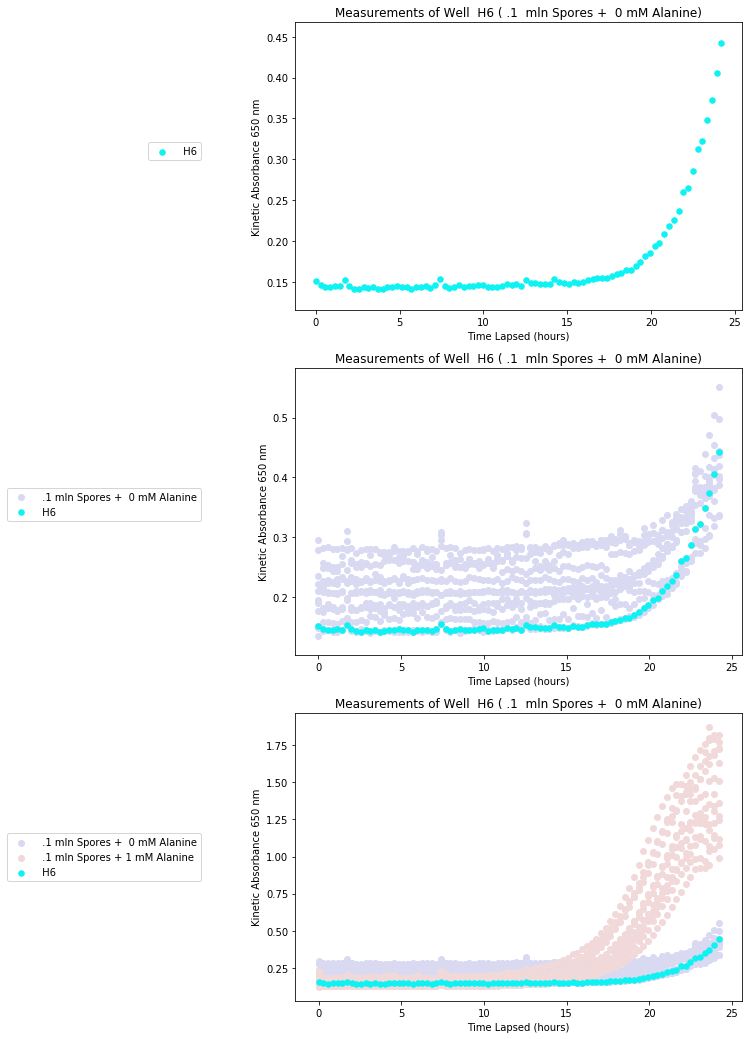

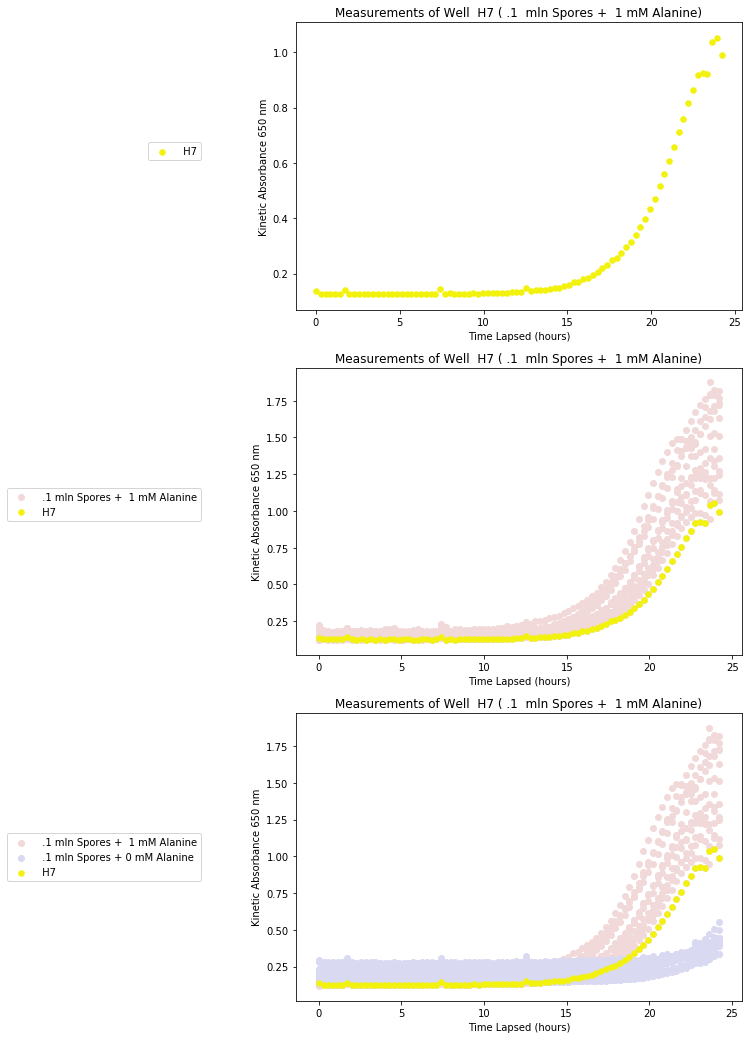

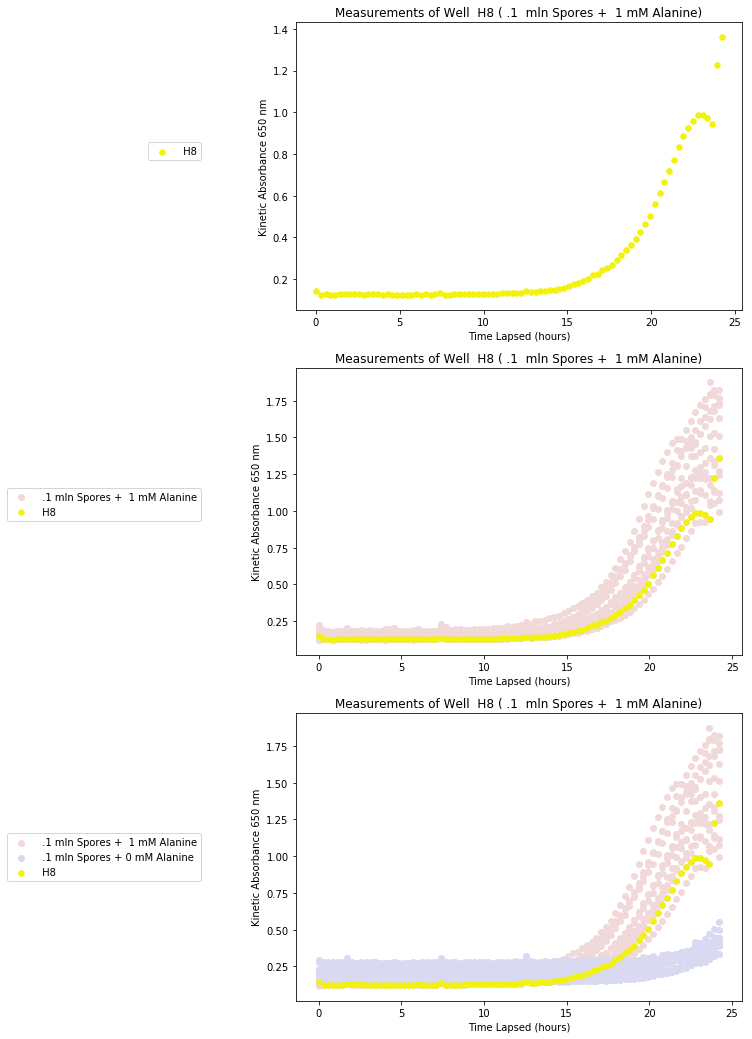

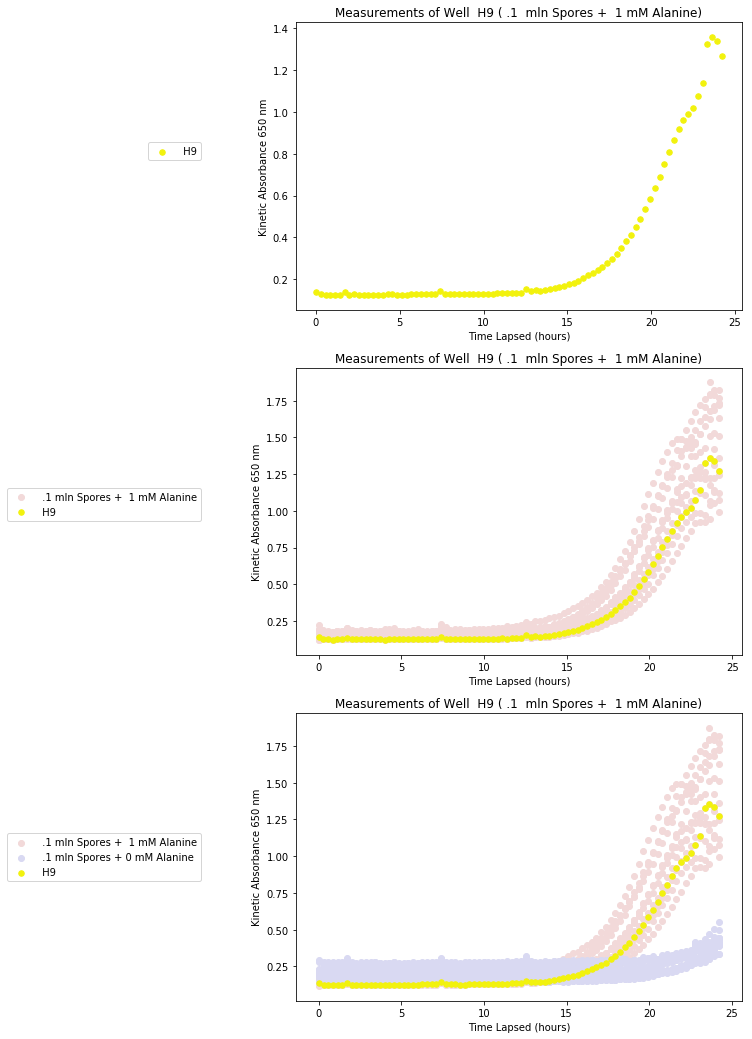

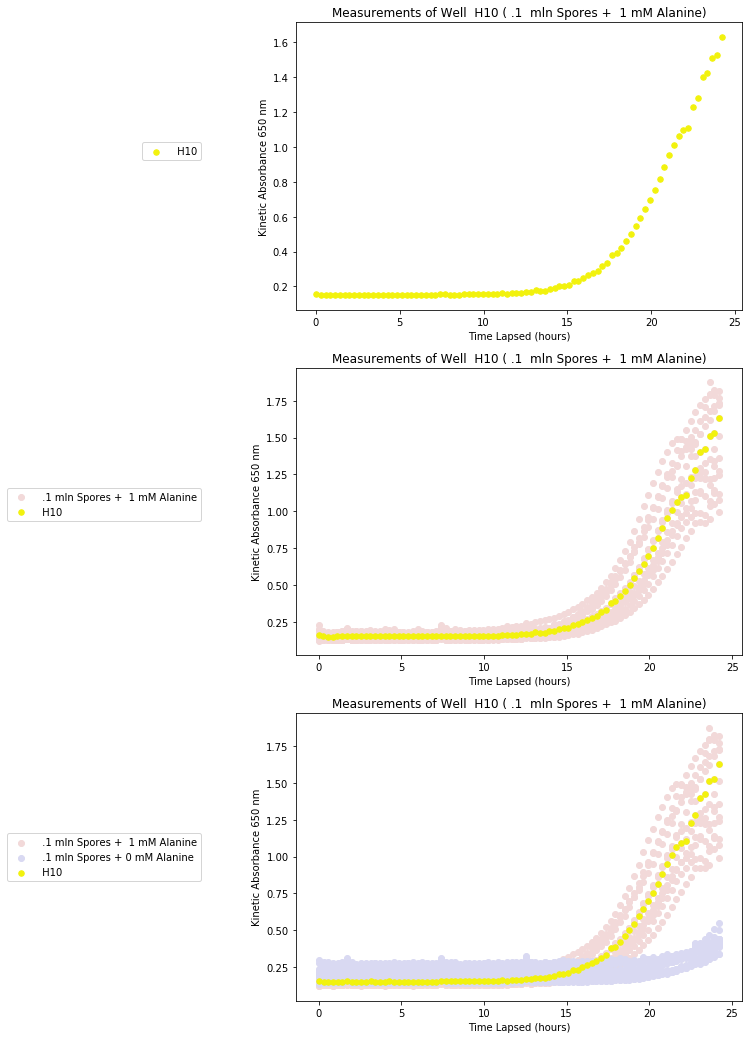

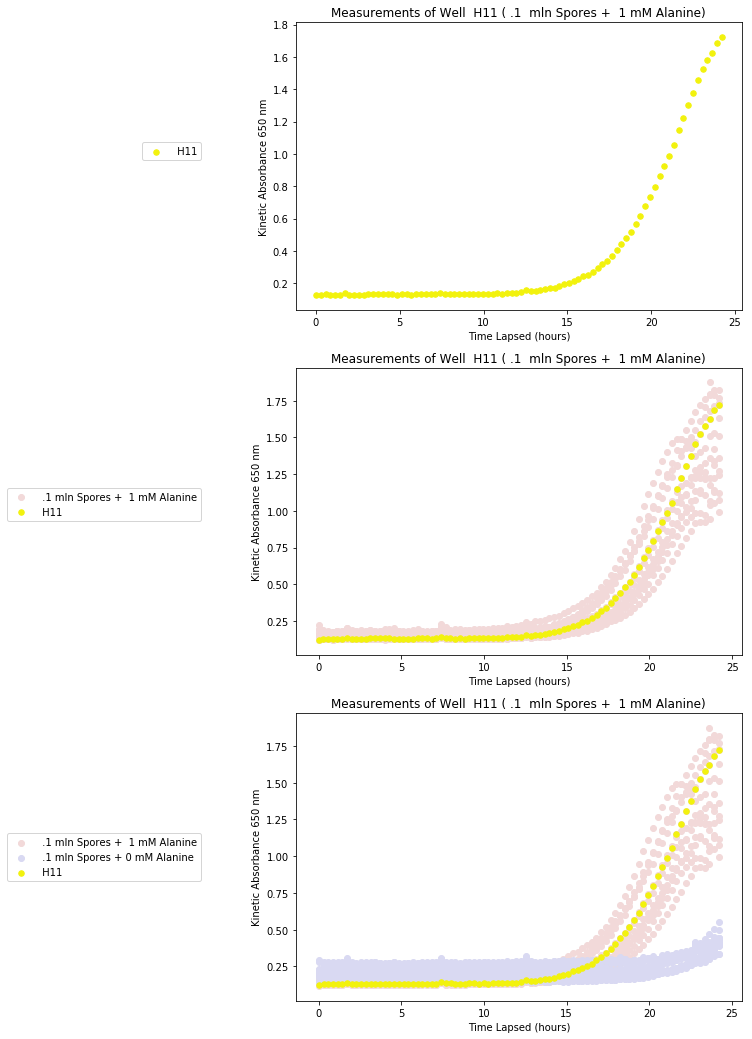

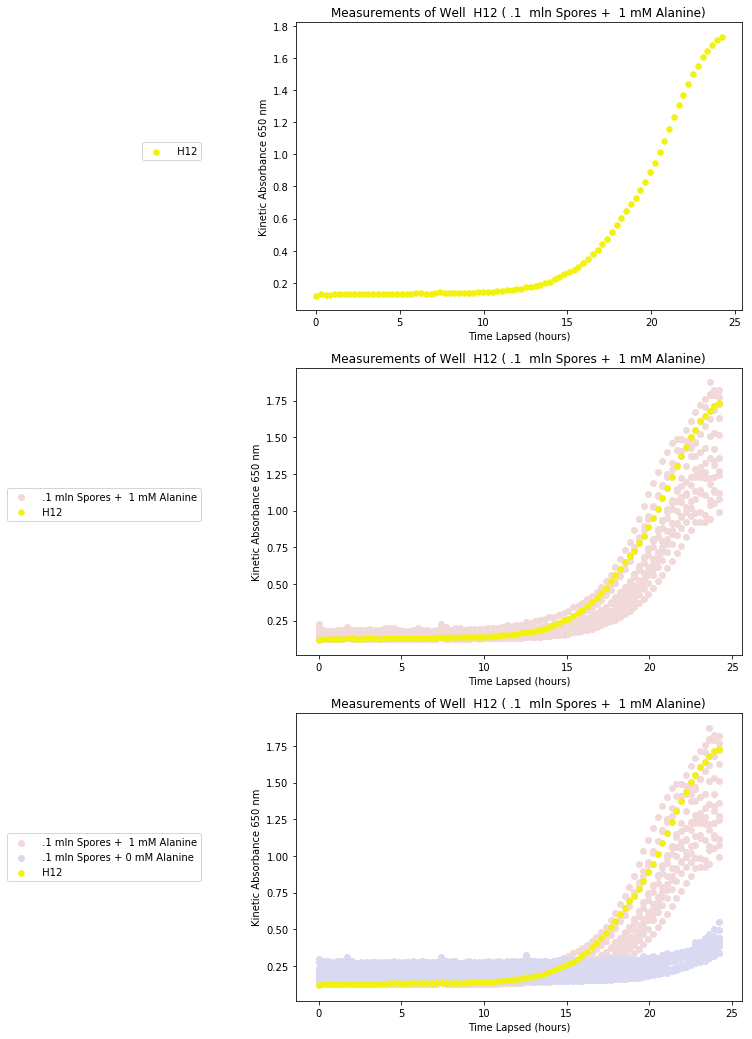

In [17]:
if __name__ == "__main__":
    main()
    